## Introduction

Increasing crime rate is a concern for communities across North Carolina. The political campaign for candidate XXX has  the goal of decreasing it as part of their platform.  One of their main initiatives aligned to this goal is to modernize the police, increasing the expenditures in new technology such as communications, cameras in the streets, modernization of the forensic laboratories, etc.  They have also considered the initiative of increasing the police force.  

The value proposition of the technology vendors that are lobbying with the political campaign is that the new technology would lead to more arrests  as the cameras would provide identification for not face to face crimes and evidence that would also help the state prosecutors to increase conviction rates.

The political campaign has to make a decision on which initiatives would have more impact on their goal of decreasing crime rate in the state.

The political campaign has retained our service to elucidate elucidate predictive factors for crime rate in the state and derive actionable insights.

They have provided us with a dataset for North Carolina counties that include the following variables: blah, blah, blah, ......

Our specific research question is how is crime rate related to police expenditures? 
We do not have information in the dataset for law enforcement expenditures, however we will work on the assumption that providing the police force with more technology would have an impact on arrest and conviction rates.  Given that, our translated research question is:
How is crime rate related to arrest and conviction rates?  We will also explore the relationships between crime rate and other possible predictors in the context of interest of our client and limited by the restrictions imposed by our data.

In [175]:
library(car)
library(ggplot2)
options(repr.plot.height = 8, repr.plot.width = 15, repr.plot.pointsize = 25)

In [176]:
# How many observation do we have in our dataset?
crime = read.csv('crime_v2.csv') 
paste("Number of Observations: ", nrow(crime))

[1] "Number of Observations:  97"

In [177]:
head(crime)

county year crmrte    prbarr   prbconv     prbpris  avgsen polpc     
1  1     87   0.0356036 0.298270 0.527595997 0.436170  6.71  0.00182786
2  3     87   0.0152532 0.132029 1.481480002 0.450000  6.35  0.00074588
3  5     87   0.0129603 0.444444 0.267856985 0.600000  6.76  0.00123431
4  7     87   0.0267532 0.364760 0.525424004 0.435484  7.14  0.00152994
5  9     87   0.0106232 0.518219 0.476563007 0.442623  8.22  0.00086018
6 11     87   0.0146067 0.524664 0.068376102 0.500000 13.00  0.00288203
  density   taxpc    ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed   wsta  
1 2.4226327 30.99368 ⋯ 408.7245 221.2701 453.1722 274.1775 334.54 477.58 292.09
2 1.0463320 26.89208 ⋯ 376.2542 196.0101 258.5650 192.3077 300.38 409.83 362.96
3 0.4127659 34.81605 ⋯ 372.2084 229.3209 305.9441 209.6972 237.65 358.98 331.53
4 0.4915572 42.94759 ⋯ 397.6901 191.1720 281.0651 256.7214 281.80 412.15 328.27
5 0.5469484 28.05474 ⋯ 377.3126 206.8215 289.3125 215.1933 290.89 377.35 367.23
6 0.6113361 35.22974 ⋯ 401.3378 187.8255 258.5650 237.1507 258.60 391.48 325.71
  wloc   mix        pctymle   
1 311.91 0.08016878 0.07787097
2 301.47 0.03022670 0.08260694
3 281.37 0.46511629 0.07211538
4 299.03 0.27362204 0.07353726
5 342.82 0.06008584 0.07069755
6 275.22 0.31952664 0.09891920

In [140]:
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

In [178]:
# from the summary above there is a pattern of six rows with NA values.  Let's identify them.
subset(crime, is.na(county))
# we can safely delete those rows
crime <- na.omit(crime)
paste("Number of Observations: ", nrow(crime))

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯ wtuc
92 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
93 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
94 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
95 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
96 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
97 NA     NA   NA     NA     `       NA      NA     NA    NA      NA    ⋯ NA  
   wtrd wfir wser wmfg wfed wsta wloc mix pctymle
92 NA   NA   NA   NA   NA   NA   NA   NA  NA     
93 NA   NA   NA   NA   NA   NA   NA   NA  NA     
94 NA   NA   NA   NA   NA   NA   NA   NA  NA     
95 NA   NA   NA   NA   NA   NA   NA   NA  NA     
96 NA   NA   NA   NA   NA   NA   NA   NA  NA     
97 NA   NA   NA   NA   NA   NA   NA   NA  NA

[1] "Number of Observations:  91"

In [142]:
# Is there a duplicated county?
duplicated(crime)
crime[89,]
crime[crime$county==193,]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[85] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

county year crmrte    prbarr   prbconv     prbpris  avgsen polpc     
89 193    87   0.0235277 0.266055 0.588859022 0.423423 5.86   0.00117887
   density   taxpc    ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  
89 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
   wsta   wloc   mix       pctymle   
89 337.88 348.74 0.1105016 0.07819394

county year crmrte    prbarr   prbconv     prbpris  avgsen polpc     
88 193    87   0.0235277 0.266055 0.588859022 0.423423 5.86   0.00117887
89 193    87   0.0235277 0.266055 0.588859022 0.423423 5.86   0.00117887
   density   taxpc    ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  
88 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
89 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
   wsta   wloc   mix       pctymle   
88 337.88 348.74 0.1105016 0.07819394
89 337.88 348.74 0.1105016 0.07819394

In [180]:
# eliminate duplicated county: row 89 (county id 193)
crime <- crime[!duplicated(crime$county),]
paste("Number of Observations: ", nrow(crime))

[1] "Number of Observations:  90"

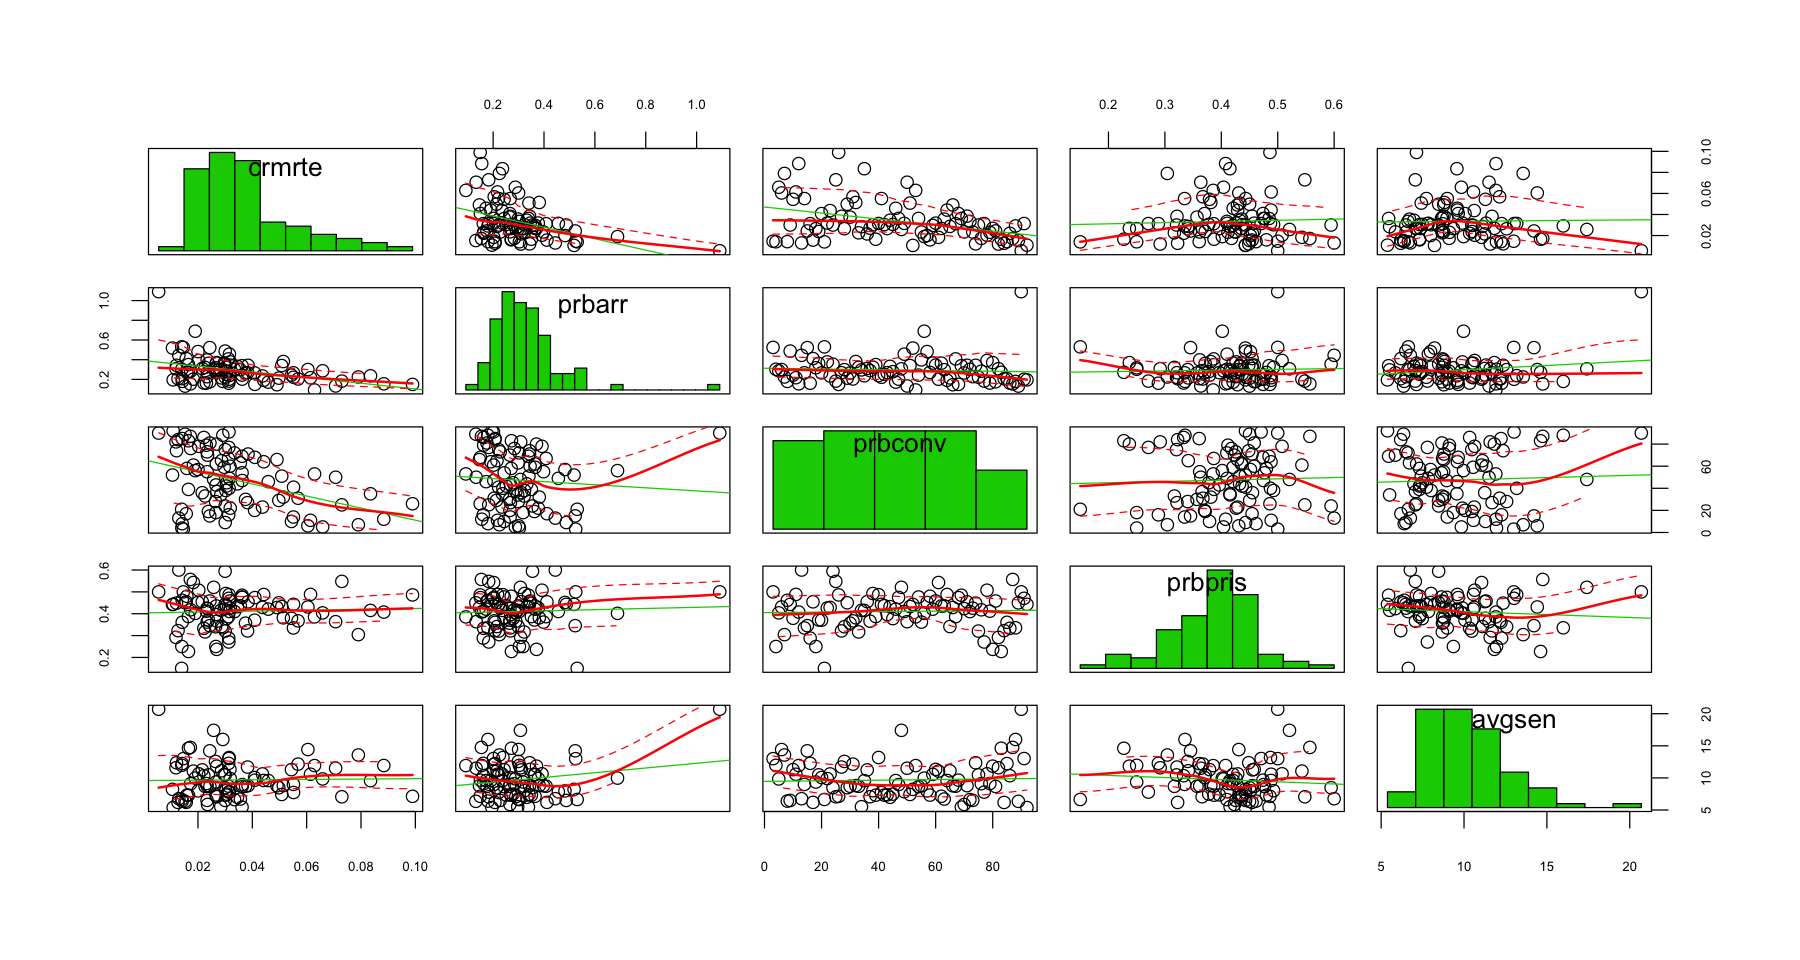

In [183]:
# delete year column, as it does not have meaninful information for our analysis.
crime$year <- NULL
# Let's start a exploration of relationships on the variables in the dataset. 
# Generate a scatterplot matrix for variables related "getting caught" & "punishment". 
scatterplotMatrix(crime[,c("crmrte", 'prbarr', "prbconv", "prbpris", "avgsen")], diagonal = "histogram")

Seems that there is: negative correlation between crime rate and prbarr, negative correlation between crime rate and prbconv.

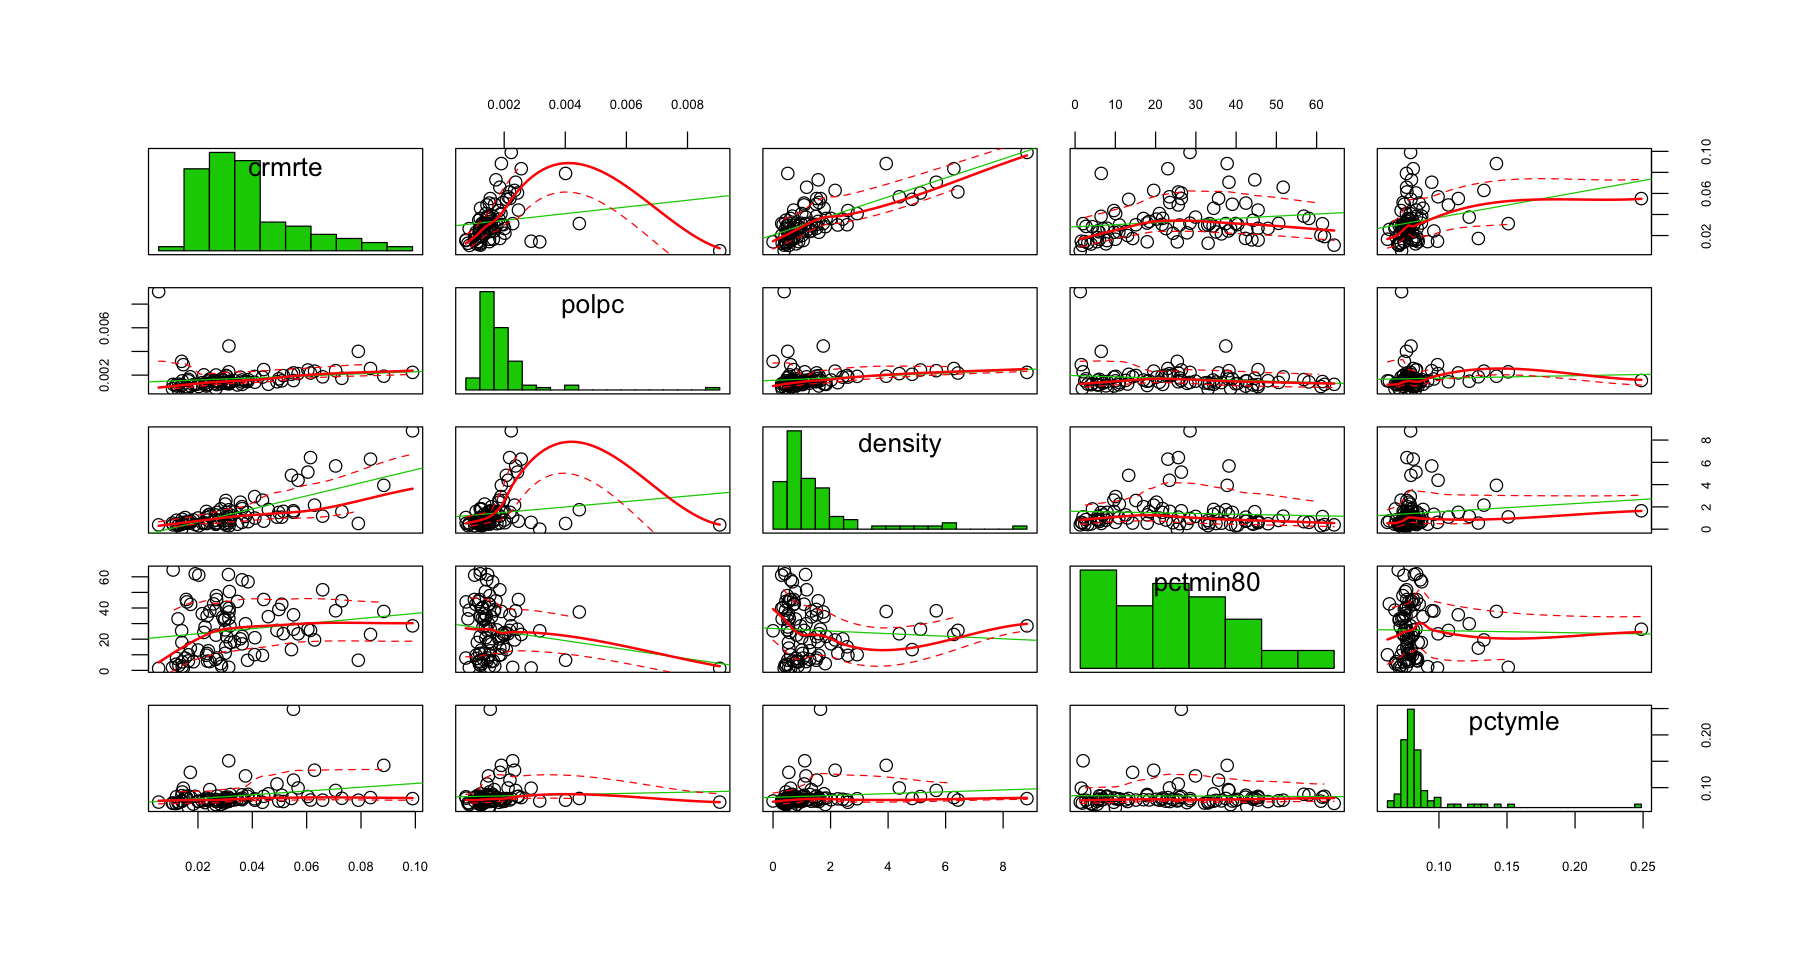

In [181]:
# Generate a scatterplot matrix for variables related to demographics. 
scatterplotMatrix(crime[,c("crmrte", 'polpc', "density", "pctmin80", "pctymle")], diagonal = "histogram")

Seems that there is: positive correlation between crime rate and polpc.  This is very counter-intuitive.  We will explore it further. Also the chart shows a very positive high correlation between crime rate and density which is expected.  I don't see a correlation between crime rate and pctymle which is unexpected, it would probably require a transformation.

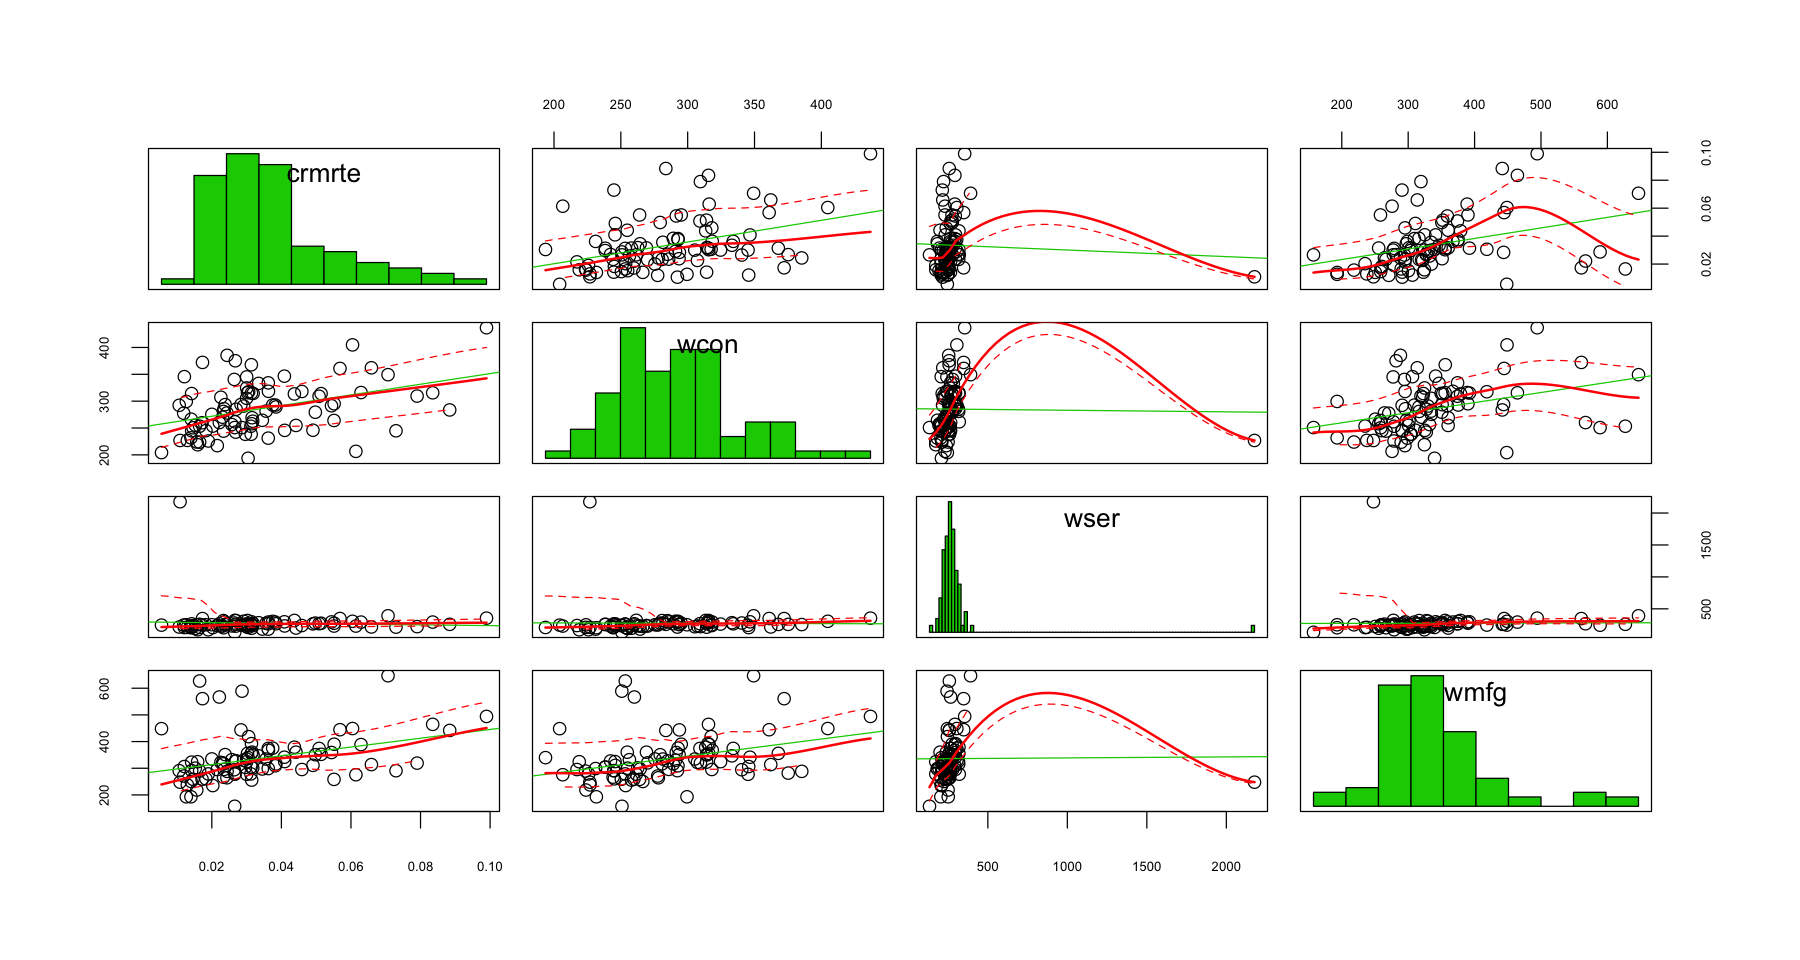

In [182]:
# Generate a scatterplot matrix for variables related economic factors:  
# wages in differen industries. 
scatterplotMatrix(crime[,c("crmrte", 'wcon', 'wser', 'wmfg')], diagonal = "histogram")

### Dependent Variable:  Crime Rate

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

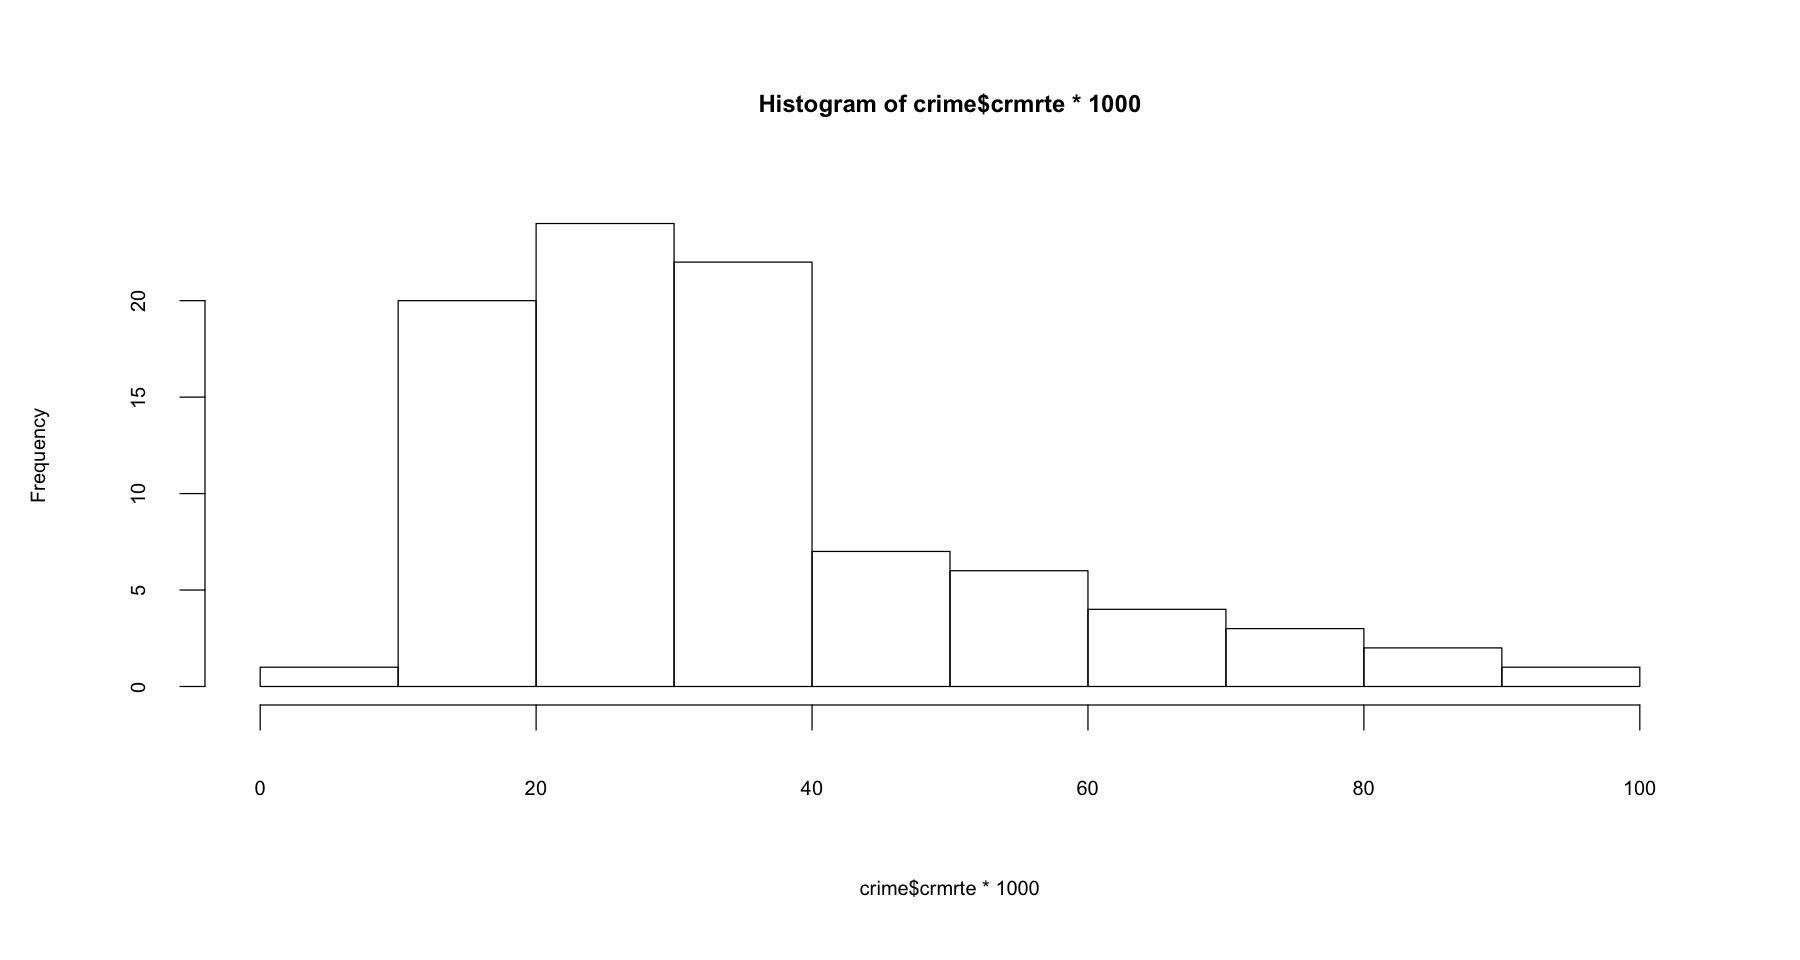

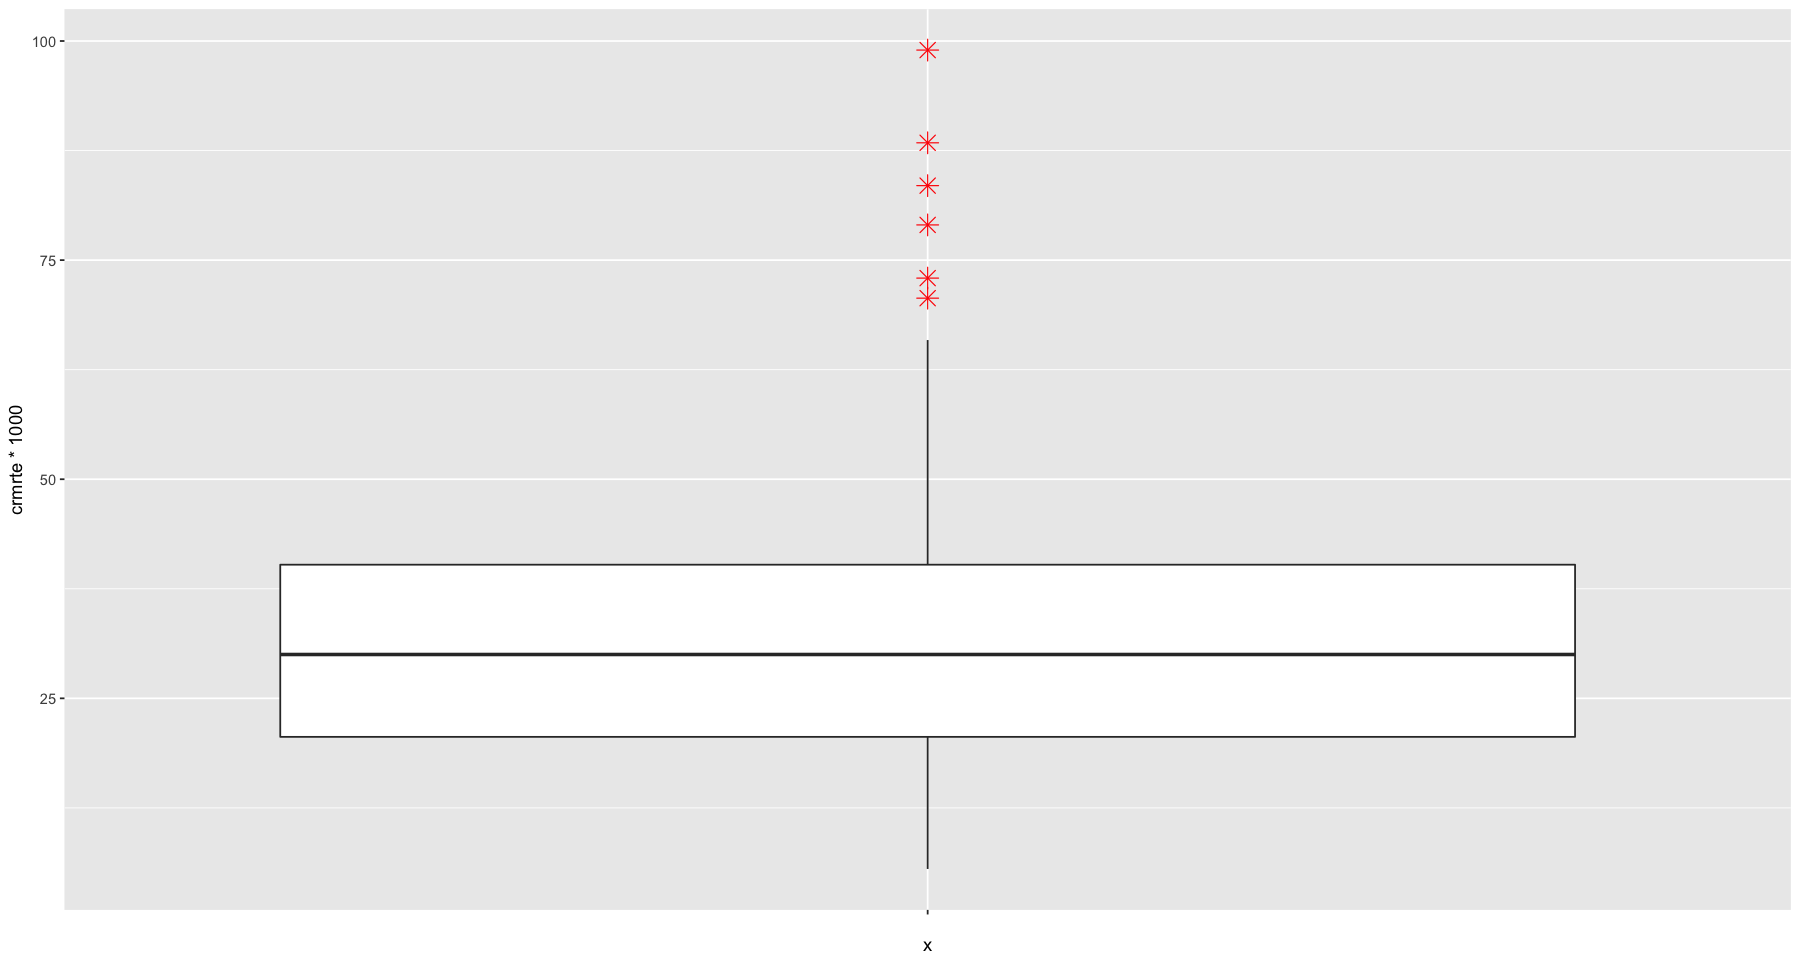

In [9]:
# let's study our dependent variable.  Looks skewed to the right which is expected,
# given our hard limit of 0 to the left.
hist(crime$crmrte)
summary(crime$crmrte)
ggplot(crime, aes(x='', y=crmrte*1000), ) + 
geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) 

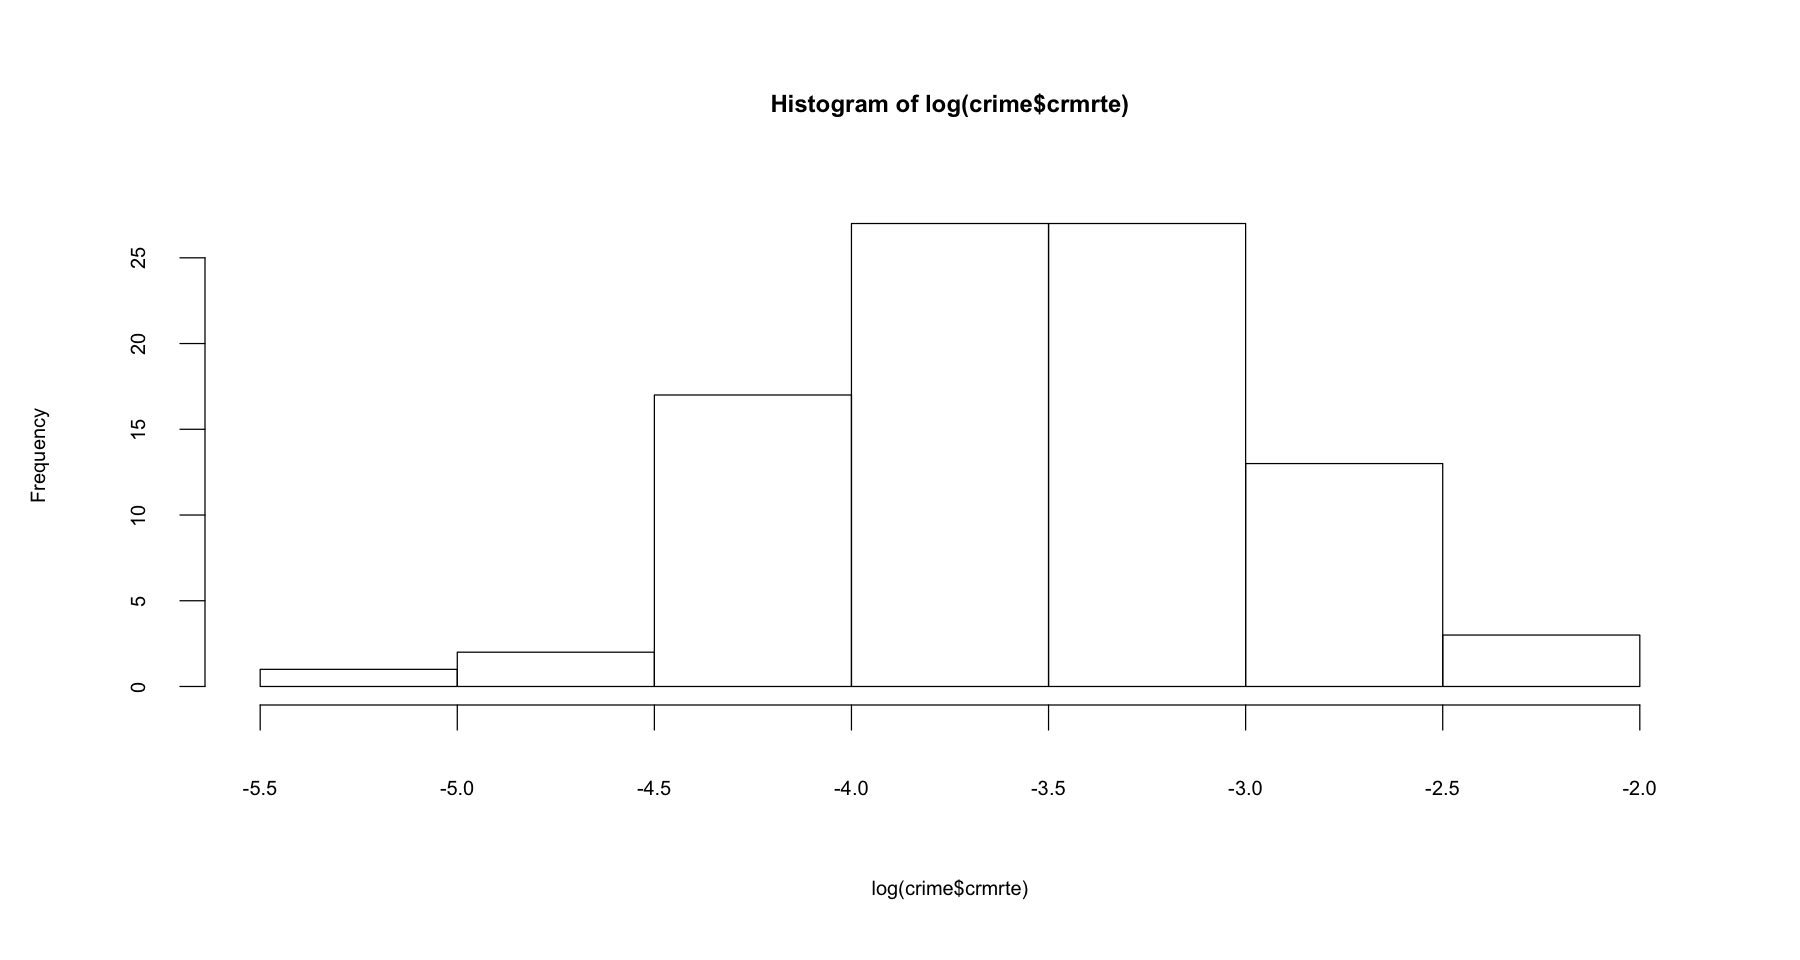

In [191]:
# would a log transformation of crime rate "normalize" it to make it more symmetric? Yes.
hist(log(crime$crmrte))

In [188]:
# quick exploration of counties with high crime rate. I don't see any obvious information in
# outliers that could lead us to think these observations are error messages.
crime[crime$crmrte >= 0.0625,]

county crmrte    prbarr   prbconv     prbpris  avgsen polpc      density  
23  51    0.0883849 0.155248 0.259833008 0.407628 11.93  0.00190802 3.9345510
25  55    0.0790163 0.224628 0.207830995 0.304348 13.57  0.00400962 0.5115089
29  63    0.0706599 0.133225 0.459215999 0.363636 11.51  0.00237609 5.6744967
30  65    0.0658801 0.287330 0.154451996 0.403922  9.84  0.00185739 1.1679842
53 119    0.0989659 0.149094 0.347799987 0.486183  7.13  0.00223135 8.8276520
57 129    0.0834982 0.236601 0.393413007 0.415158  9.57  0.00255849 6.2864866
60 135    0.0628972 0.092770 0.477732986 0.385593 11.92  0.00233871 2.1575000
82 181    0.0729479 0.182590 0.343023002 0.548023  7.06  0.00172948 1.5702811
   taxpc     west ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed   wsta  
23  35.69936 0    ⋯ 412.4720 213.7524 324.8357 257.3344 441.72 433.94 367.34
25 119.76145 0    ⋯ 445.2762 189.7436 284.5933 221.3903 319.21 338.91 361.68
29  50.19918 0    ⋯ 548.9865 238.9154 435.1107 391.3081 646.85 563.77 415.51
30  30.62824 0    ⋯ 540.1061 209.0579 316.2955 216.4589 313.71 543.03 348.88
53  75.67243 0    ⋯ 548.3239 354.6761 509.4655 354.3007 494.30 568.40 329.22
57  67.67963 0    ⋯ 392.0999 220.4530 363.2880 292.7027 464.49 548.49 421.36
60  35.99248 0    ⋯ 420.8830 179.1289 389.8522 292.2253 388.75 509.95 499.59
82  27.59179 0    ⋯ 365.4716 279.2273 325.0271 213.5822 290.69 453.53 317.23
   wloc   mix        pctymle   
23 333.71 0.10474319 0.14223780
25 326.08 0.08437271 0.07613807
29 362.58 0.07585382 0.09468981
30 329.16 0.09364294 0.07622346
53 379.77 0.16869897 0.07916495
57 319.08 0.07871422 0.08109921
60 333.05 0.05091770 0.13302912
82 286.45 0.10003893 0.07977433

### Probability of arrest

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20495 0.27146 0.29524 0.34487 1.09091 

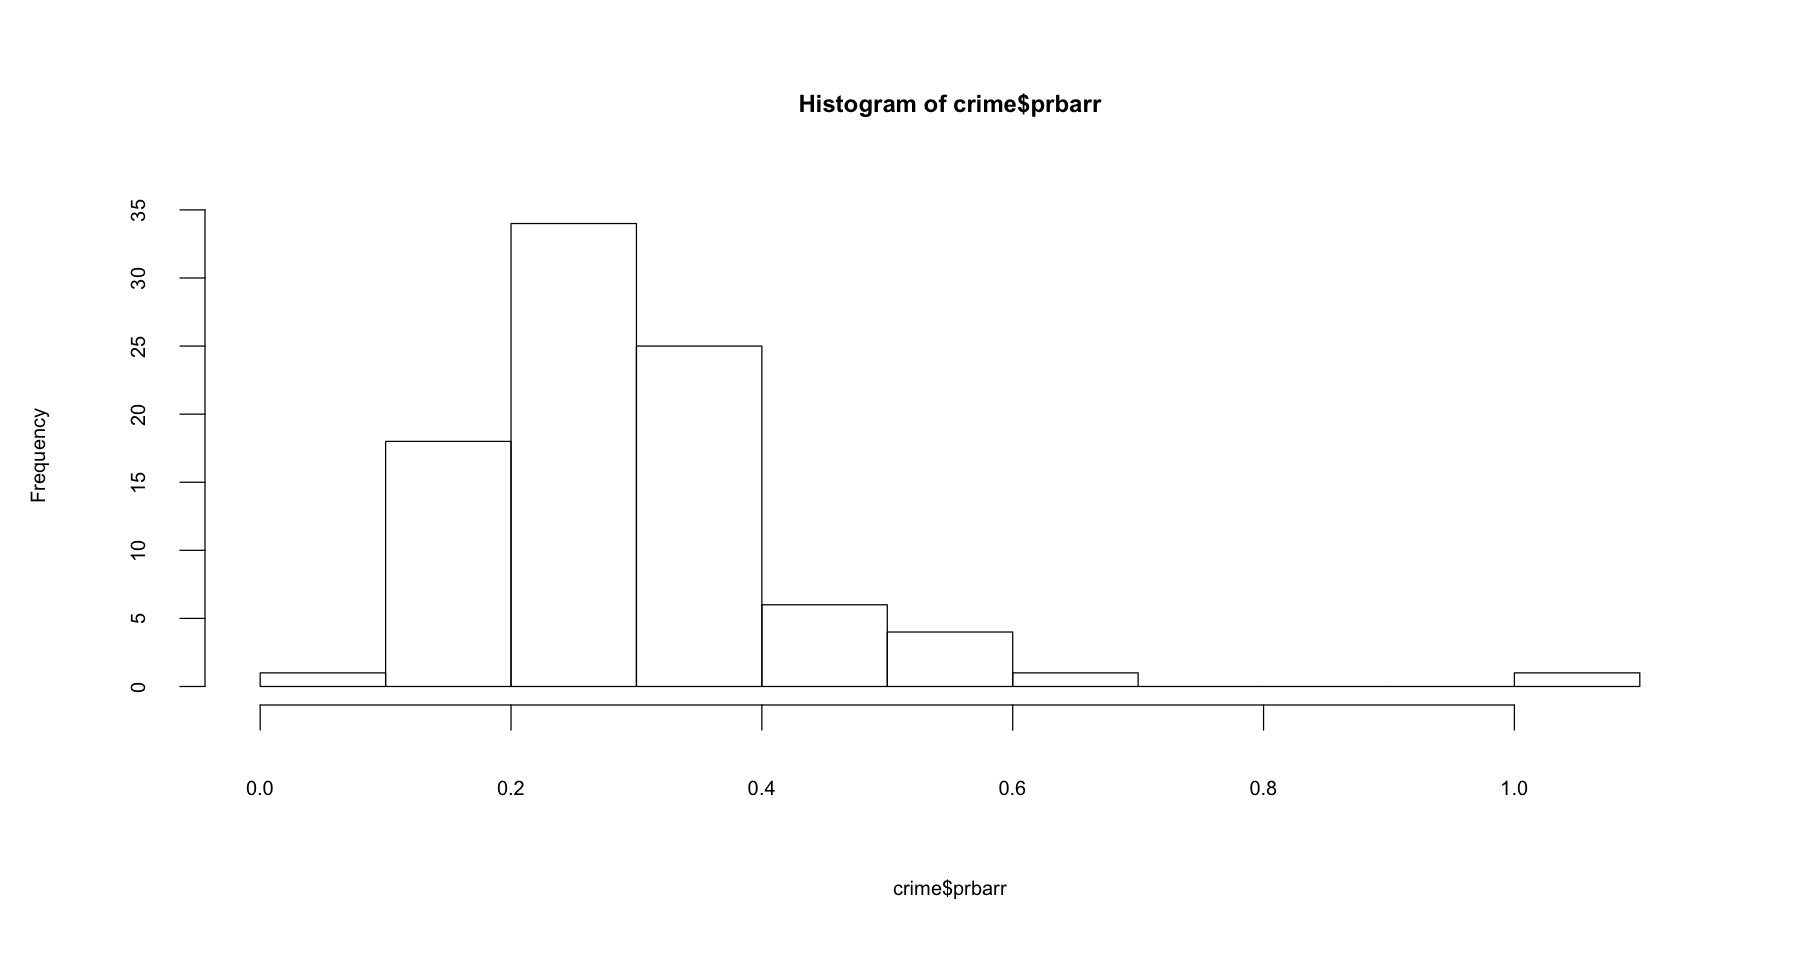

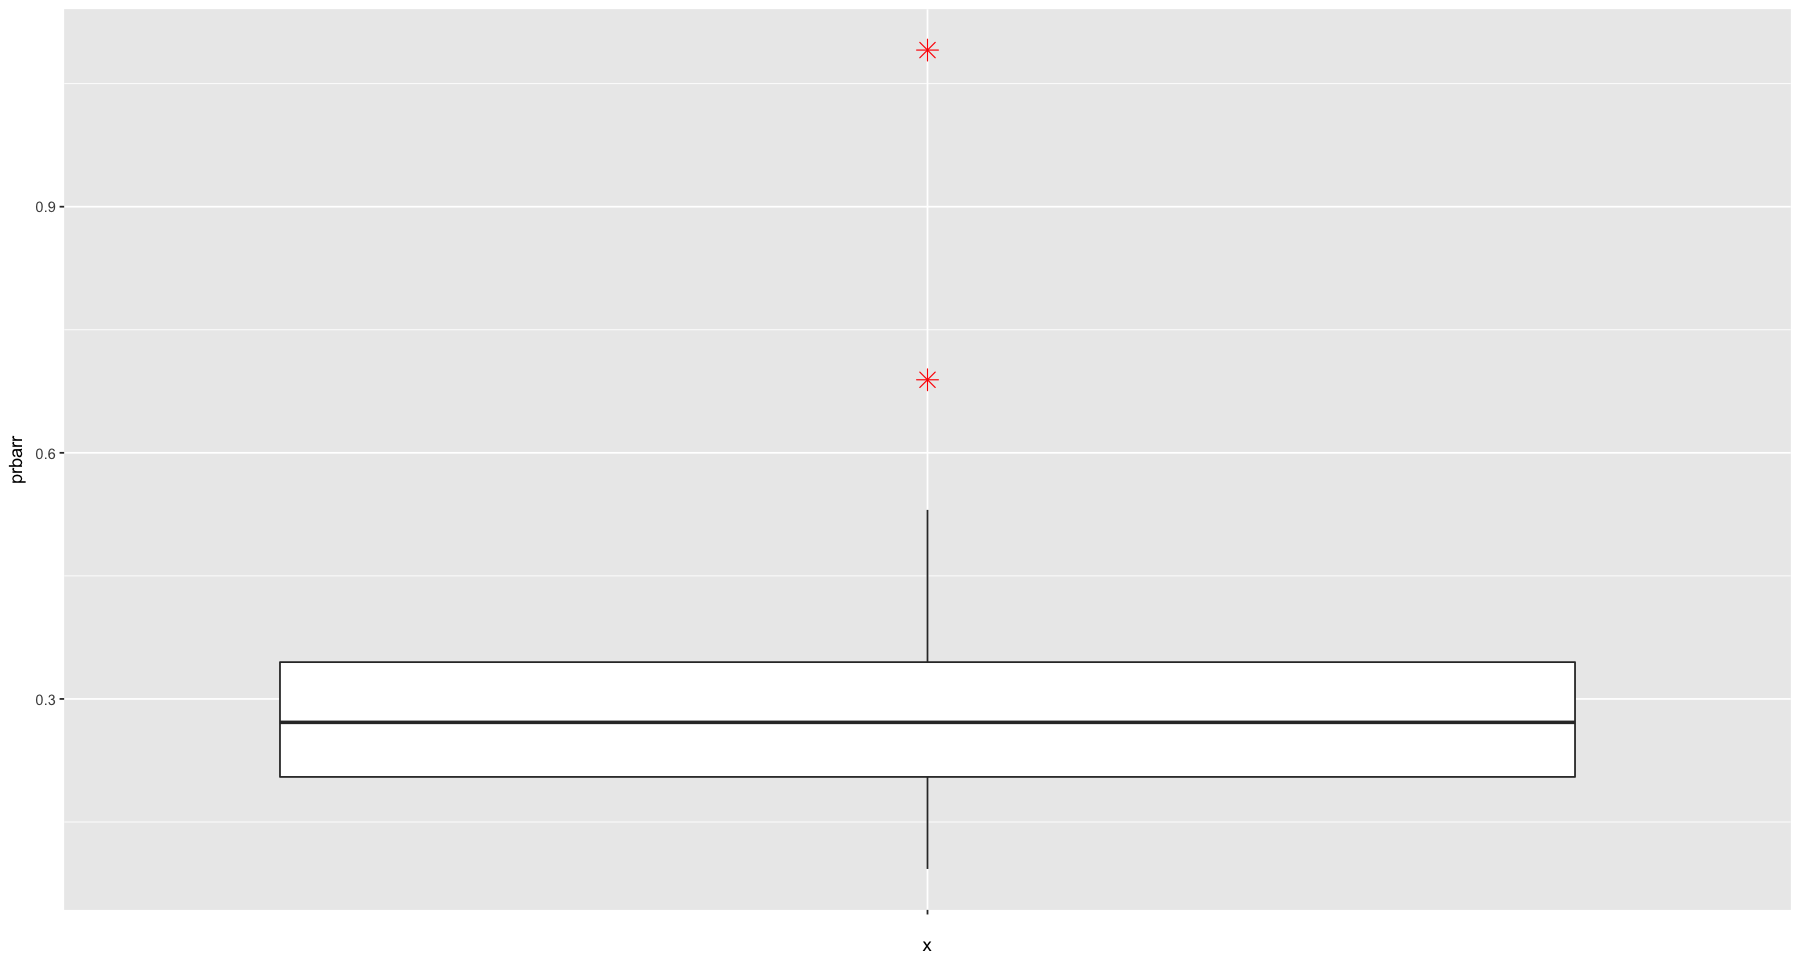

In [148]:
hist(crime$prbarr)
summary(crime$prbarr)
ggplot(crime, aes(x='', y=prbarr)) + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

In [149]:
crime[crime$prbarr >= 0.6,]

county crmrte    prbarr   prbconv     prbpris  avgsen polpc      density  
51 115    0.0055332 1.090910 1.5         0.500000 20.70  0.00905433 0.3858093
58 131    0.0189848 0.689024 0.495575011 0.401786  9.97  0.00121549 0.4126394
   taxpc    west ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed   wsta  
51 28.19310 1    ⋯ 503.2351 217.4908 342.4658 245.2061 448.42 442.20 340.39
58 37.70006 0    ⋯ 375.2345 220.9747 307.6923 172.6281 278.70 432.81 370.81
   wloc   mix       pctymle   
51 386.12 0.1000000 0.07253495
58 259.78 0.1672598 0.08356434

Warning message:
“Ignoring unknown parameters: NA”

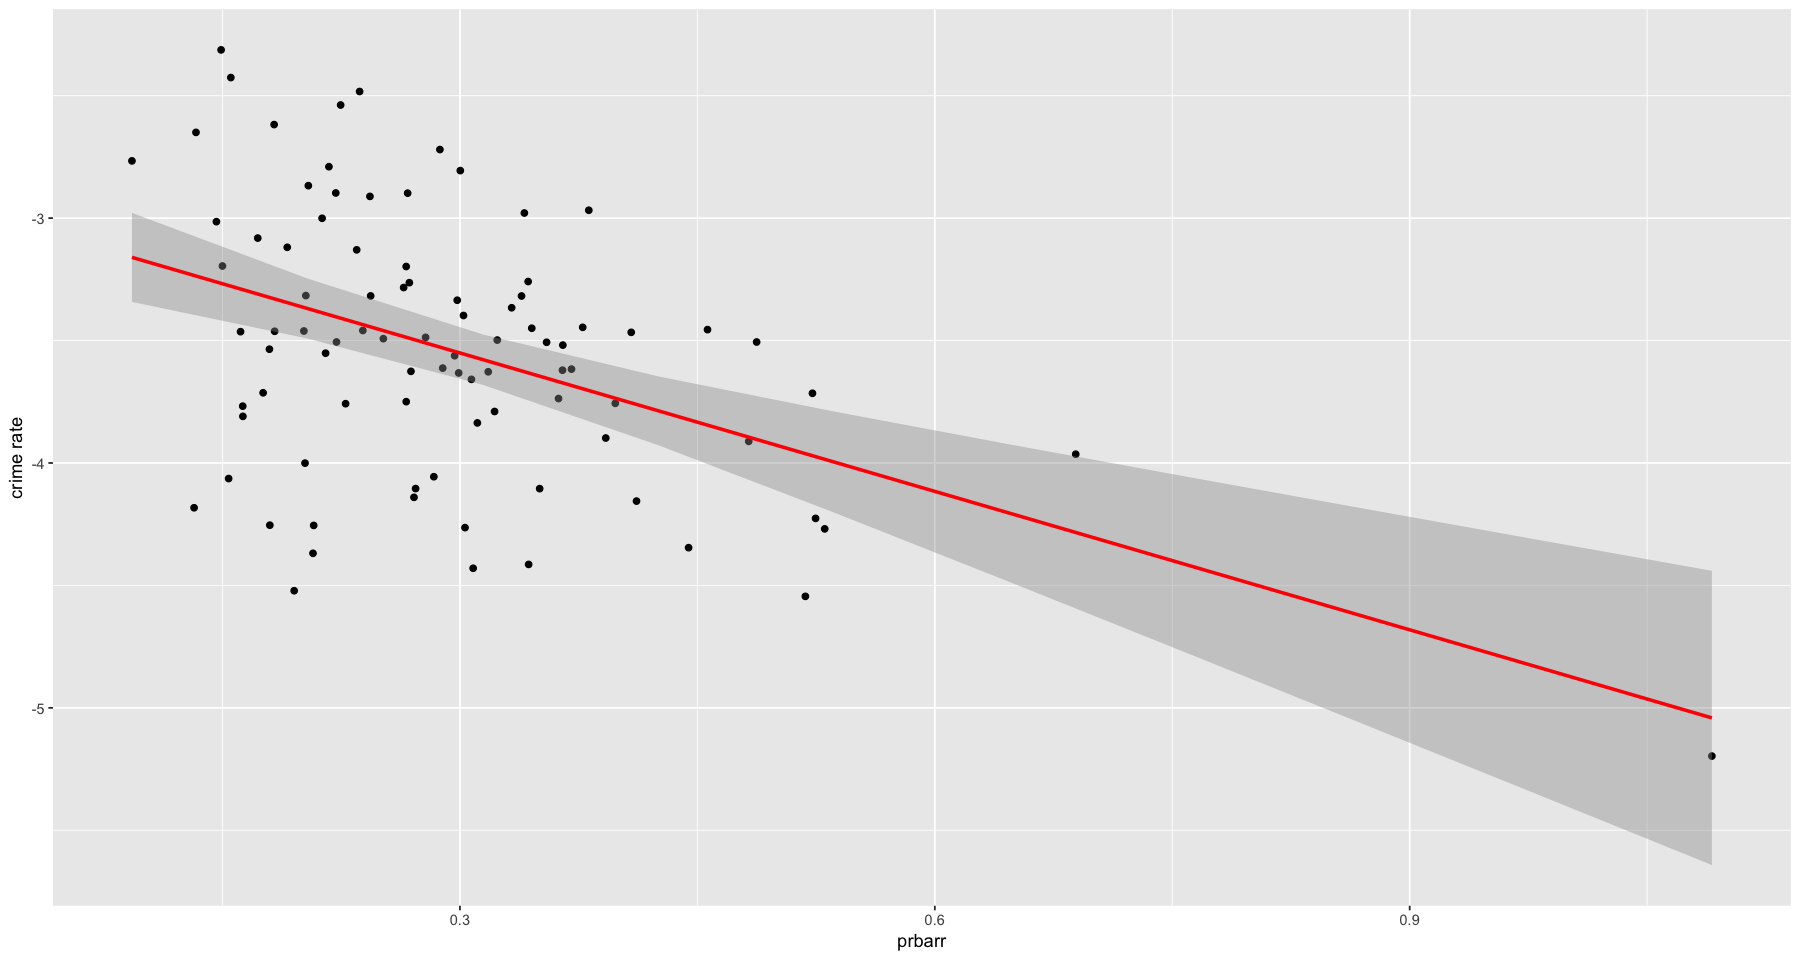

In [207]:
qplot(data = crime, prbarr, log(crmrte), xlab="prbarr",  ylab="crime rate",) + 
      stat_smooth(method="lm", n=10, se=TRUE,col="red") 

County 115 has a probability of arrest > 1.  Even when we recognize that probability here is just a proxy, it is still an outlier. It does not seem to have too much "influence" according to the chart above and it is below Cook's distance of 0.5 (see chart below).  However it still seems unusual to us that in that county there are more arrests than offenses, even considering that arrests may be associated to offenses committed in previous years.

Should we consider this county an erroneous value and delete it?

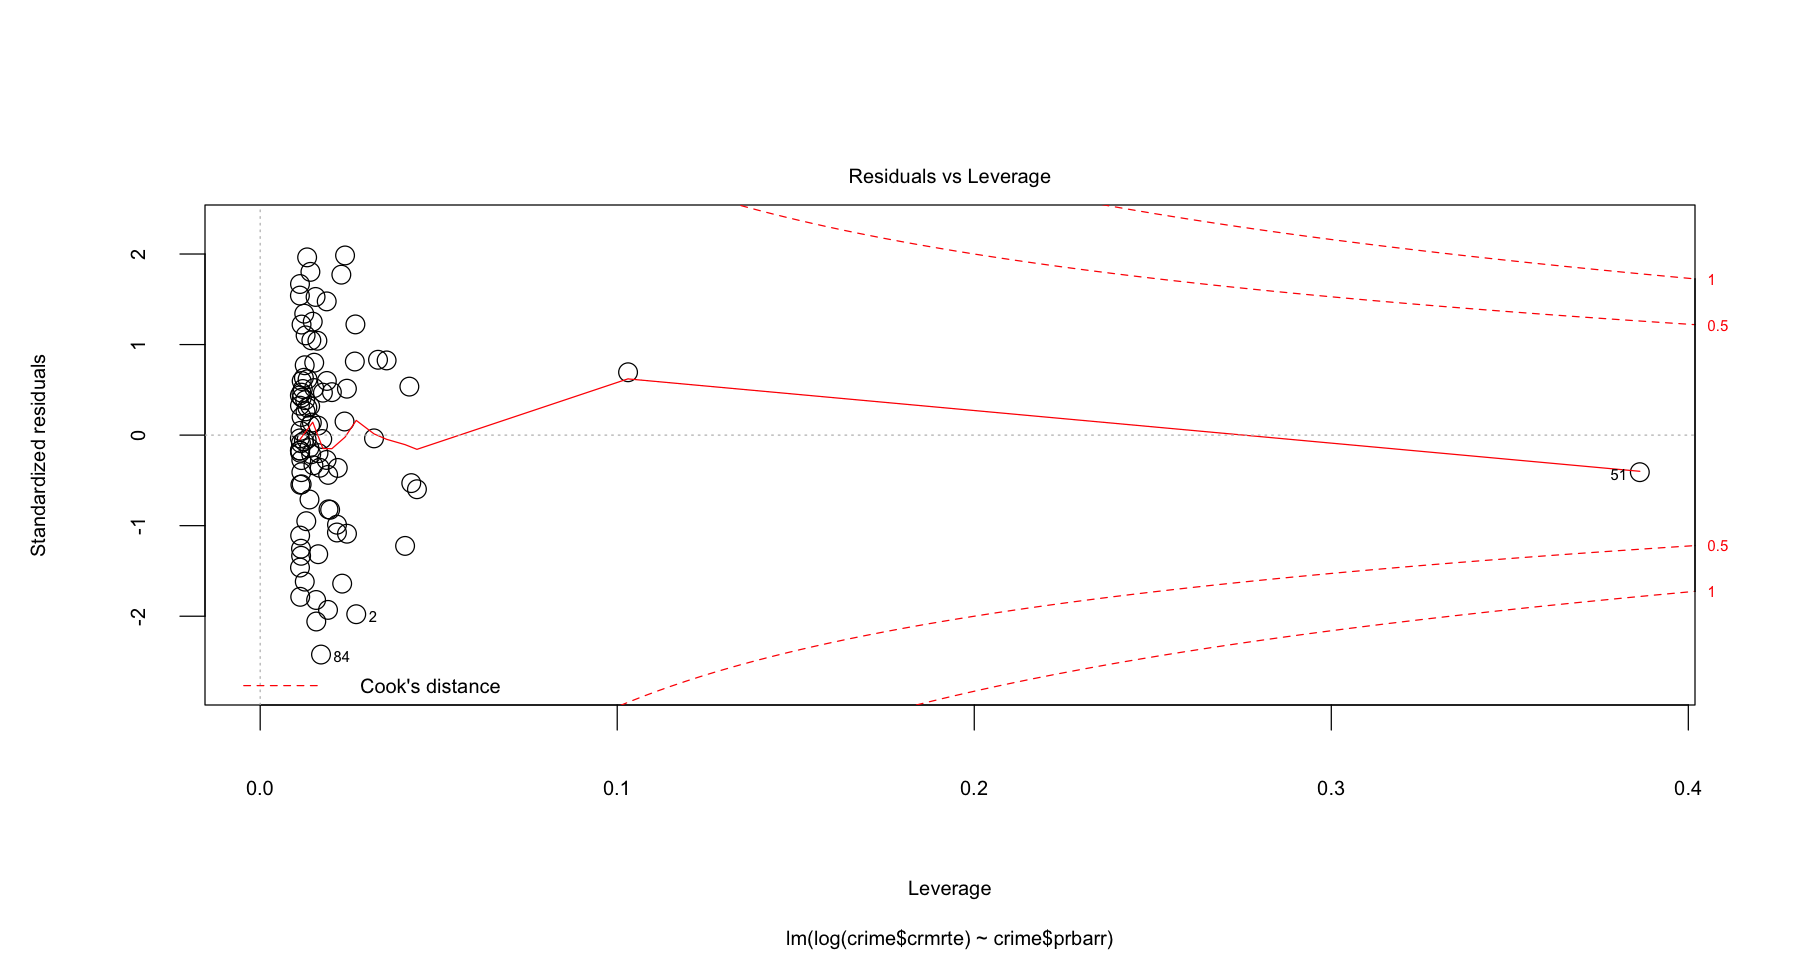

In [235]:
m0 = lm(log(crime$crmrte) ~ crime$prbarr)
plot(m0,which=5)

### Probability of conviction

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 

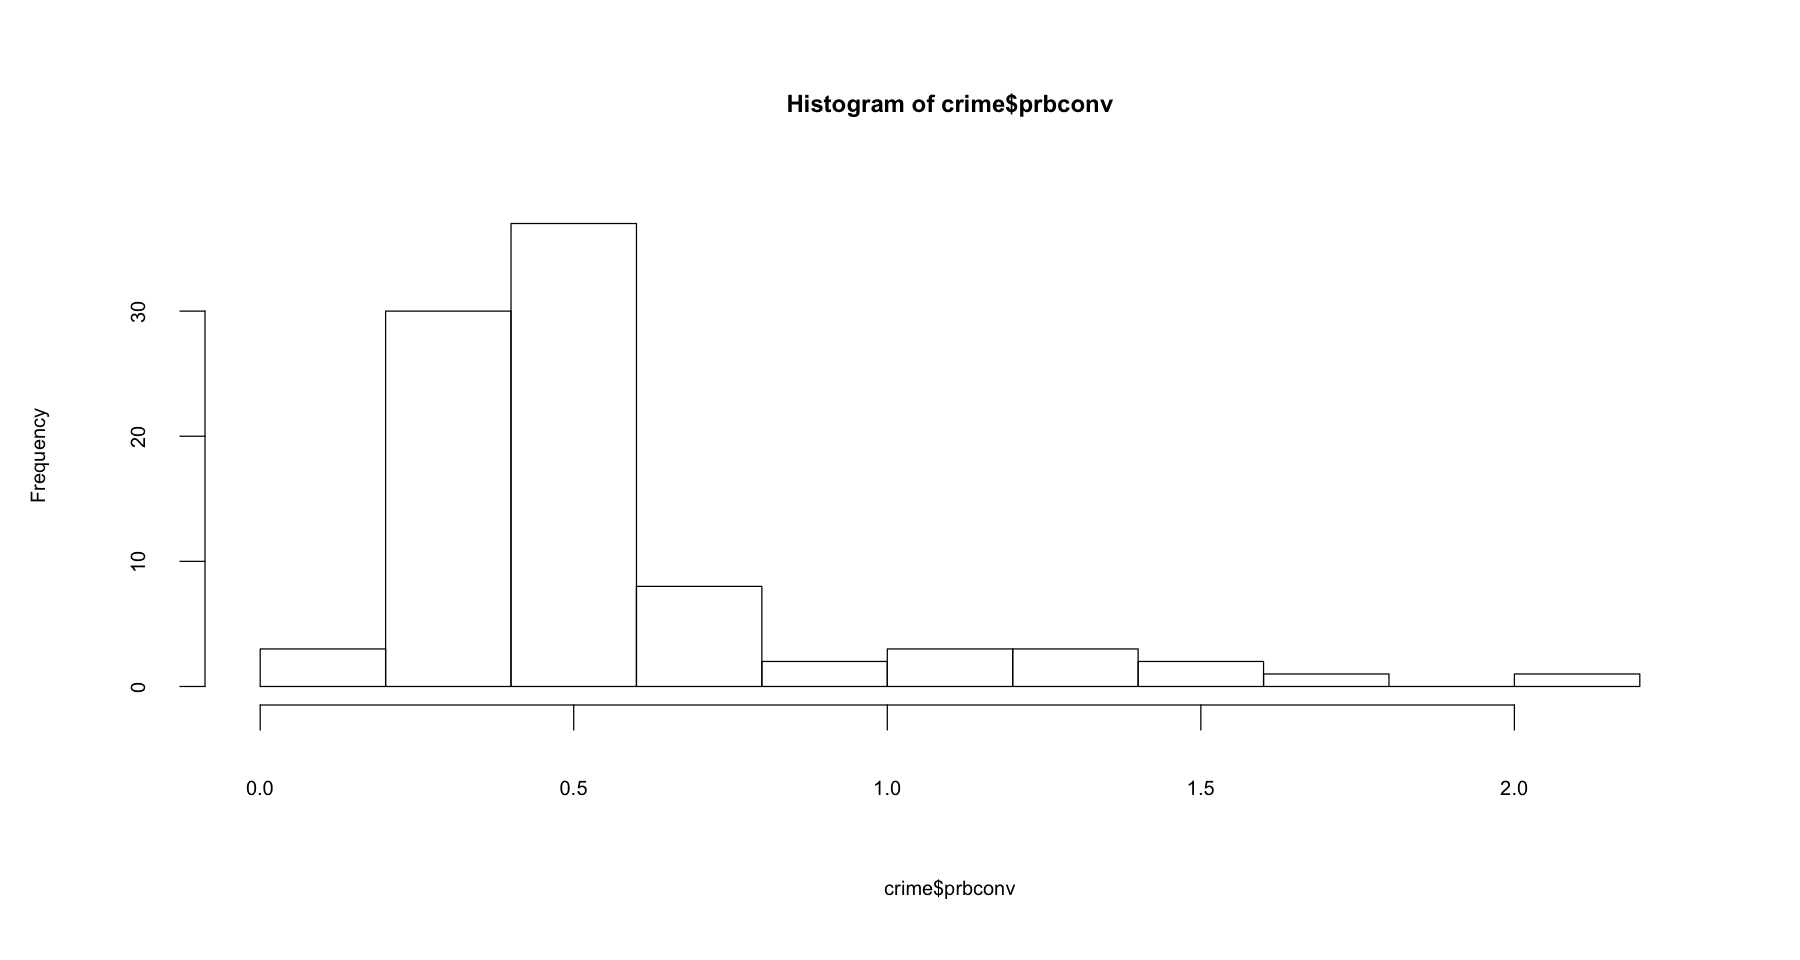

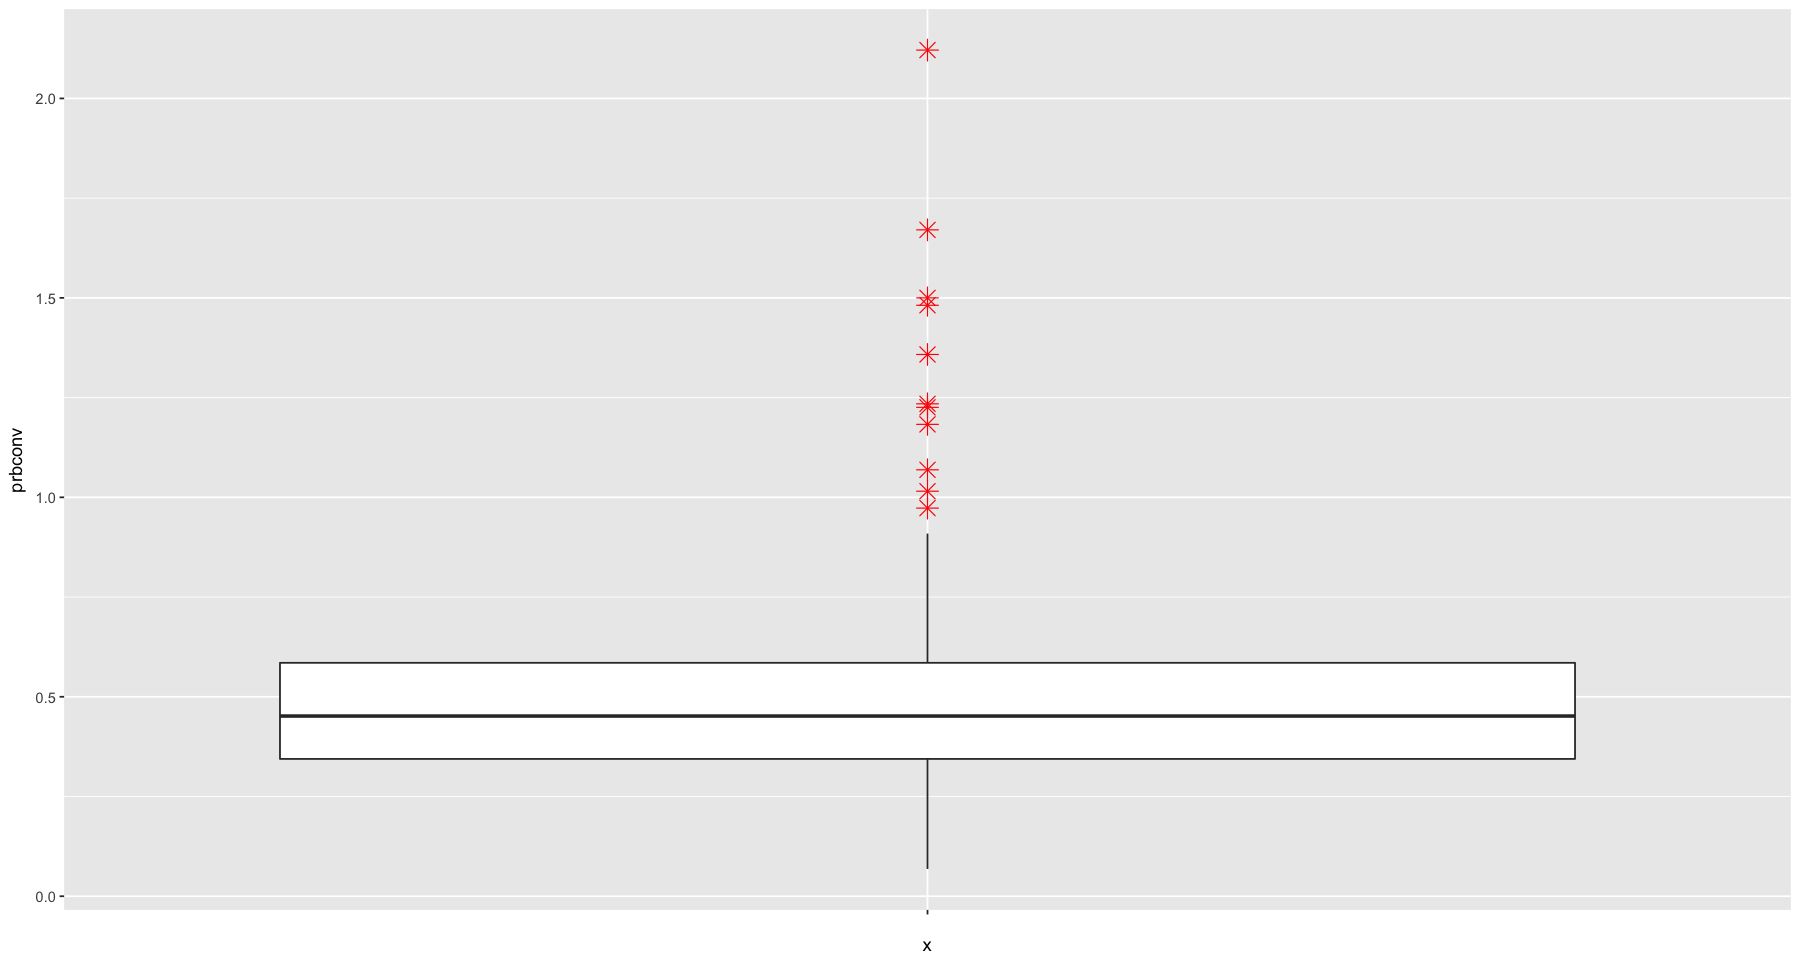

In [199]:
#fix the variable probability of confiction which has non numeric values.
crime$prbconv <- as.numeric(as.character(crime$prbconv))
summary(crime$prbconv)
hist(crime$prbconv)
ggplot(crime, aes(x='', y=prbconv)) + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

In [200]:
crime[crime$prbconv >= 1,]

county crmrte    prbarr   prbconv prbpris  avgsen polpc      density  
2    3    0.0152532 0.132029 1.48148 0.450000  6.35  0.00074588 1.0463320
10  19    0.0221567 0.162860 1.22561 0.333333 10.34  0.00202425 0.5767442
44  99    0.0171865 0.153846 1.23438 0.556962 14.75  0.00185912 0.5478615
51 115    0.0055332 1.090910 1.50000 0.500000 20.70  0.00905433 0.3858093
56 127    0.0291496 0.179616 1.35814 0.335616 15.99  0.00158289 1.3388889
61 137    0.0126662 0.207143 1.06897 0.322581  6.18  0.00081426 0.3167155
67 149    0.0164987 0.271967 1.01538 0.227273 14.62  0.00151871 0.6092437
84 185    0.0108703 0.195266 2.12121 0.442857  5.38  0.00122210 0.3887588
90 195    0.0313973 0.201397 1.67052 0.470588 13.02  0.00445923 1.7459893
91 197    0.0141928 0.207595 1.18293 0.360825 12.23  0.00118573 0.8898810
   taxpc    west ⋯ wtuc     wtrd     wfir     wser      wmfg   wfed   wsta  
2  26.89208 0    ⋯ 376.2542 196.0101 258.5650  192.3077 300.38 409.83 362.96
10 61.15251 0    ⋯ 613.2261 191.2452 290.5141  266.0934 567.06 403.15 258.33
44 39.57348 1    ⋯ 417.2099 168.2692 301.5734  247.6291 258.99 442.76 387.02
51 28.19310 1    ⋯ 503.2351 217.4908 342.4658  245.2061 448.42 442.20 340.39
56 32.02376 0    ⋯ 426.3901 257.6008 441.1413  305.7612 329.87 508.61 380.30
61 44.29367 0    ⋯ 356.1254 170.8711 170.9402  250.8361 192.96 360.84 283.90
67 29.03402 1    ⋯ 437.0629 188.7683 353.2182  210.4415 289.43 421.34 342.92
84 40.82454 0    ⋯ 331.5650 167.3726 264.4231 2177.0681 247.72 381.33 367.25
90 53.66693 0    ⋯ 377.9356 246.0614 411.4330  296.8684 392.27 480.79 303.11
91 25.95258 1    ⋯ 341.8803 182.8020 348.1432  212.8205 322.92 391.72 385.65
   wloc   mix        pctymle   
2  301.47 0.03022670 0.08260694
10 299.44 0.05334728 0.07713232
44 291.44 0.01960784 0.12894706
51 386.12 0.10000000 0.07253495
56 329.71 0.06305506 0.07400288
61 321.73 0.06870229 0.07098370
67 301.23 0.11682243 0.06215772
84 300.13 0.04968944 0.07008217
90 337.28 0.15612382 0.07945071
91 306.85 0.06756757 0.07419893

The counties with unusual high probability of conviction are displayed above.  Are these errors? 

Warning message:
“Ignoring unknown parameters: NA”

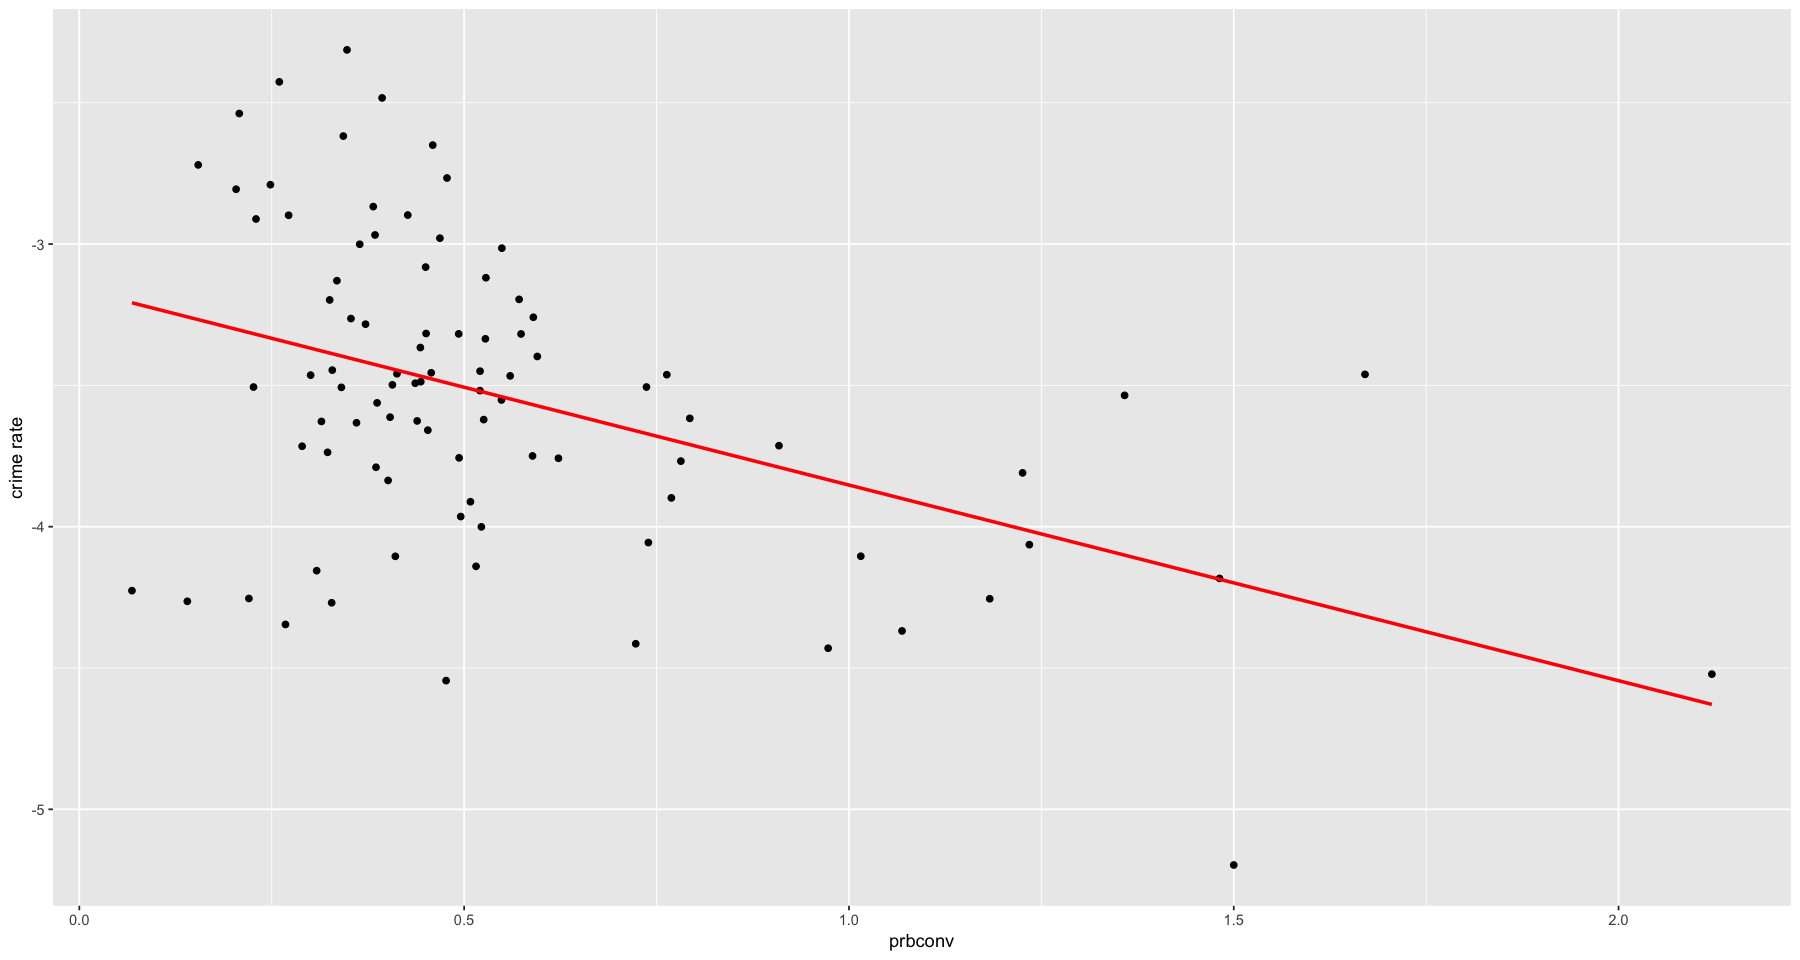

In [206]:
qplot(data = crime,prbconv, log(crmrte), xlab="prbconv",  ylab="crime rate",) + 
      stat_smooth(method="lm", se=FALSE,col="red")

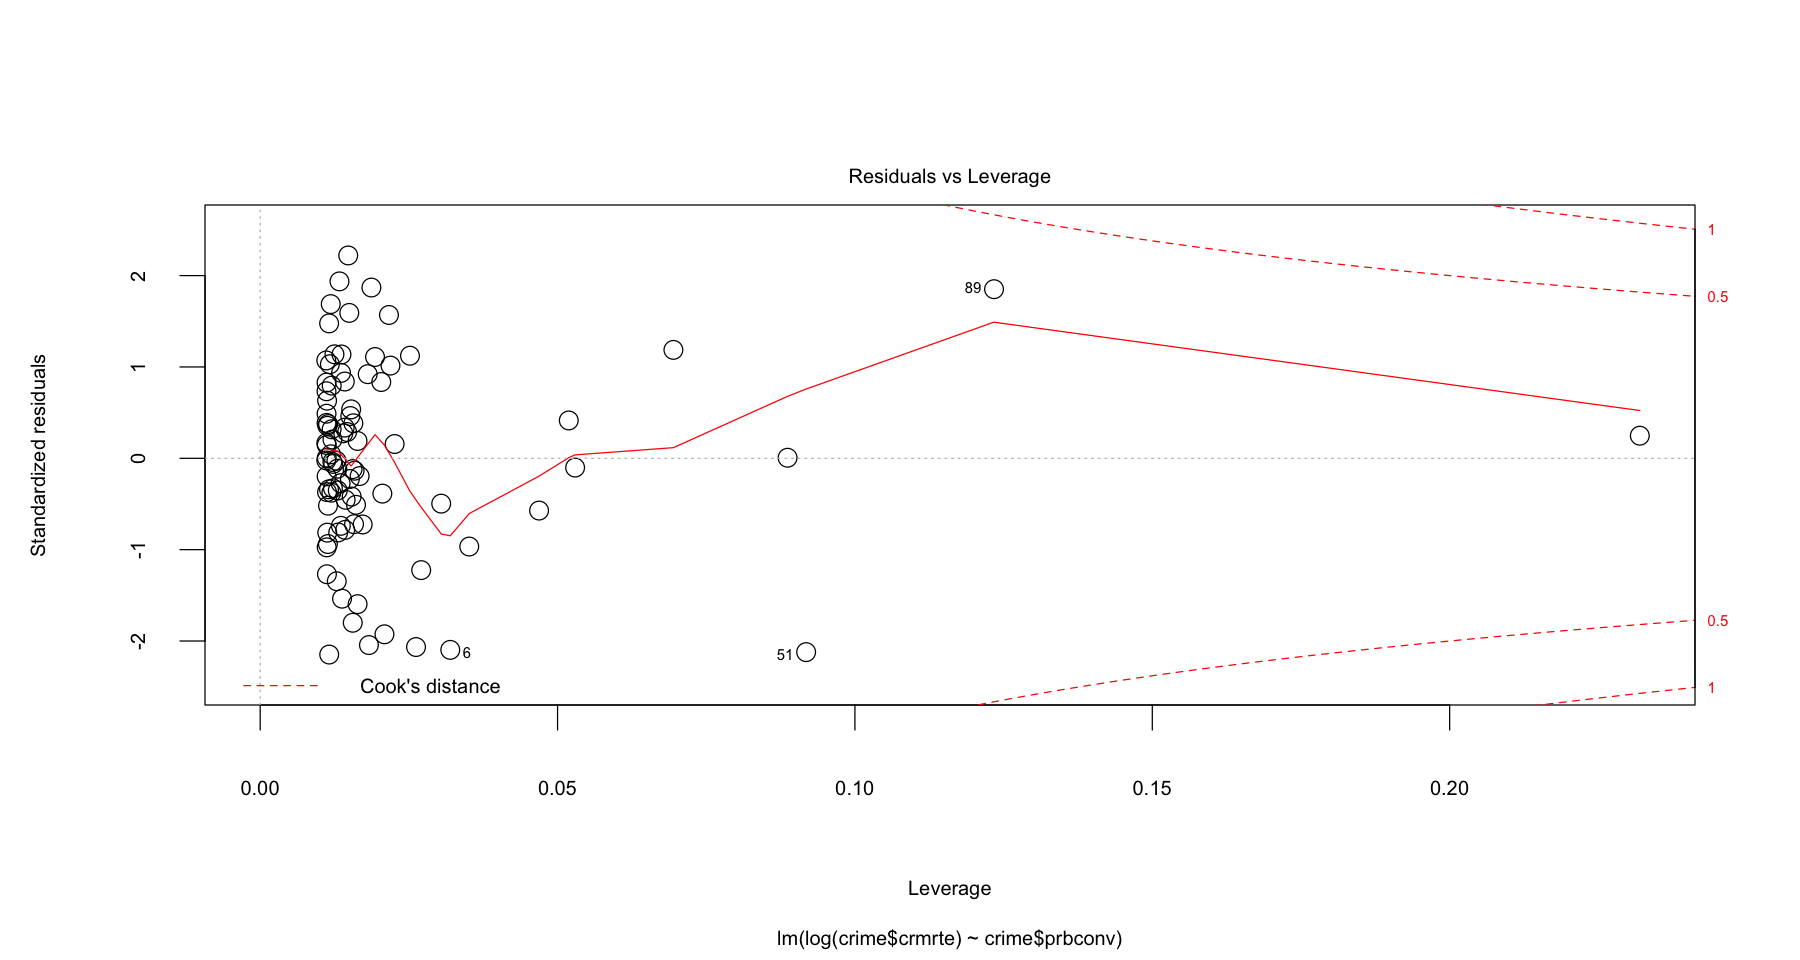

In [236]:
m1 = lm(log(crime$crmrte) ~ crime$prbconv)
plot(m1, which=5)
# there are obvious outliers and some of them have high leverage, but not too much influence.

### Probability of Prison

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1500  0.3642  0.4222  0.4106  0.4576  0.6000 

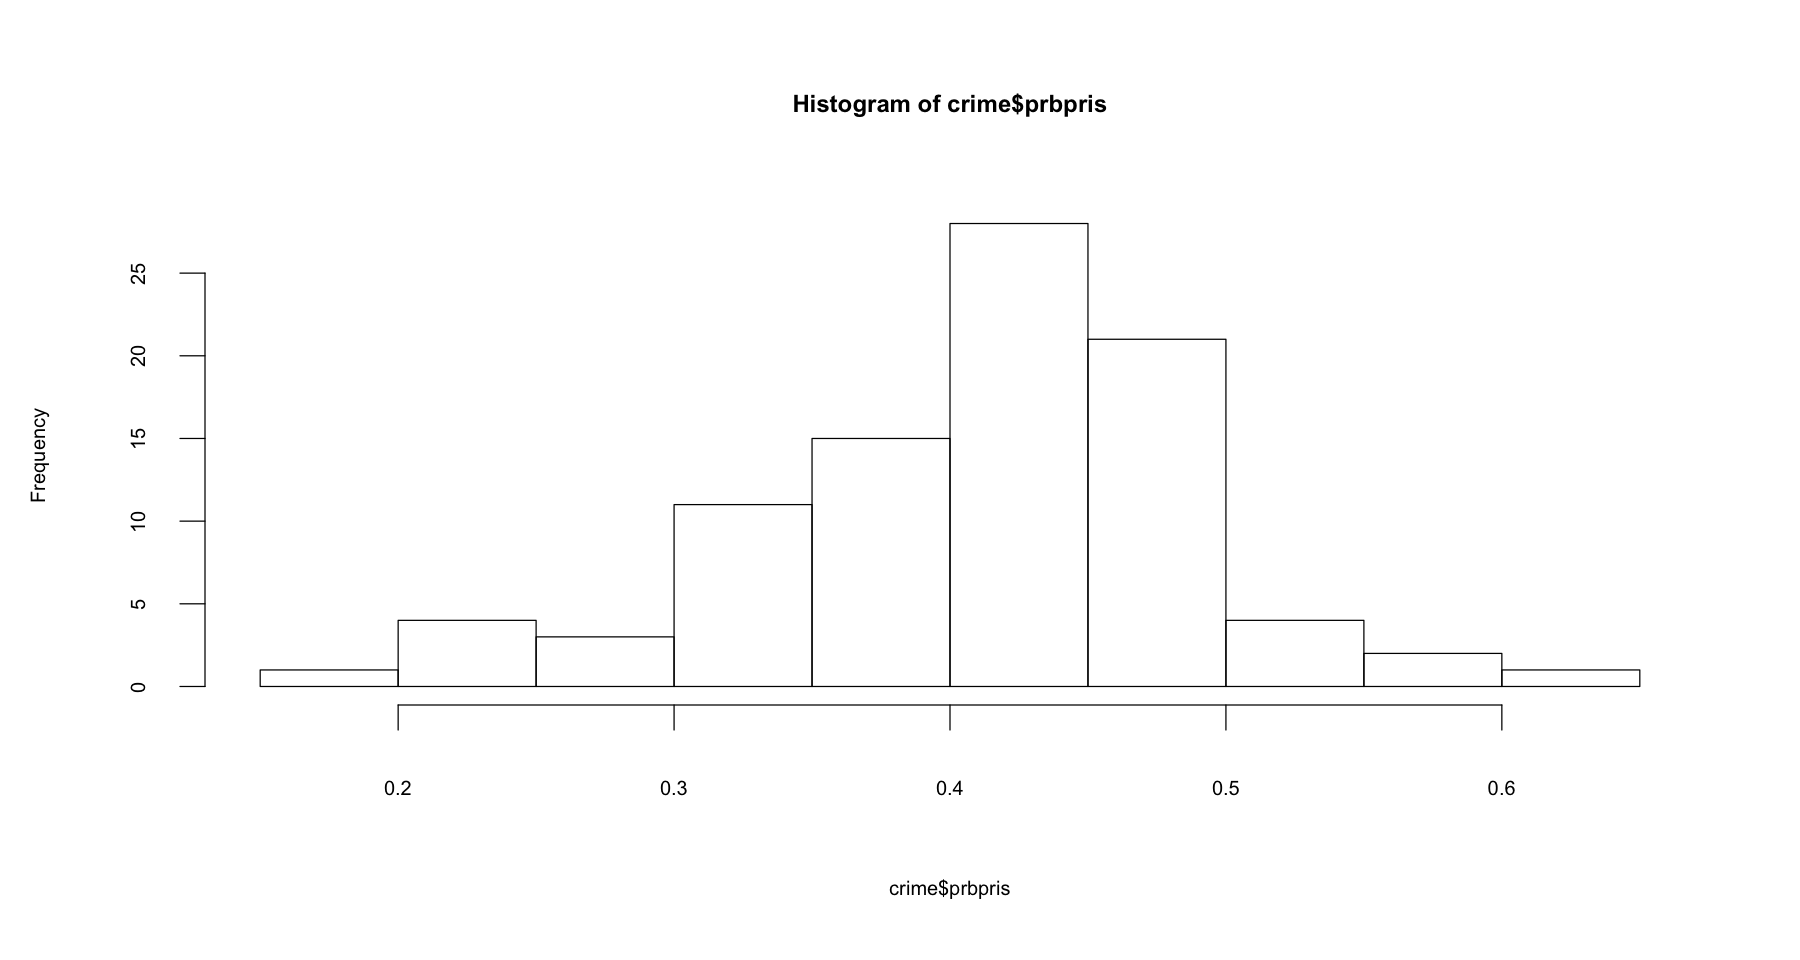

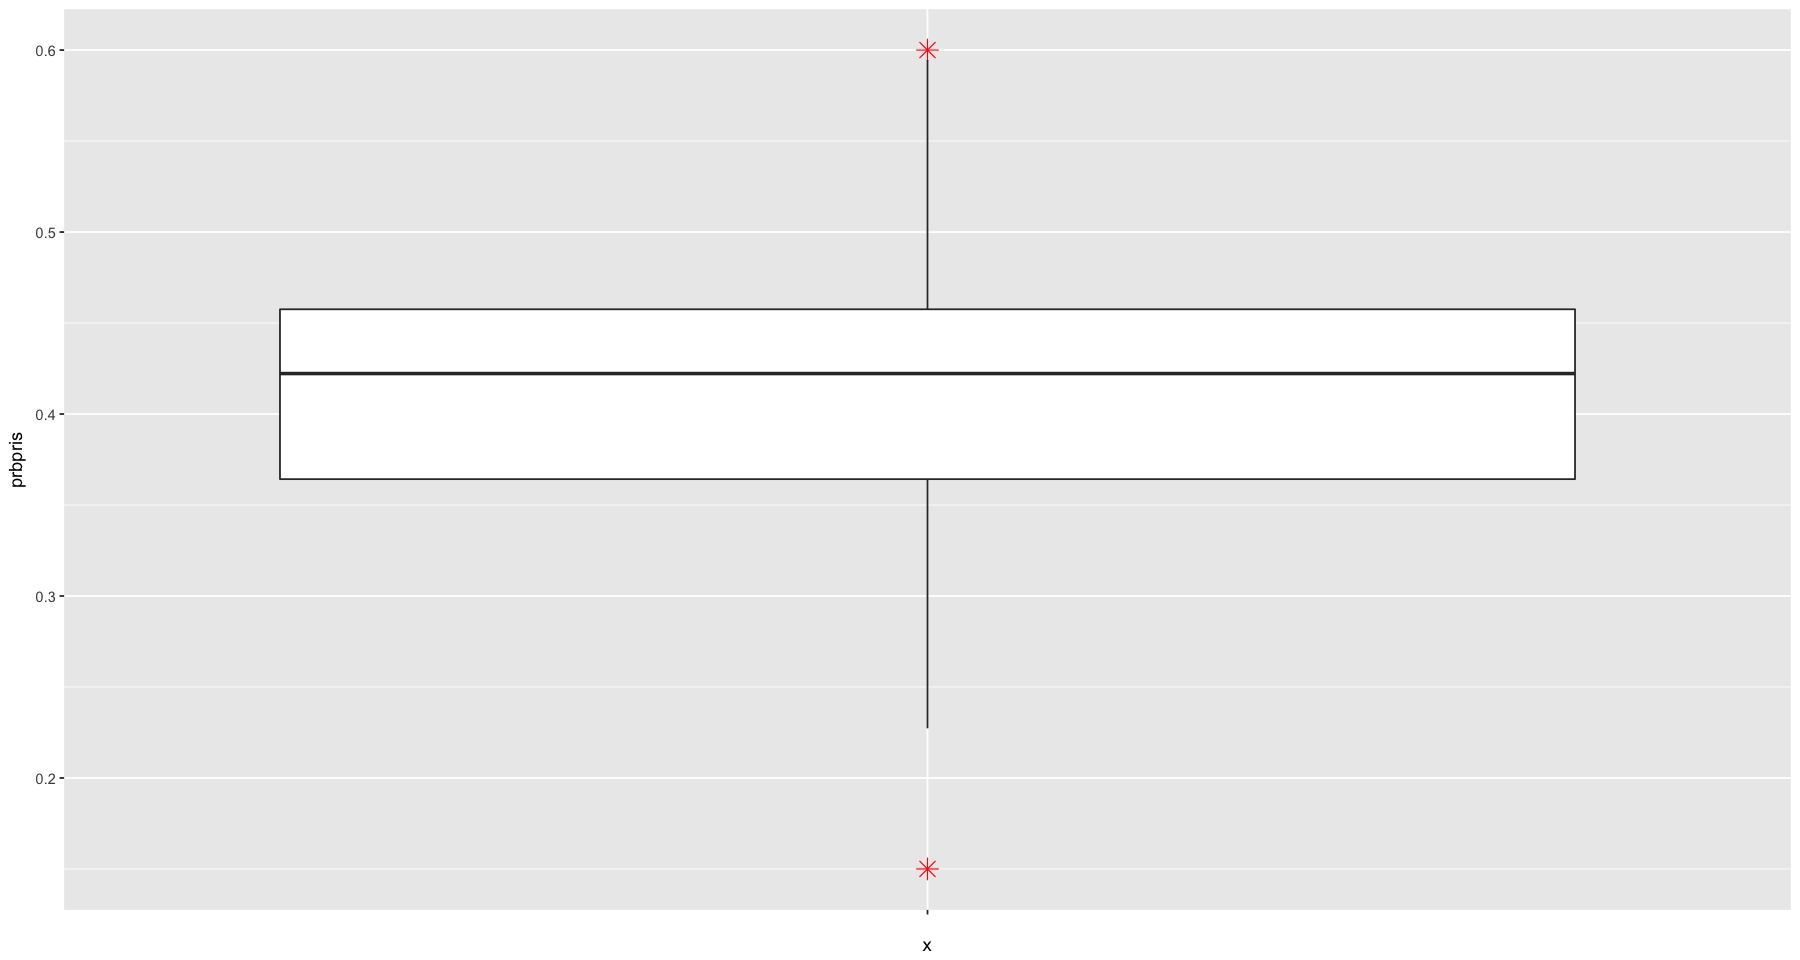

In [22]:
summary(crime$prbpris)
hist(crime$prbpris)
ggplot(crime, aes(x='', y=prbpris)) + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

In [208]:
crime[crime$prbpris < 0.2,]
# we need to review county 79 as it very low values for density.  Even if the county is 
# a very rural county with no people, are we interestd in including this data point for 
# our analysis?

county crmrte    prbarr   prbconv  prbpris avgsen polpc      density    
79 173    0.0139937 0.530435 0.327869 0.15    6.64   0.00316379 2.03422e-05
   taxpc    west ⋯ wtuc     wtrd     wfir    wser     wmfg   wfed   wsta  
79 37.72702 1    ⋯ 213.6752 175.1604 267.094 204.3792 193.01 334.44 414.68
   wloc   mix       pctymle   
79 304.32 0.4197531 0.07462687

Warning message:
“Ignoring unknown parameters: NA”

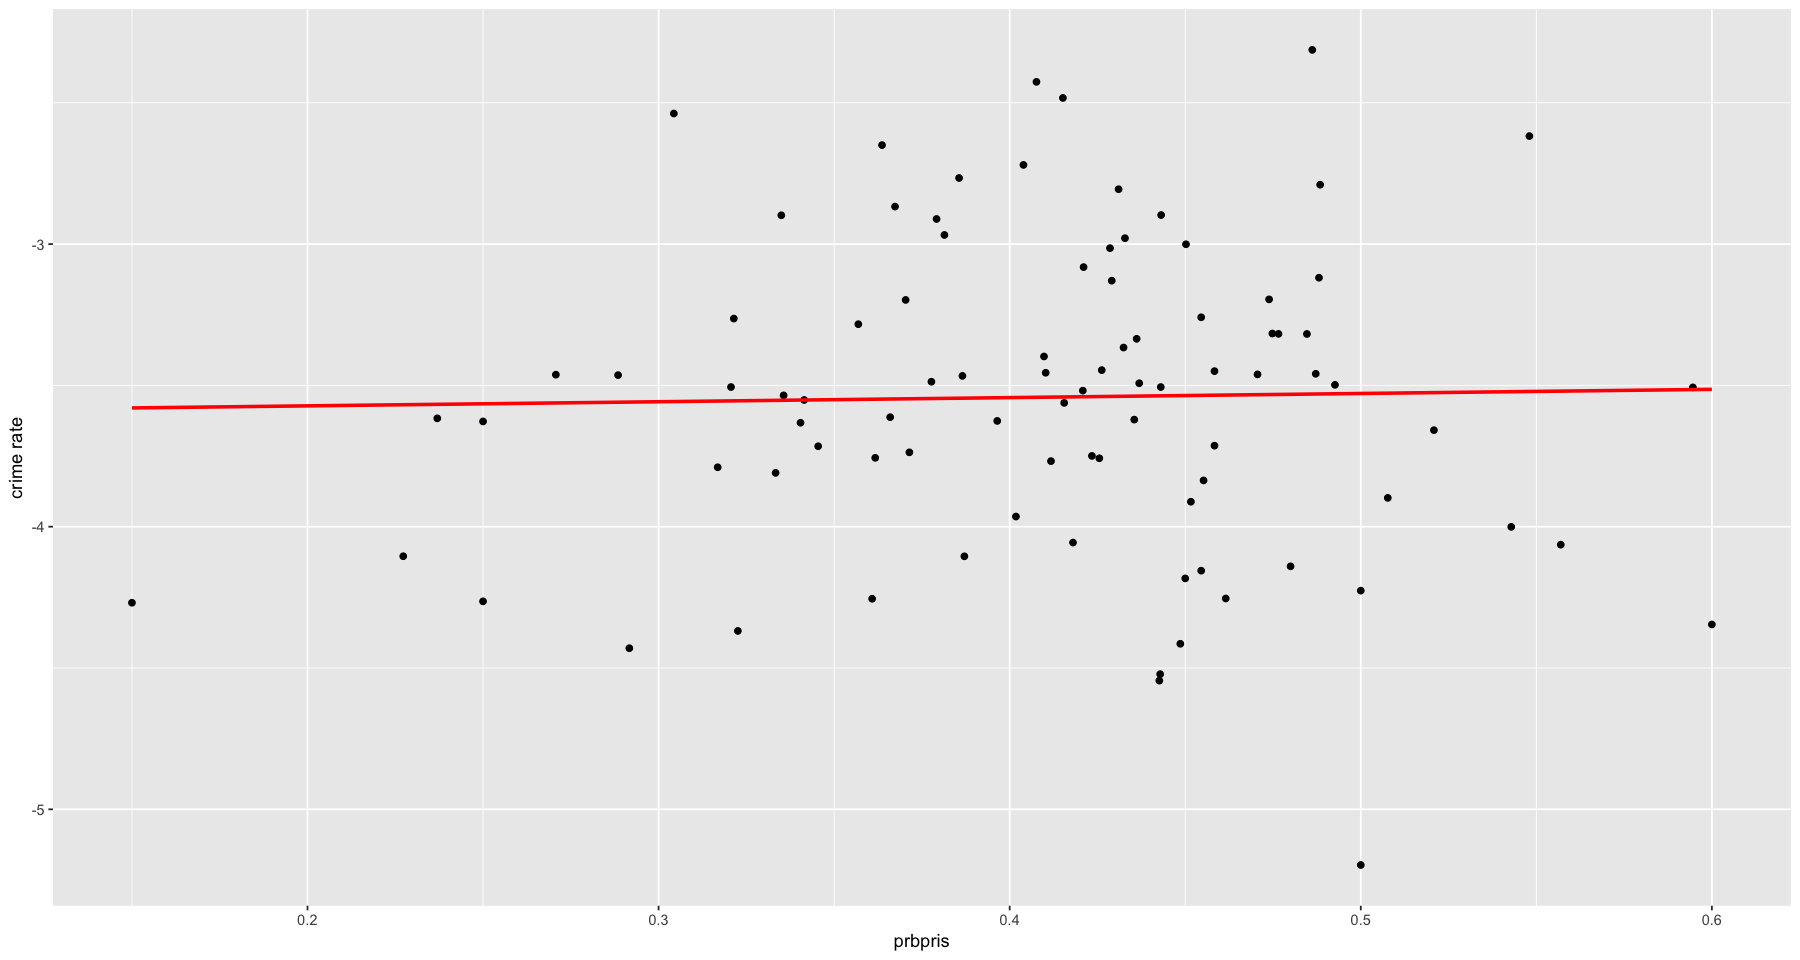

In [211]:
qplot(data = crime,prbpris, log(crmrte), xlab="prbpris",  ylab="crime rate",) + 
      stat_smooth(method="lm",se=FALSE,col="red")

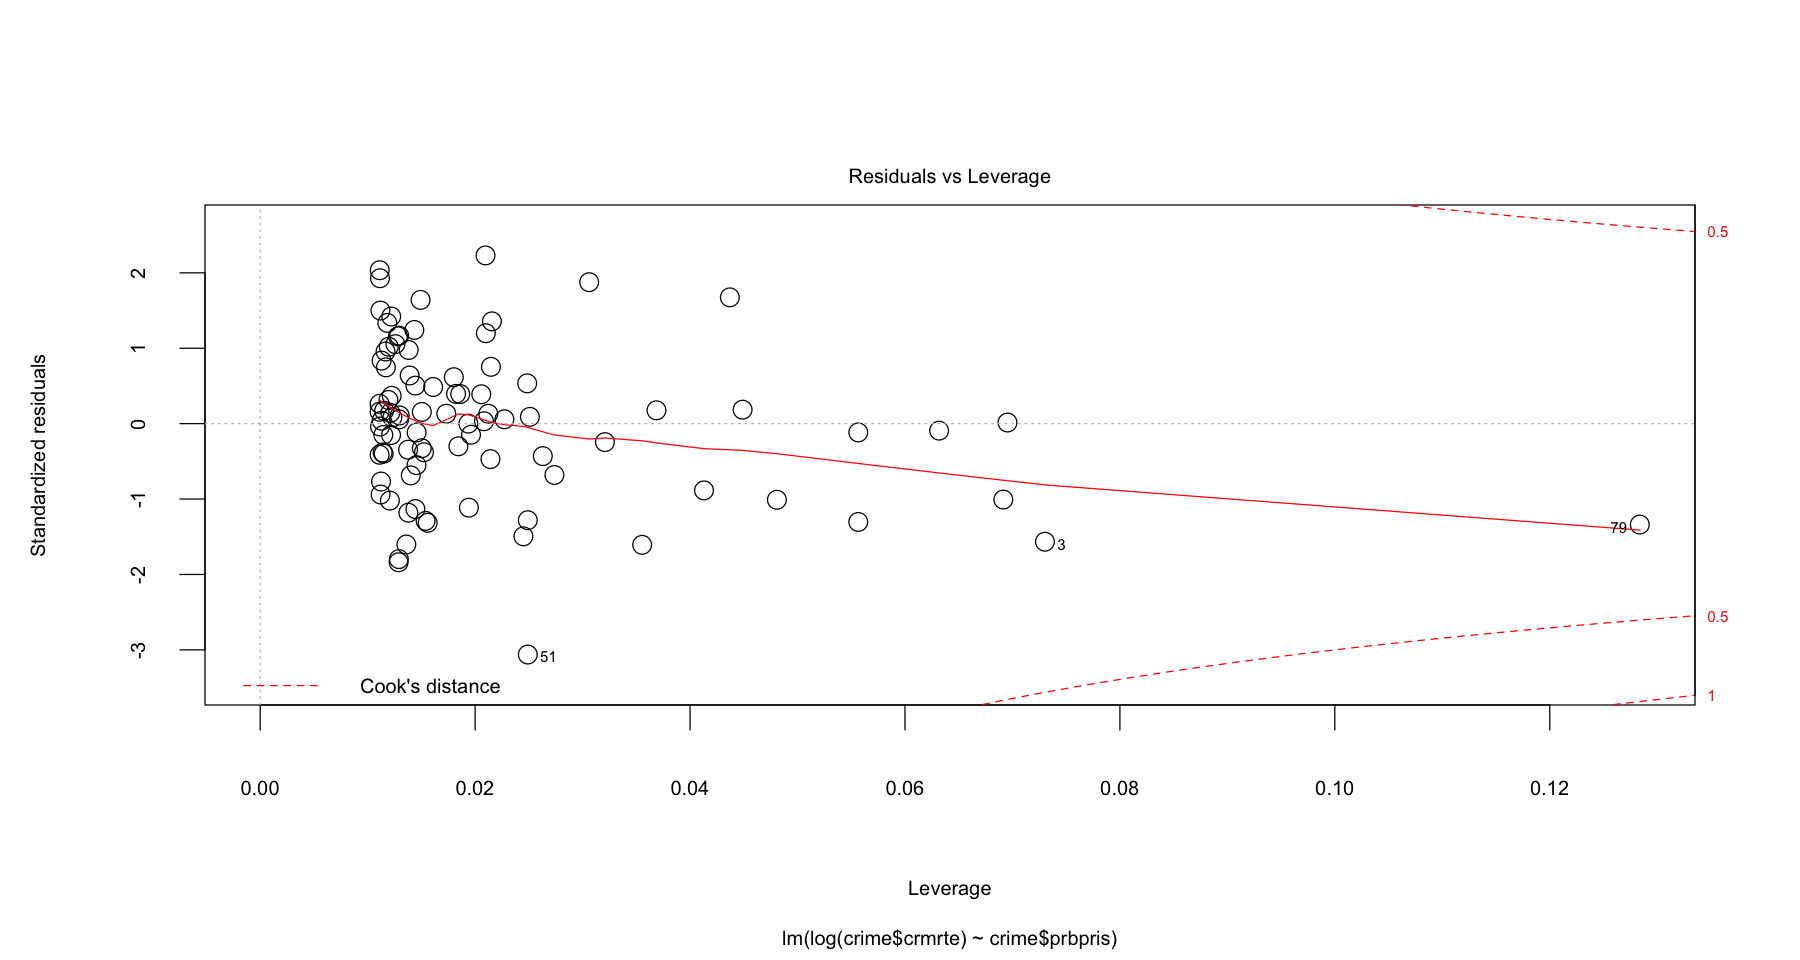

In [238]:
m2 = lm(log(crime$crmrte) ~ crime$prbpris)
plot(m2, which=5)

## Average of sentence

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.380   7.375   9.110   9.689  11.465  20.700 

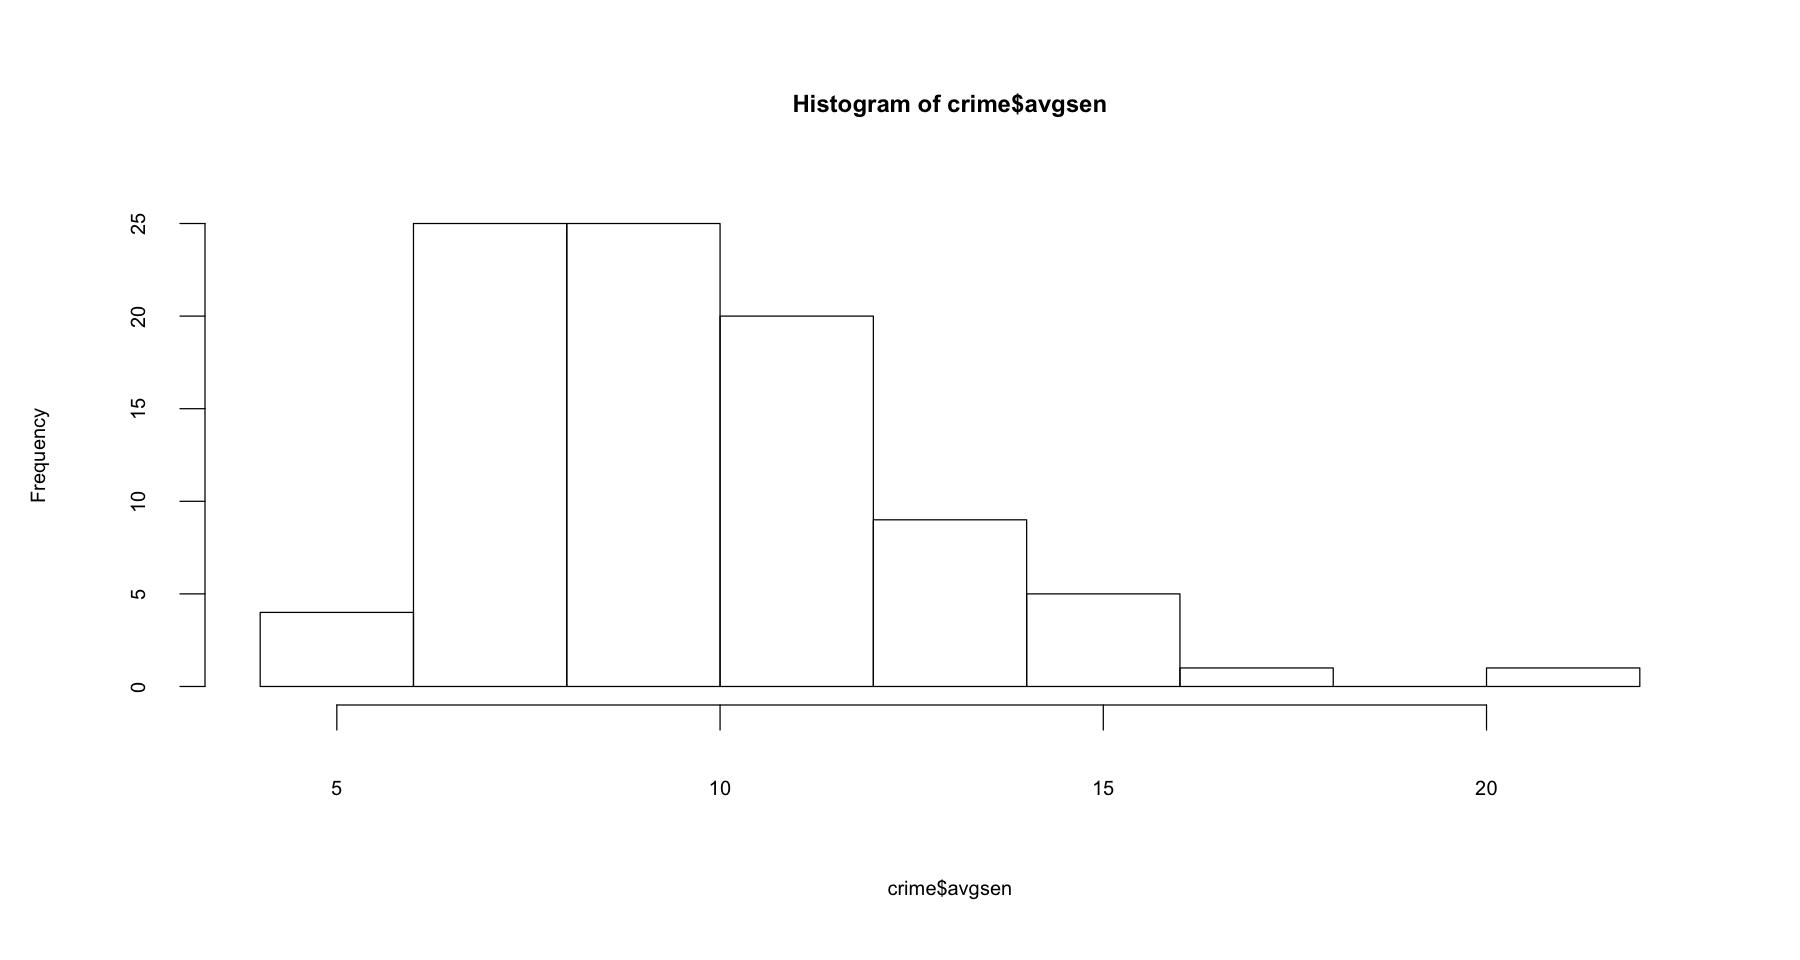

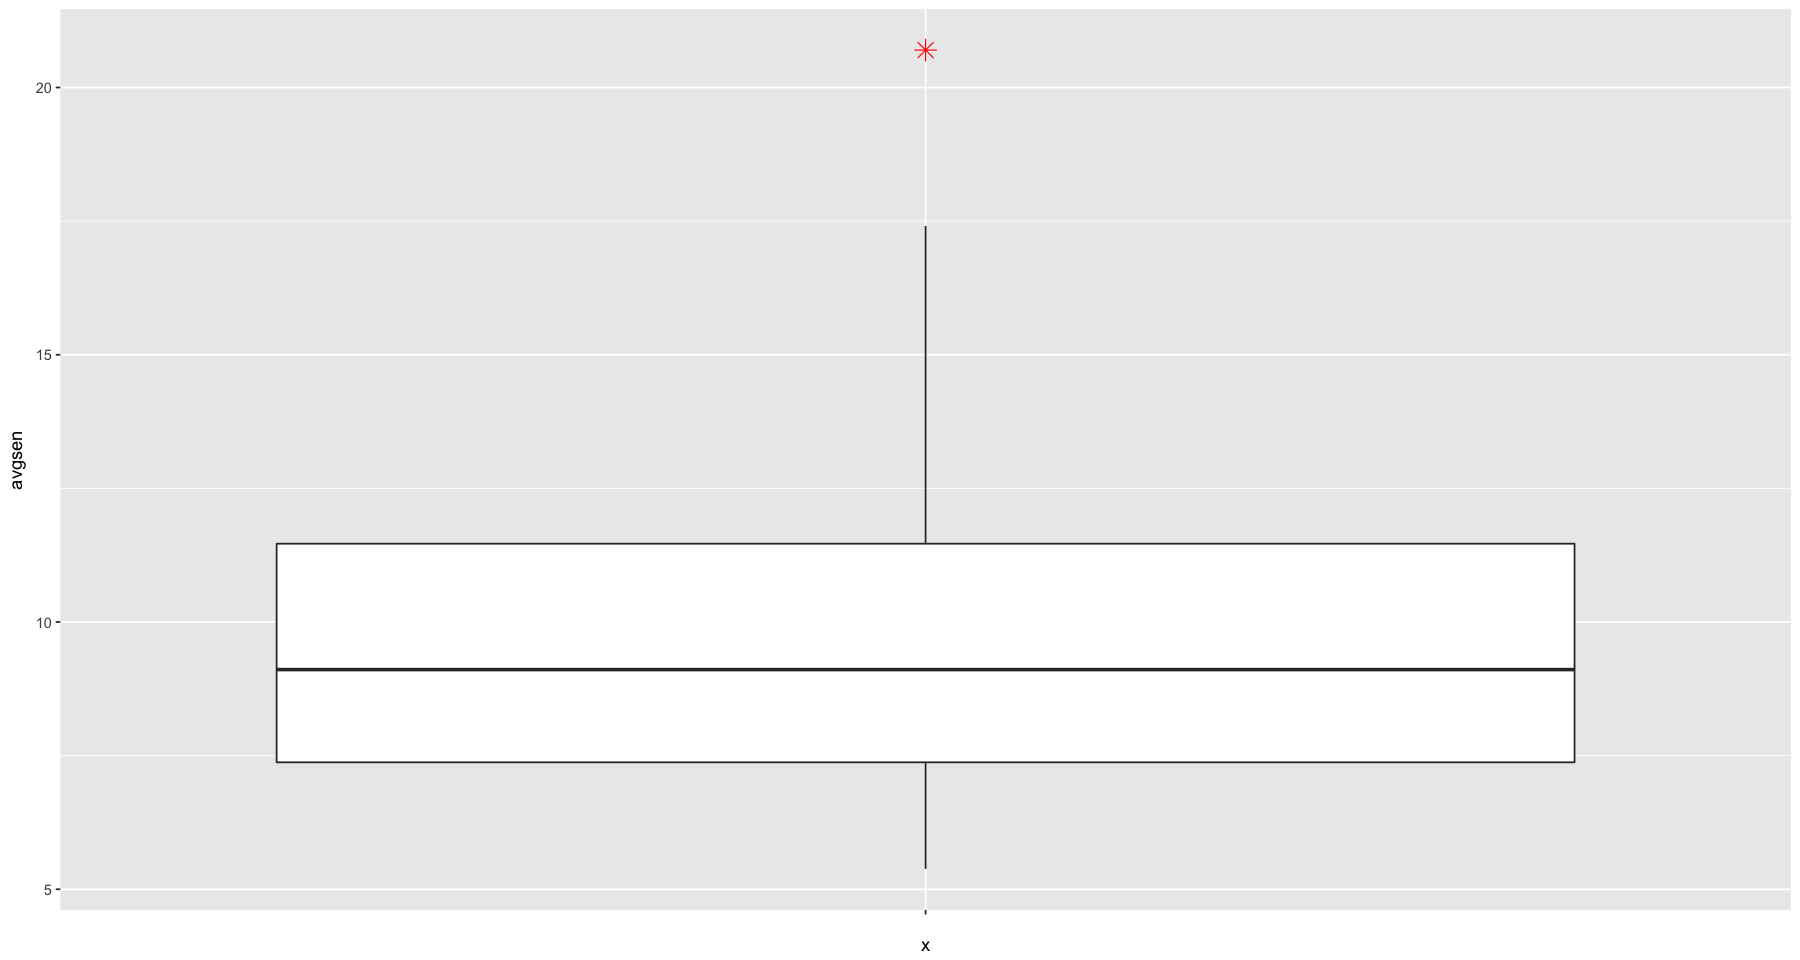

In [213]:
summary(crime$avgsen)
hist(crime$avgsen)
ggplot(crime, aes(x='', y=avgsen)) + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

In [214]:
crime[crime$avgsen > 20,]

county crmrte    prbarr  prbconv prbpris avgsen polpc      density   taxpc  
51 115    0.0055332 1.09091 1.5     0.5     20.7   0.00905433 0.3858093 28.1931
   west ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  wsta   wloc   mix
51 1    ⋯ 503.2351 217.4908 342.4658 245.2061 448.42 442.2 340.39 386.12 0.1
   pctymle   
51 0.07253495

Occurrences of violent crime could have a high impact on avgsen, therefore we do not consider this an erroneous data point (at least not just for this reason).

Warning message:
“Ignoring unknown parameters: NA”

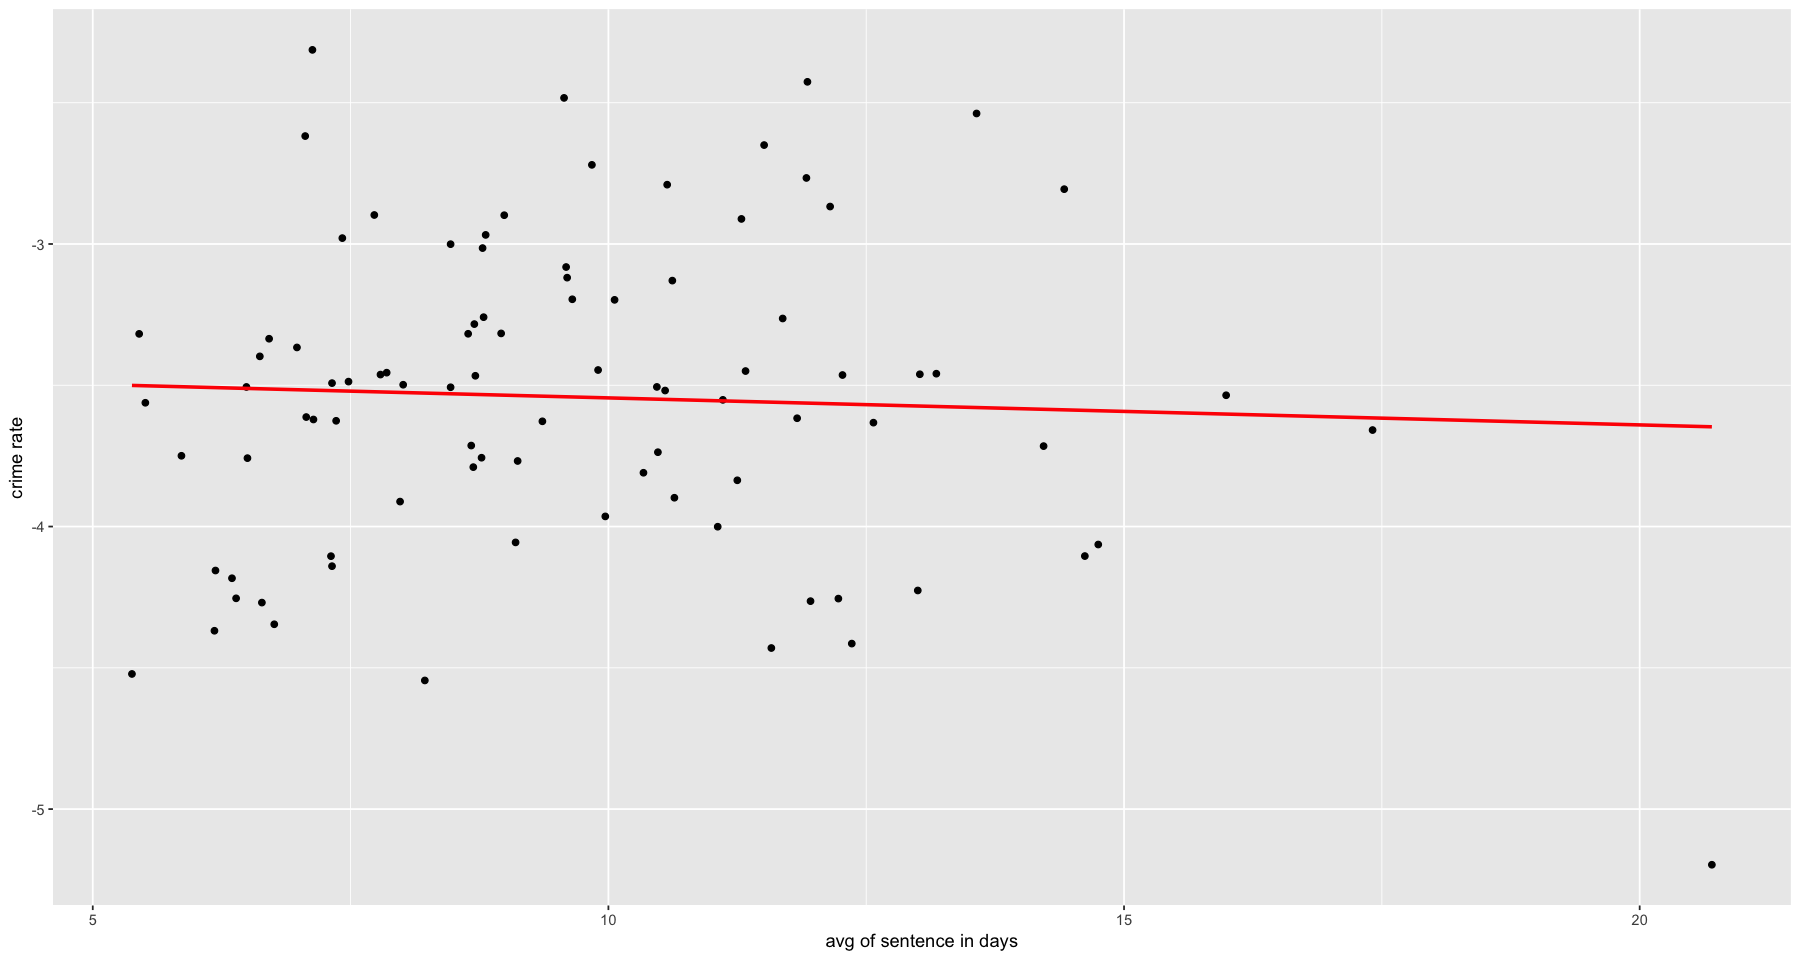

In [239]:
qplot(data = crime, avgsen, log(crmrte), xlab="avg of sentence in days",  ylab="crime rate",) + 
      stat_smooth(method="lm", se=FALSE,col="red")

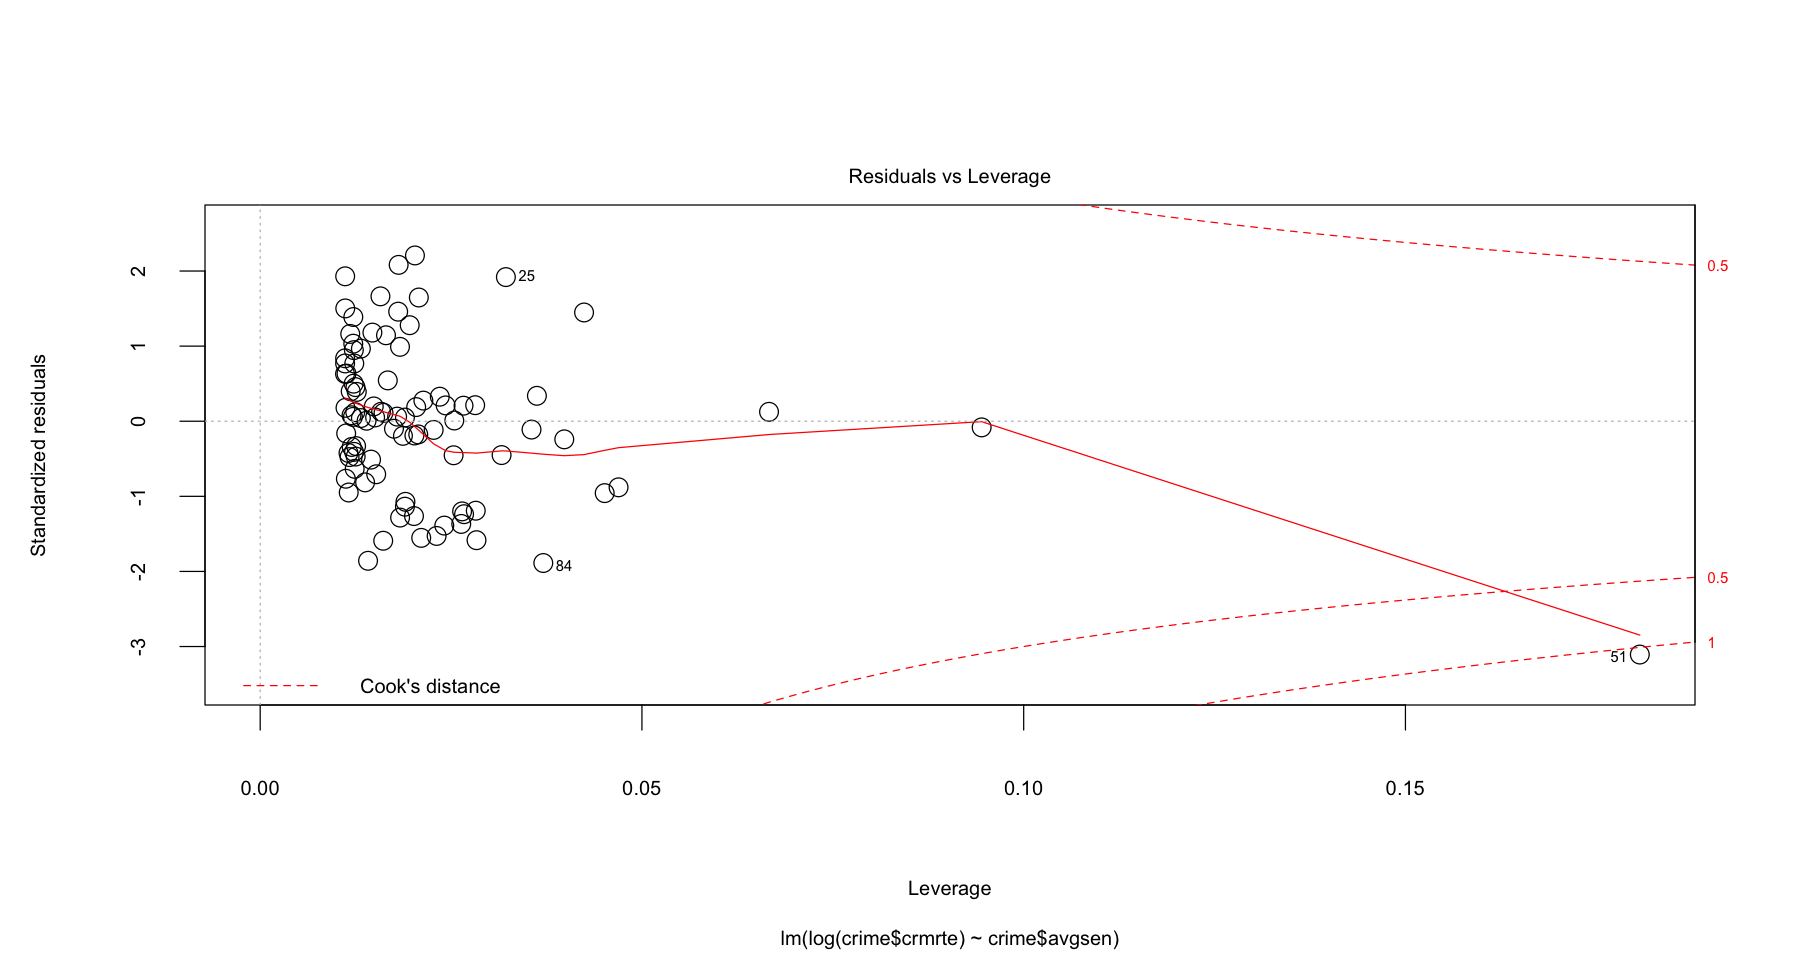

In [240]:
m3 = lm(log(crime$crmrte) ~ crime$avgsen)
plot(m3, which=5)

In [241]:
#taking note of high influence point county 115

### Police per capita

This variable is of interest for our research because one of the initiatives the political campaign is considering is increasing the police force.

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007459 0.0012378 0.0014897 0.0017080 0.0018856 0.0090543 

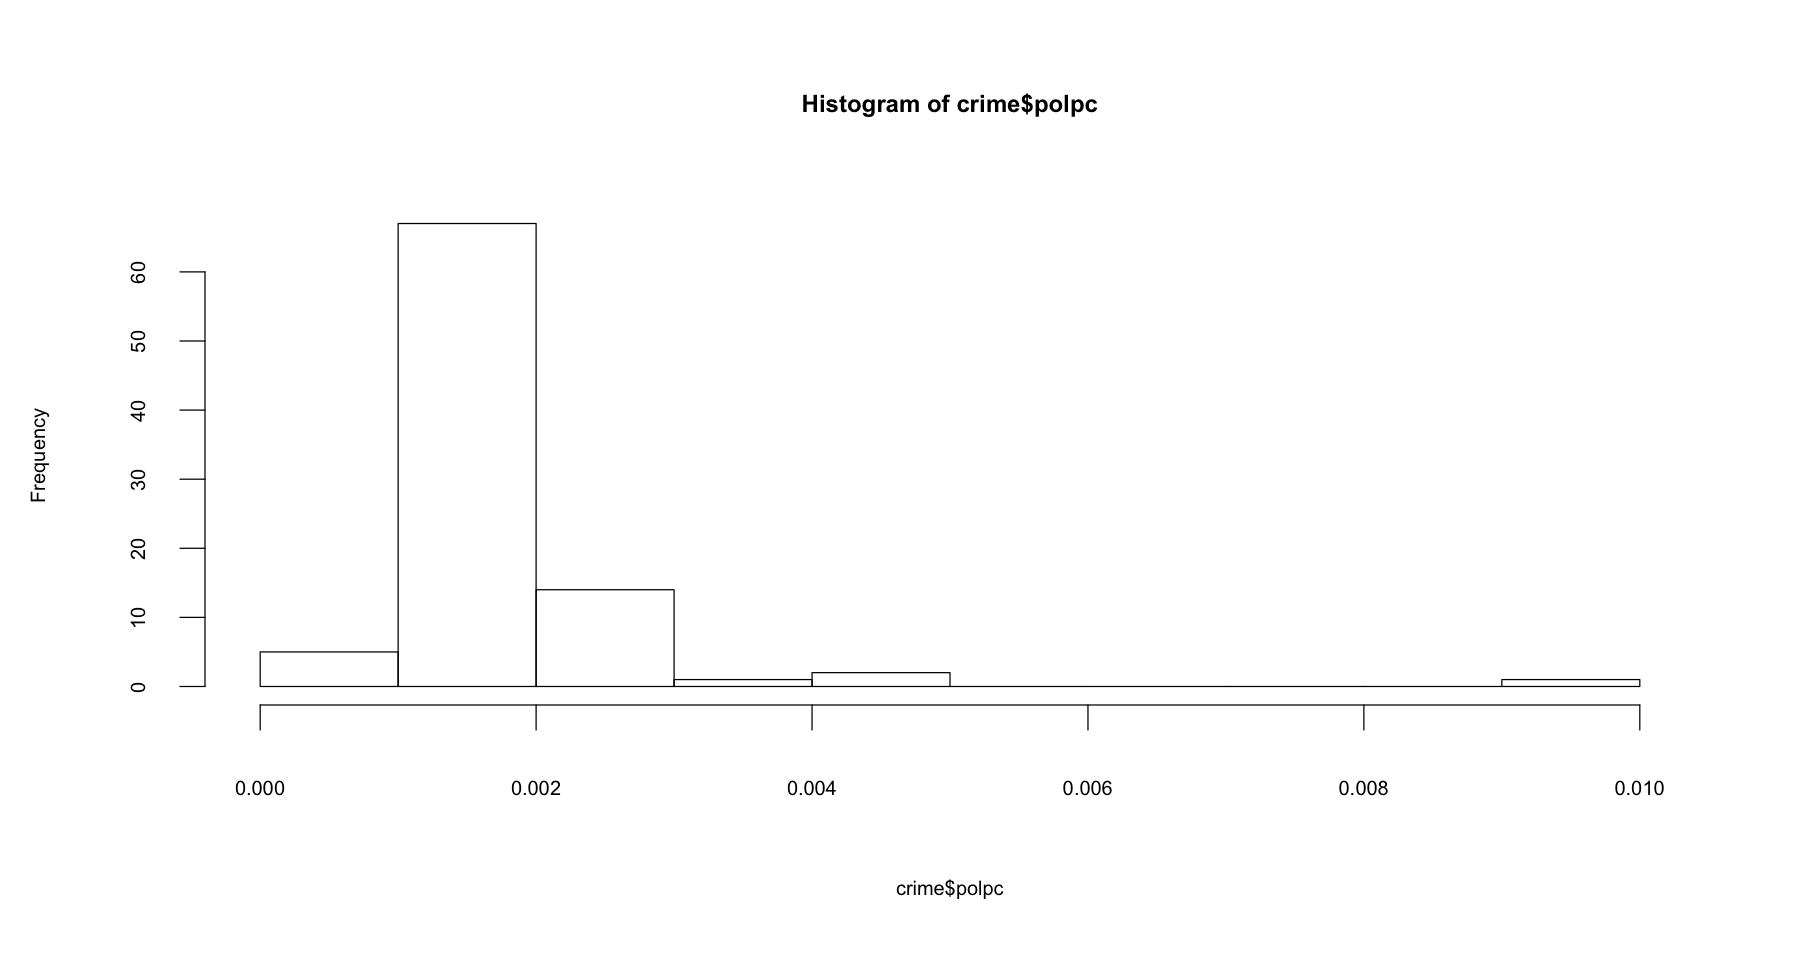

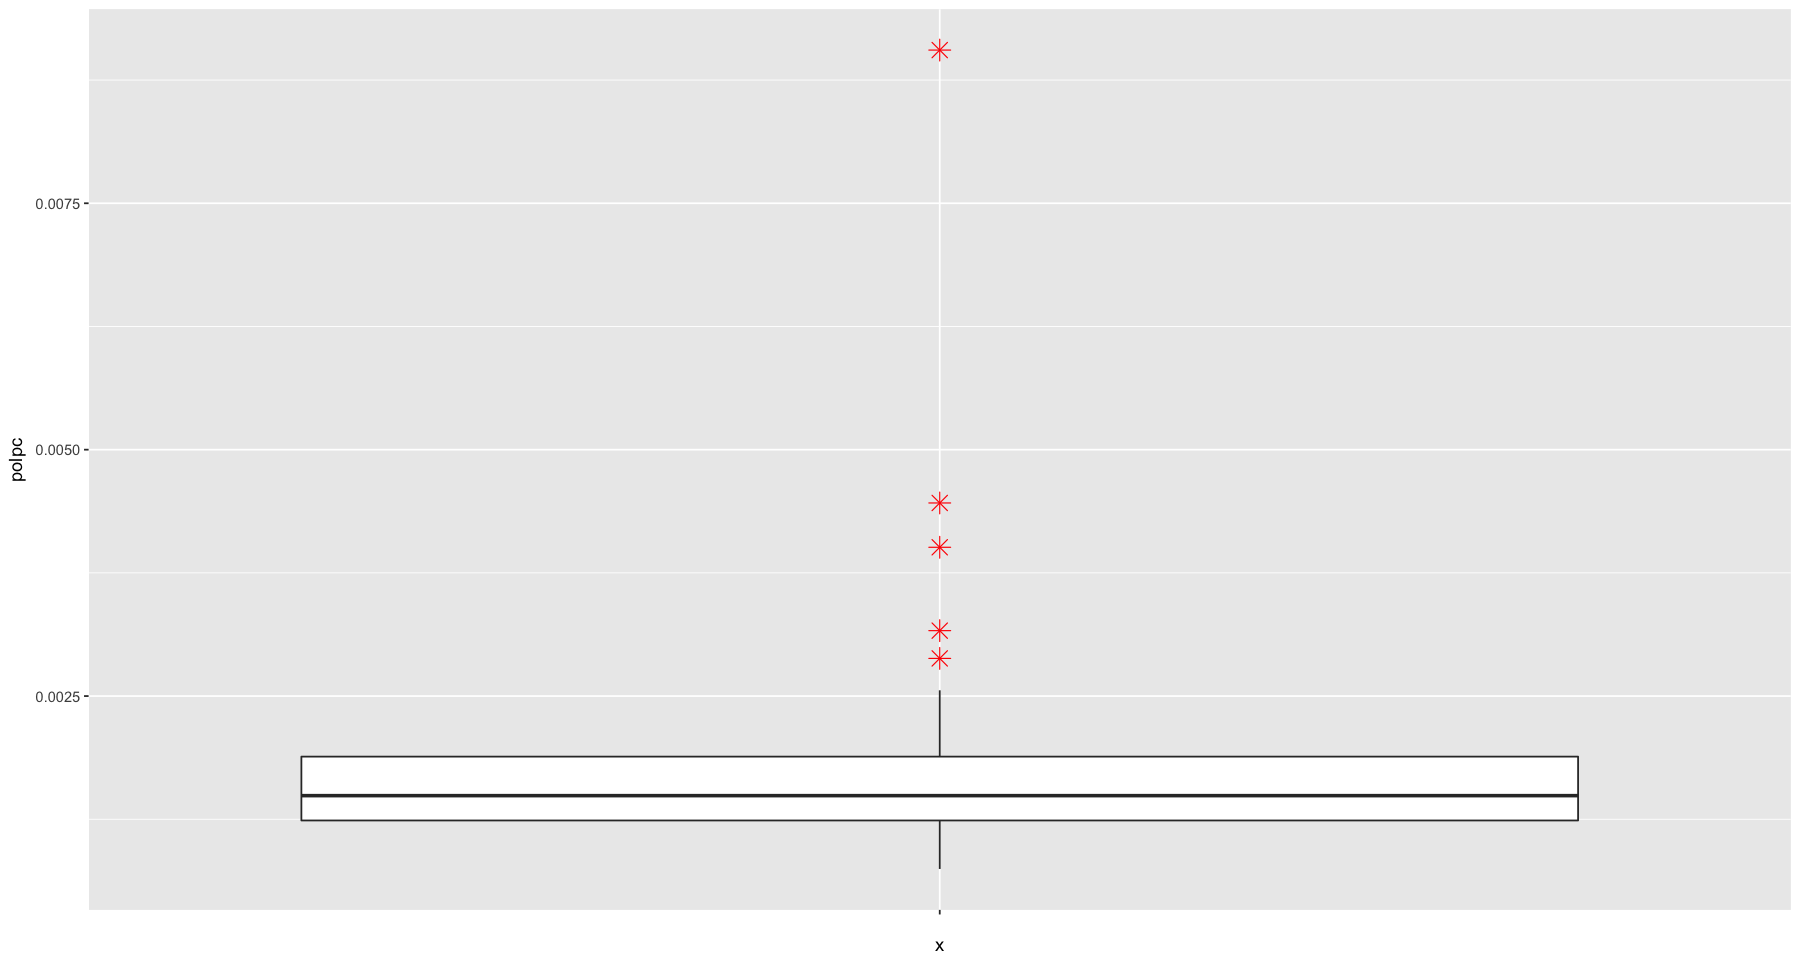

In [26]:
summary(crime$polpc)
hist(crime$polpc)
ggplot(crime, aes(x='', y=polpc)) + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

In [219]:
crime[crime$polpc > 0.0075,]

county crmrte    prbarr  prbconv prbpris avgsen polpc      density   taxpc  
51 115    0.0055332 1.09091 1.5     0.5     20.7   0.00905433 0.3858093 28.1931
   west ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  wsta   wloc   mix
51 1    ⋯ 503.2351 217.4908 342.4658 245.2061 448.42 442.2 340.39 386.12 0.1
   pctymle   
51 0.07253495

Warning message:
“Ignoring unknown parameters: NA”

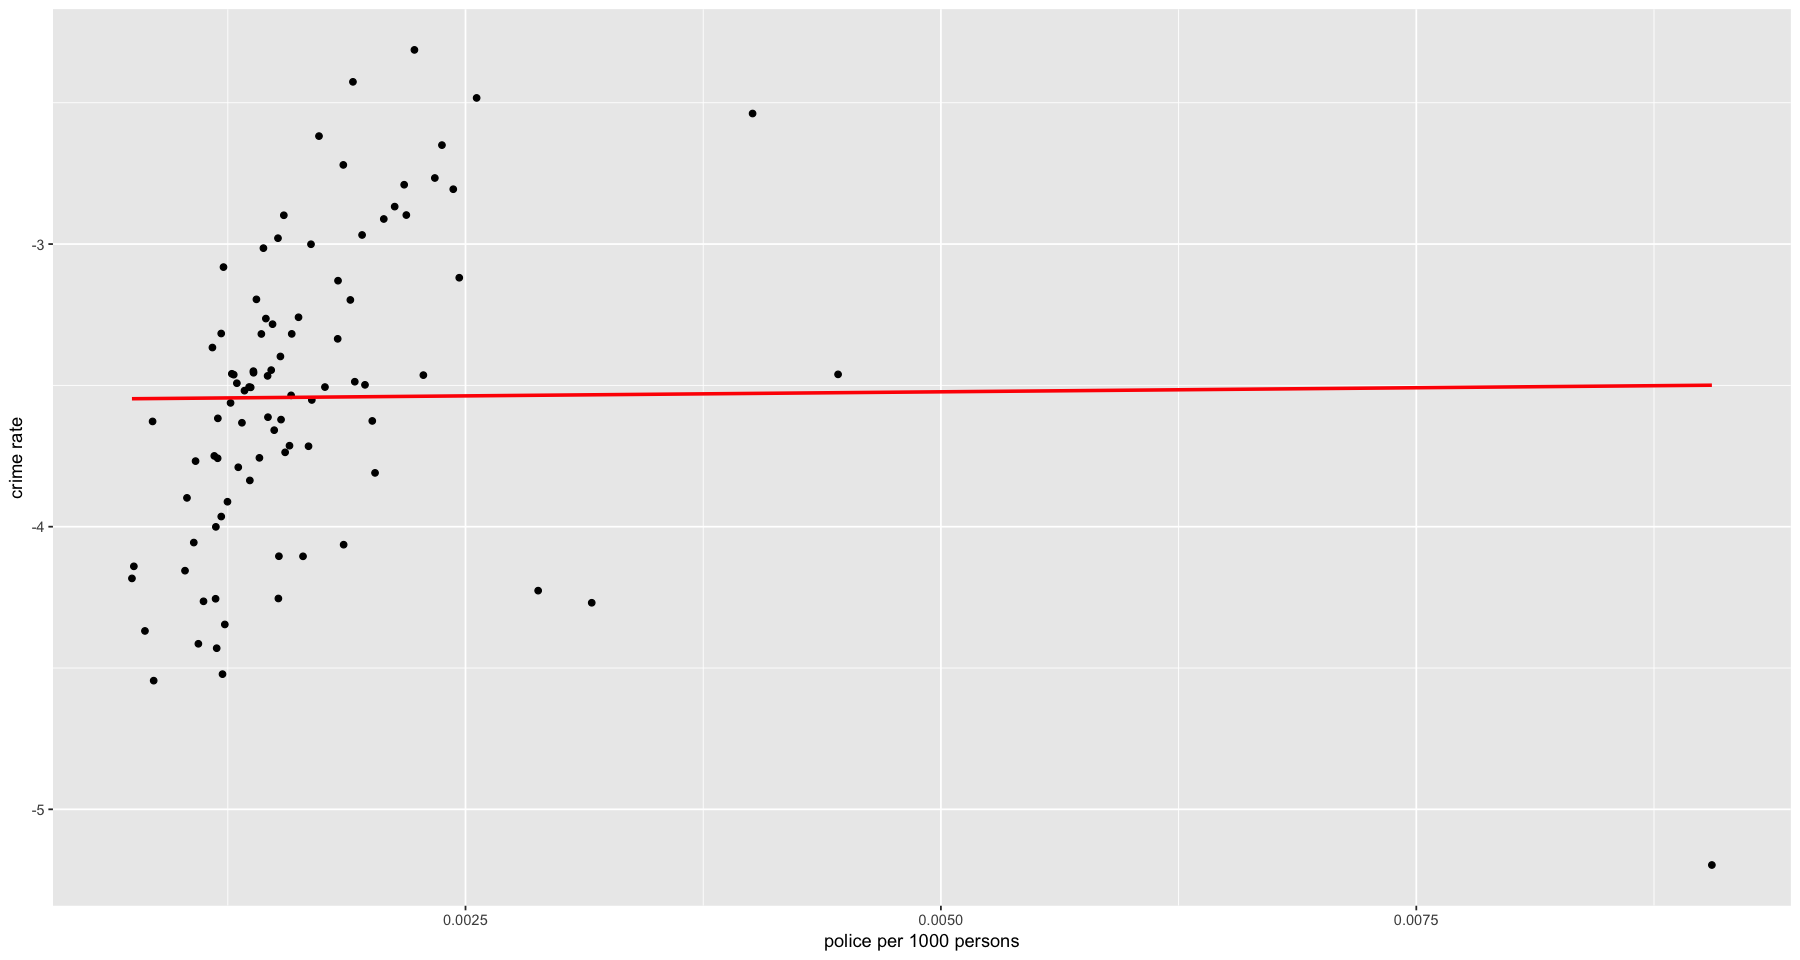

In [218]:
qplot(data = crime, polpc, log(crmrte), xlab="police per 1000 persons",  ylab="crime rate",) + 
      stat_smooth(method="lm", n=10, se=FALSE,col="red") 

County 115 again, displayed in the bottom right corner has very high influence.  It is bringing the slope of the regression line down.  Getting rid of this value would show a high positive correlation between crime rate and police per capita.   This is unexpected but could be explained by:

1) Counties with high crime rate "prepare" with anticipation and hire more police force.
2) More police could mean more bandwidth to "report and register" offenses, which could lead to higher crime rates values. Let's suppose two counties, where the first county does a very poor job or registering offenses (let's suppose they are minor offenses) and the second county has more officials available to register the offenses.  County 2 with more police would obviously display more crime rate.  

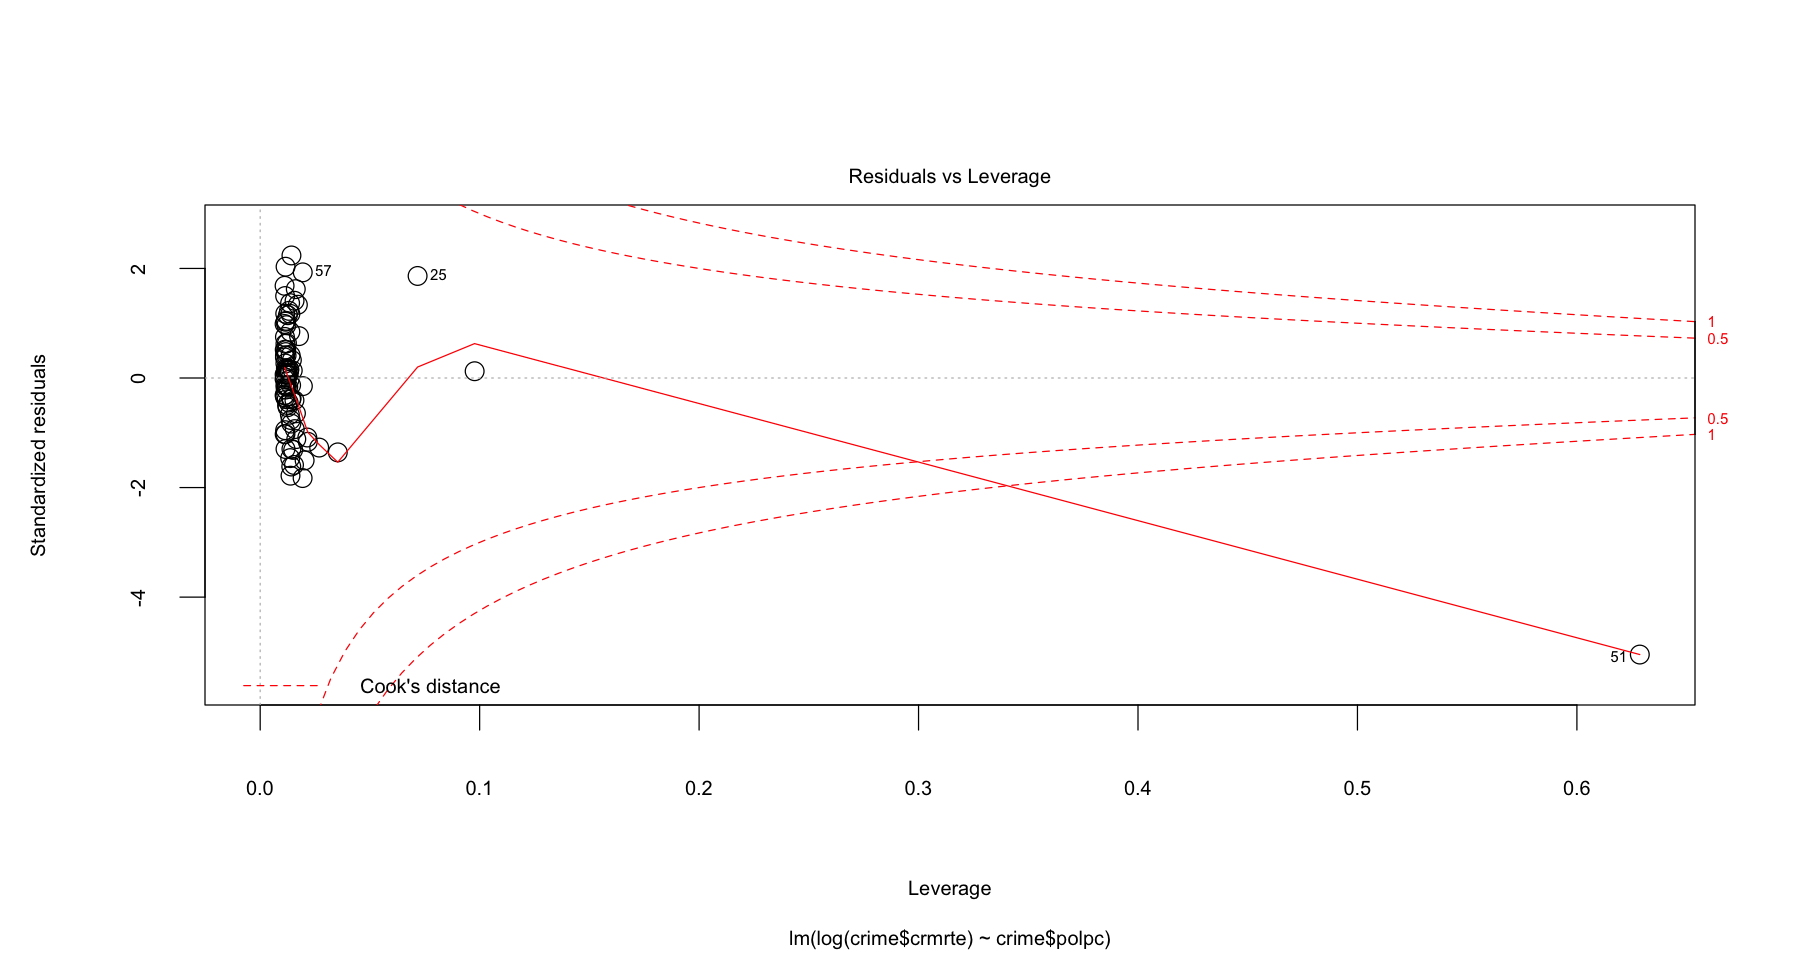

In [242]:
m4 = lm(log(crime$crmrte) ~ crime$polpc)
plot(m4, which=5)

Warning message:
“Ignoring unknown parameters: NA”

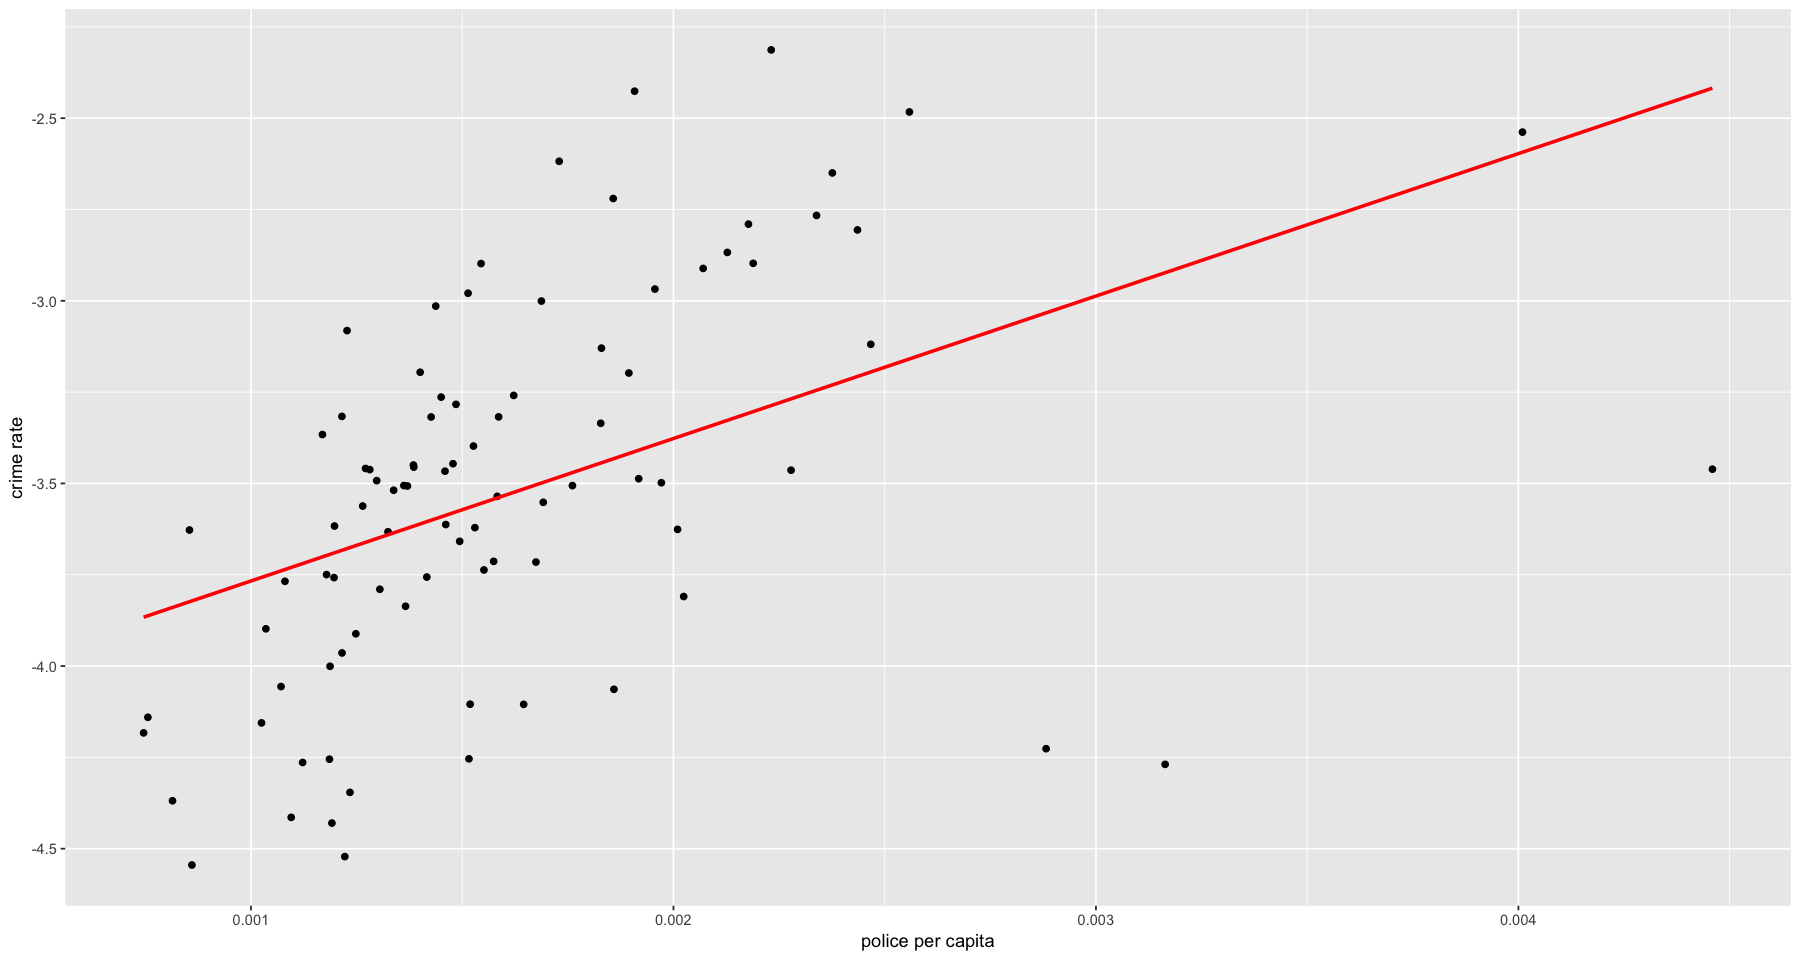

In [225]:
# let's plot again without the high influence data point.
qplot(data = crime[crime$county != 115,], polpc, log(crmrte), xlab="police per capita",  ylab="crime rate",) + 
      stat_smooth(method="lm", se=FALSE,col="red")

### Density

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54718 0.97925 1.43567 1.56926 8.82765 

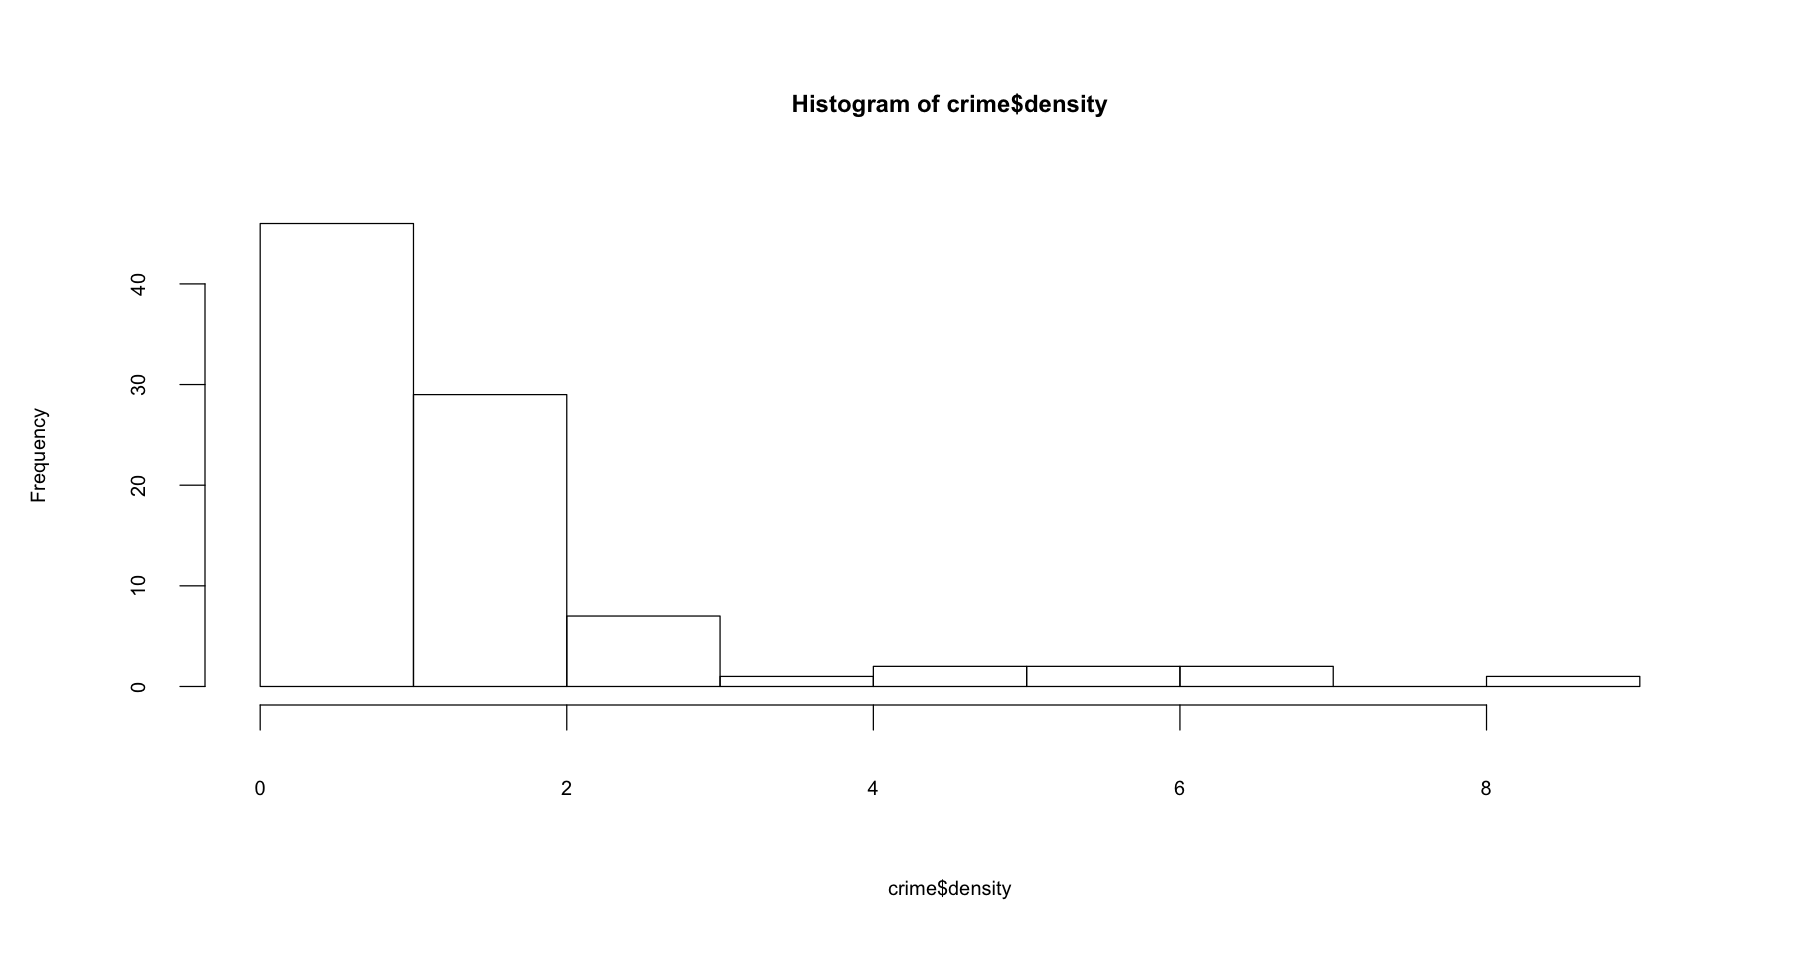

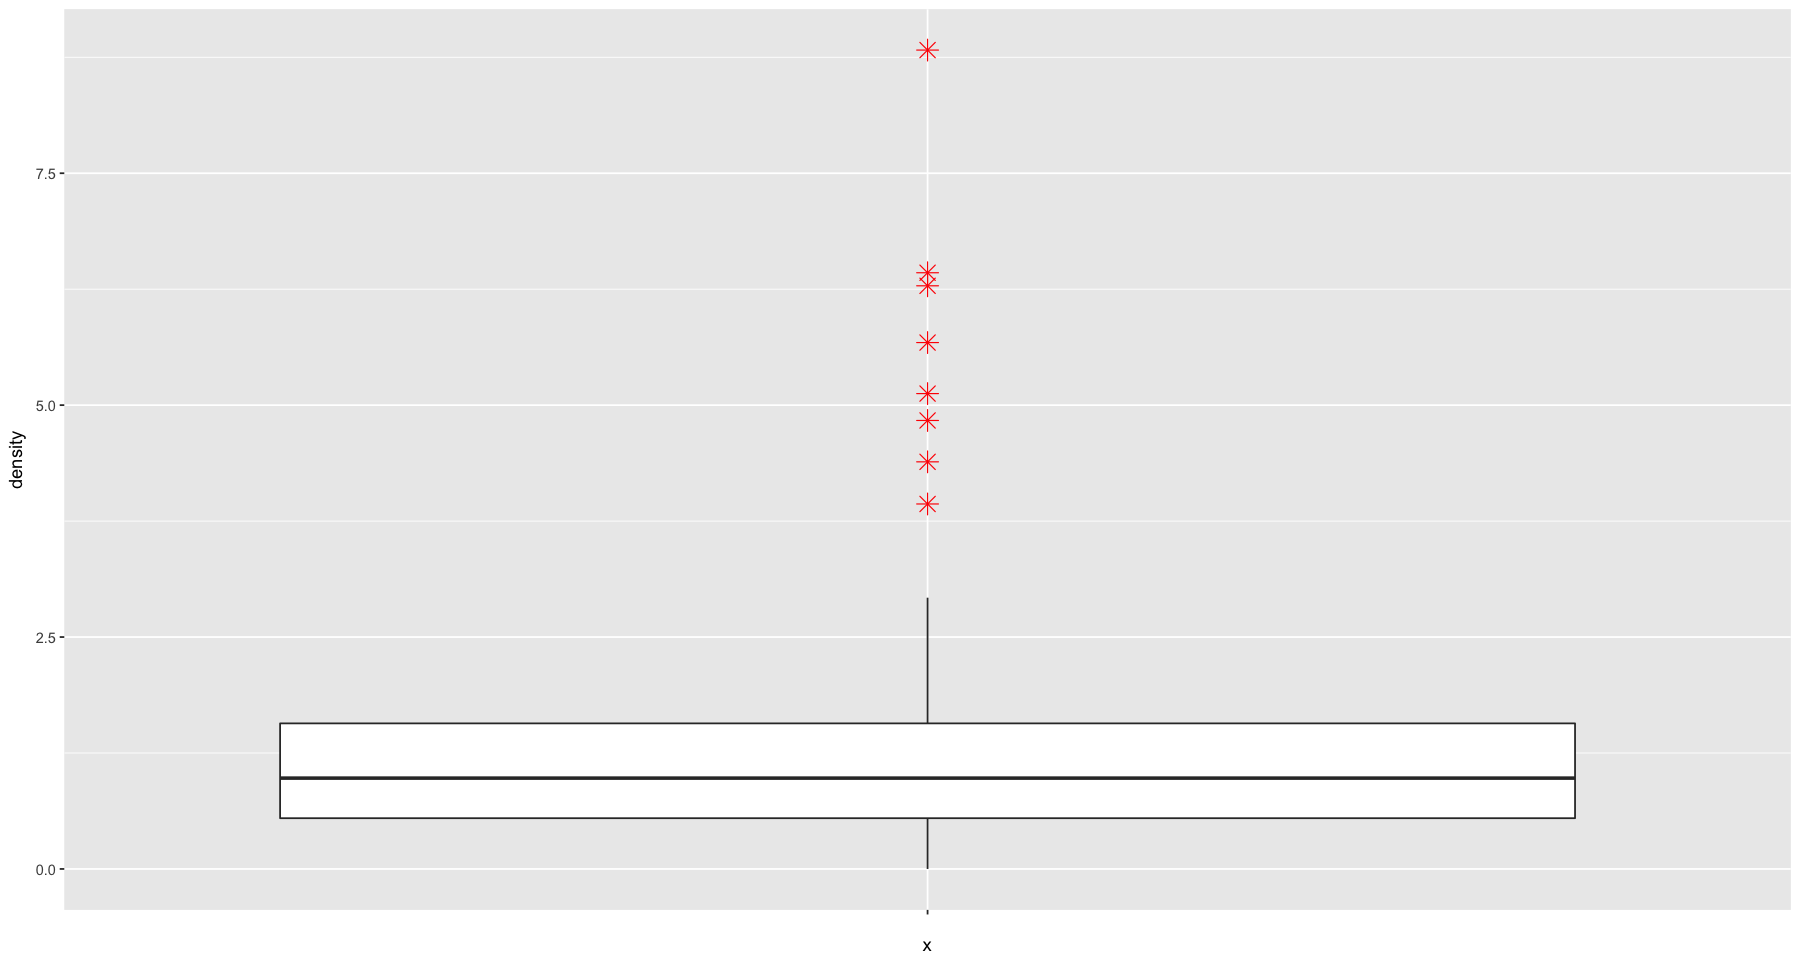

In [243]:
summary(crime$density)
hist(crime$density)
ggplot(crime, aes(x='', y=density)) + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

In [228]:
crime[crime$density <= 0.0001,]

county crmrte    prbarr   prbconv  prbpris avgsen polpc      density    
79 173    0.0139937 0.530435 0.327869 0.15    6.64   0.00316379 2.03422e-05
   taxpc    west ⋯ wtuc     wtrd     wfir    wser     wmfg   wfed   wsta  
79 37.72702 1    ⋯ 213.6752 175.1604 267.094 204.3792 193.01 334.44 414.68
   wloc   mix       pctymle   
79 304.32 0.4197531 0.07462687

Warning message:
“Ignoring unknown parameters: NA”

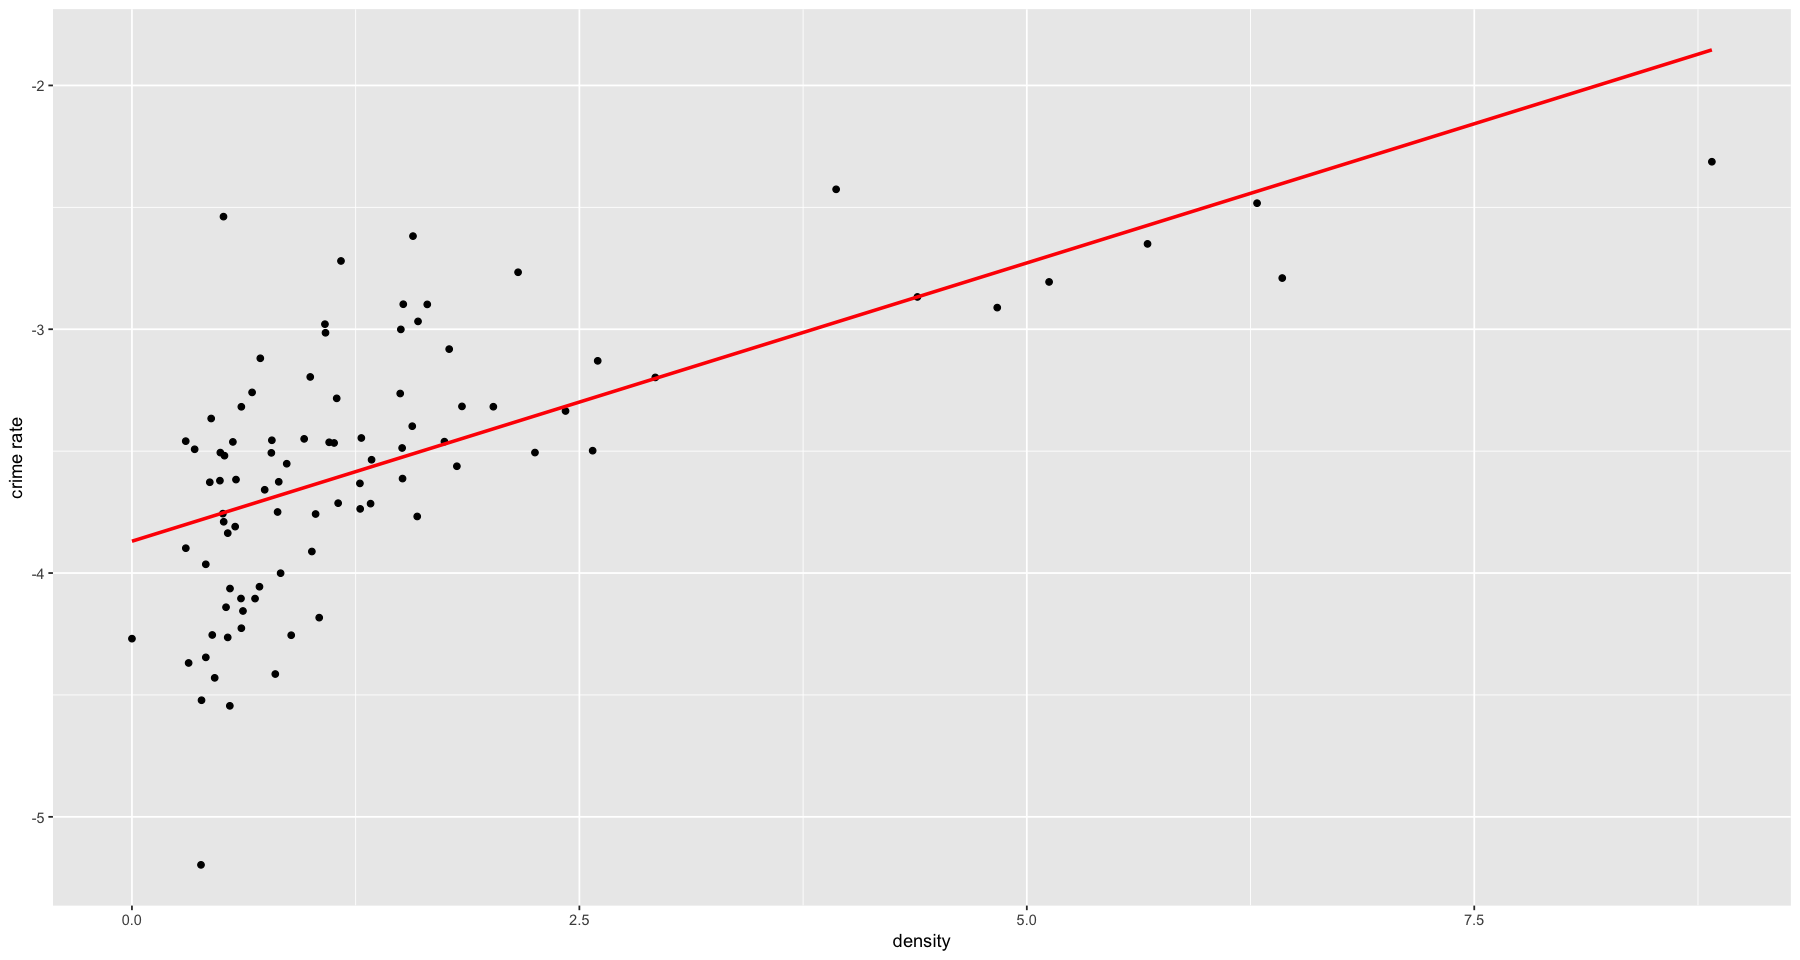

In [230]:
qplot(data = crime, density, log(crmrte), xlab="density",  ylab="crime rate",) + 
      stat_smooth(method="lm", se=FALSE,col="red")

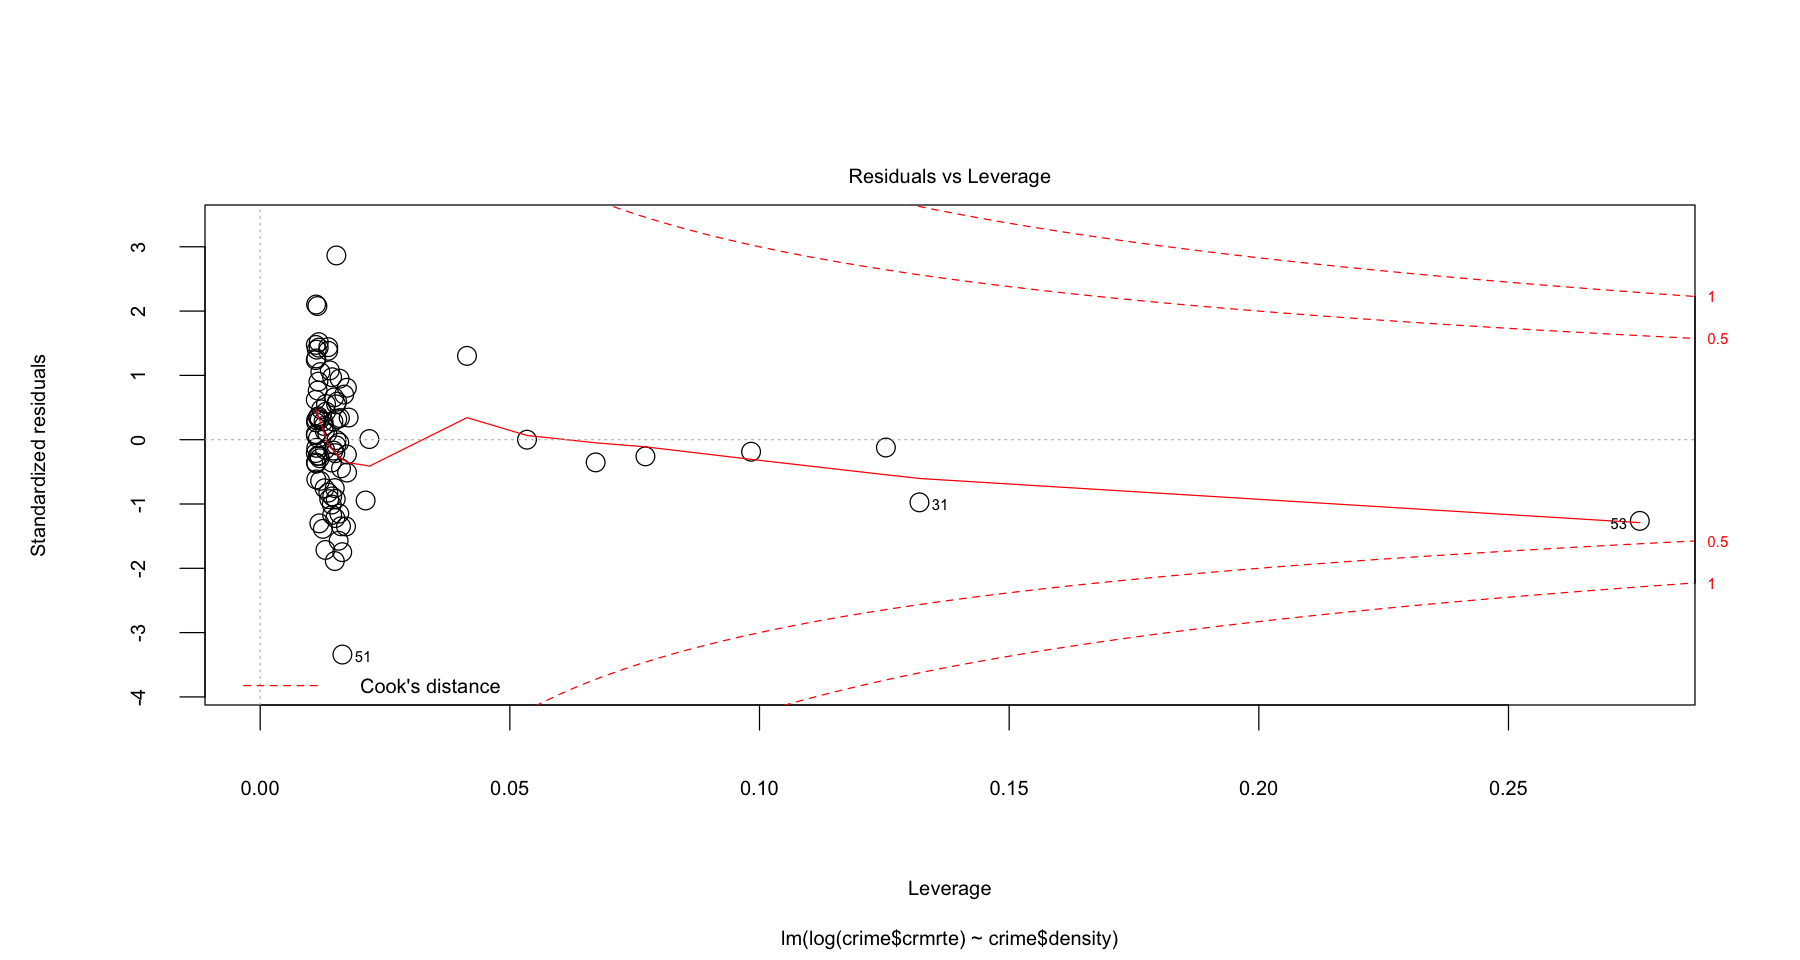

In [244]:
m5 = lm(log(crime$crmrte) ~ crime$density)
plot(m5, which=5)

I think that our model has to include density as one of our predictors. Previous background knowledge and studies have shown that density is a very good predictor of crime rate.

### Minorities

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.284  10.024  24.852  25.713  38.183  64.348 

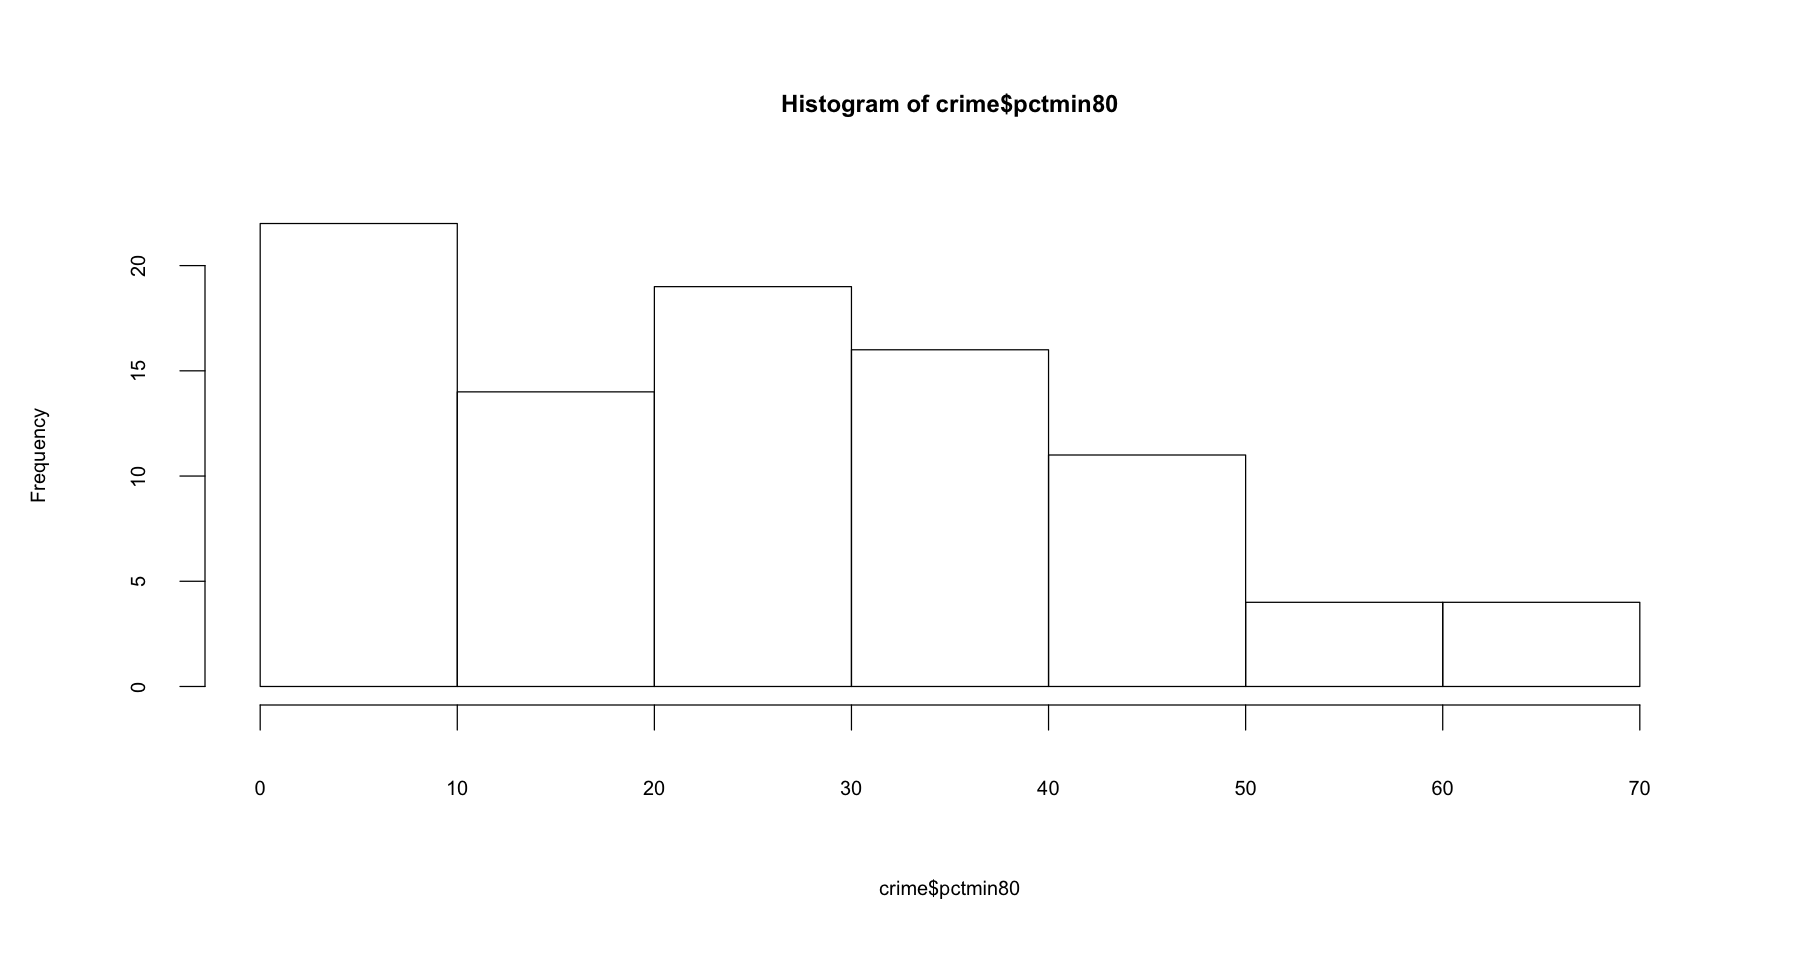

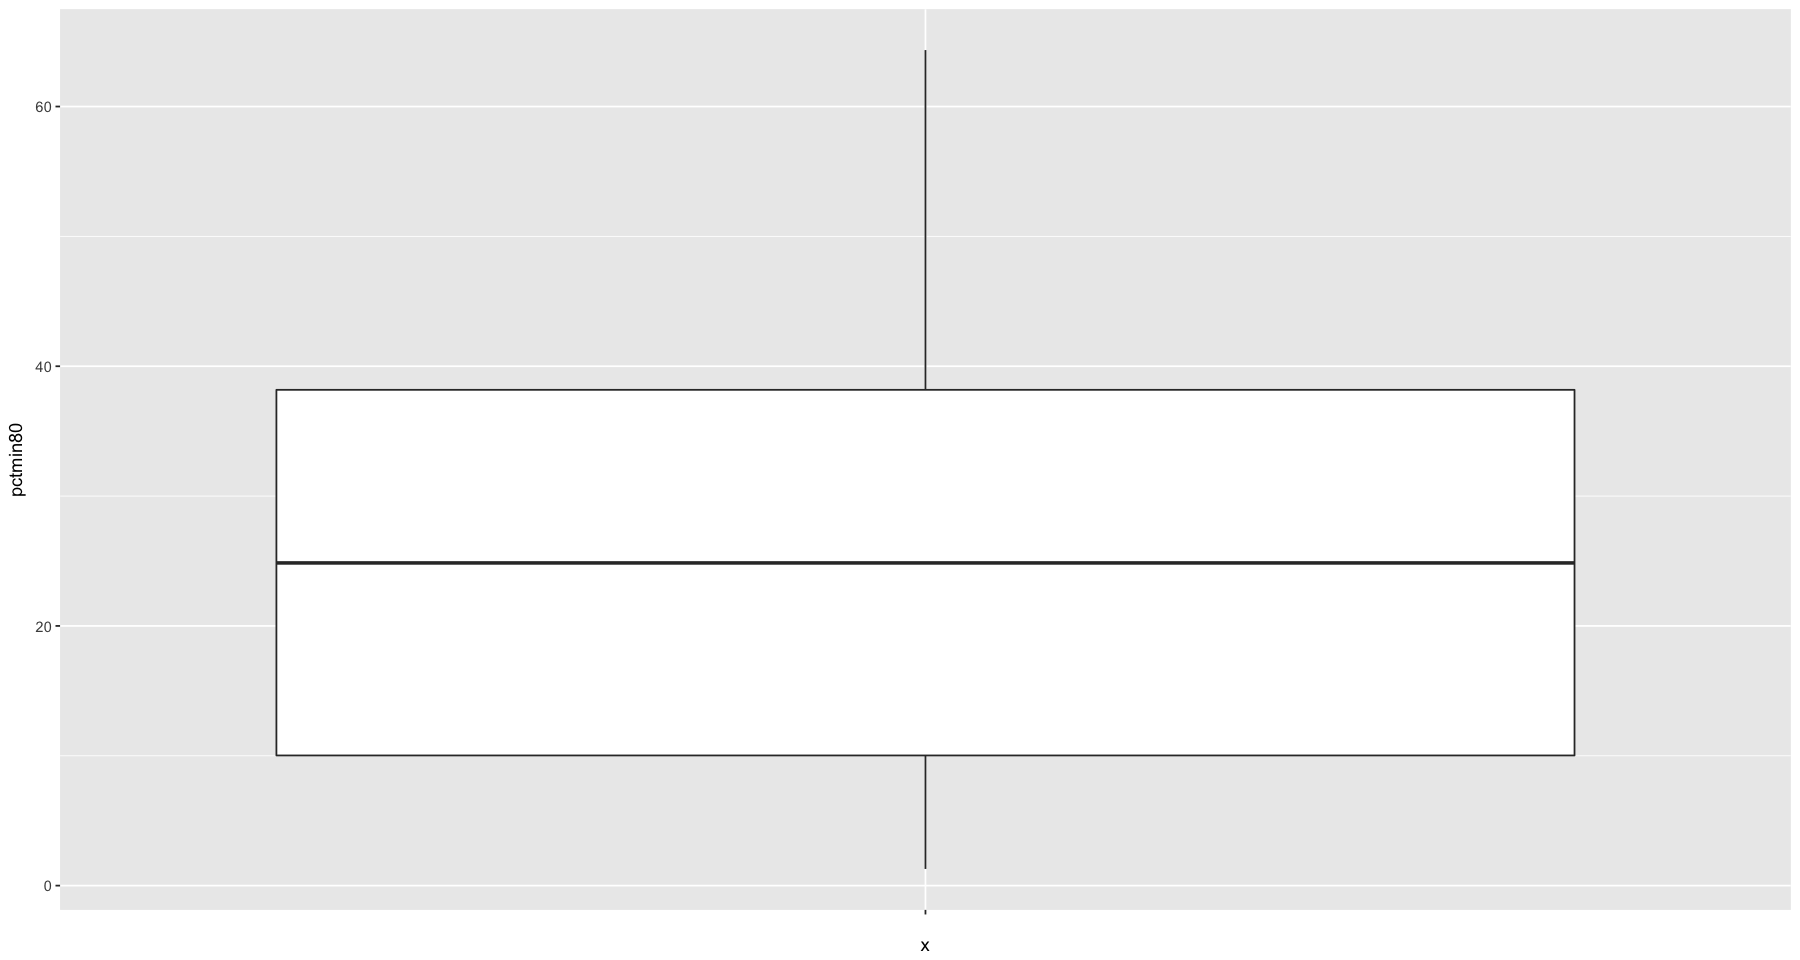

In [233]:
summary(crime$pctmin80)
hist(crime$pctmin80)
ggplot(crime, aes(x='', y=pctmin80)) + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

Warning message:
“Ignoring unknown parameters: NA”

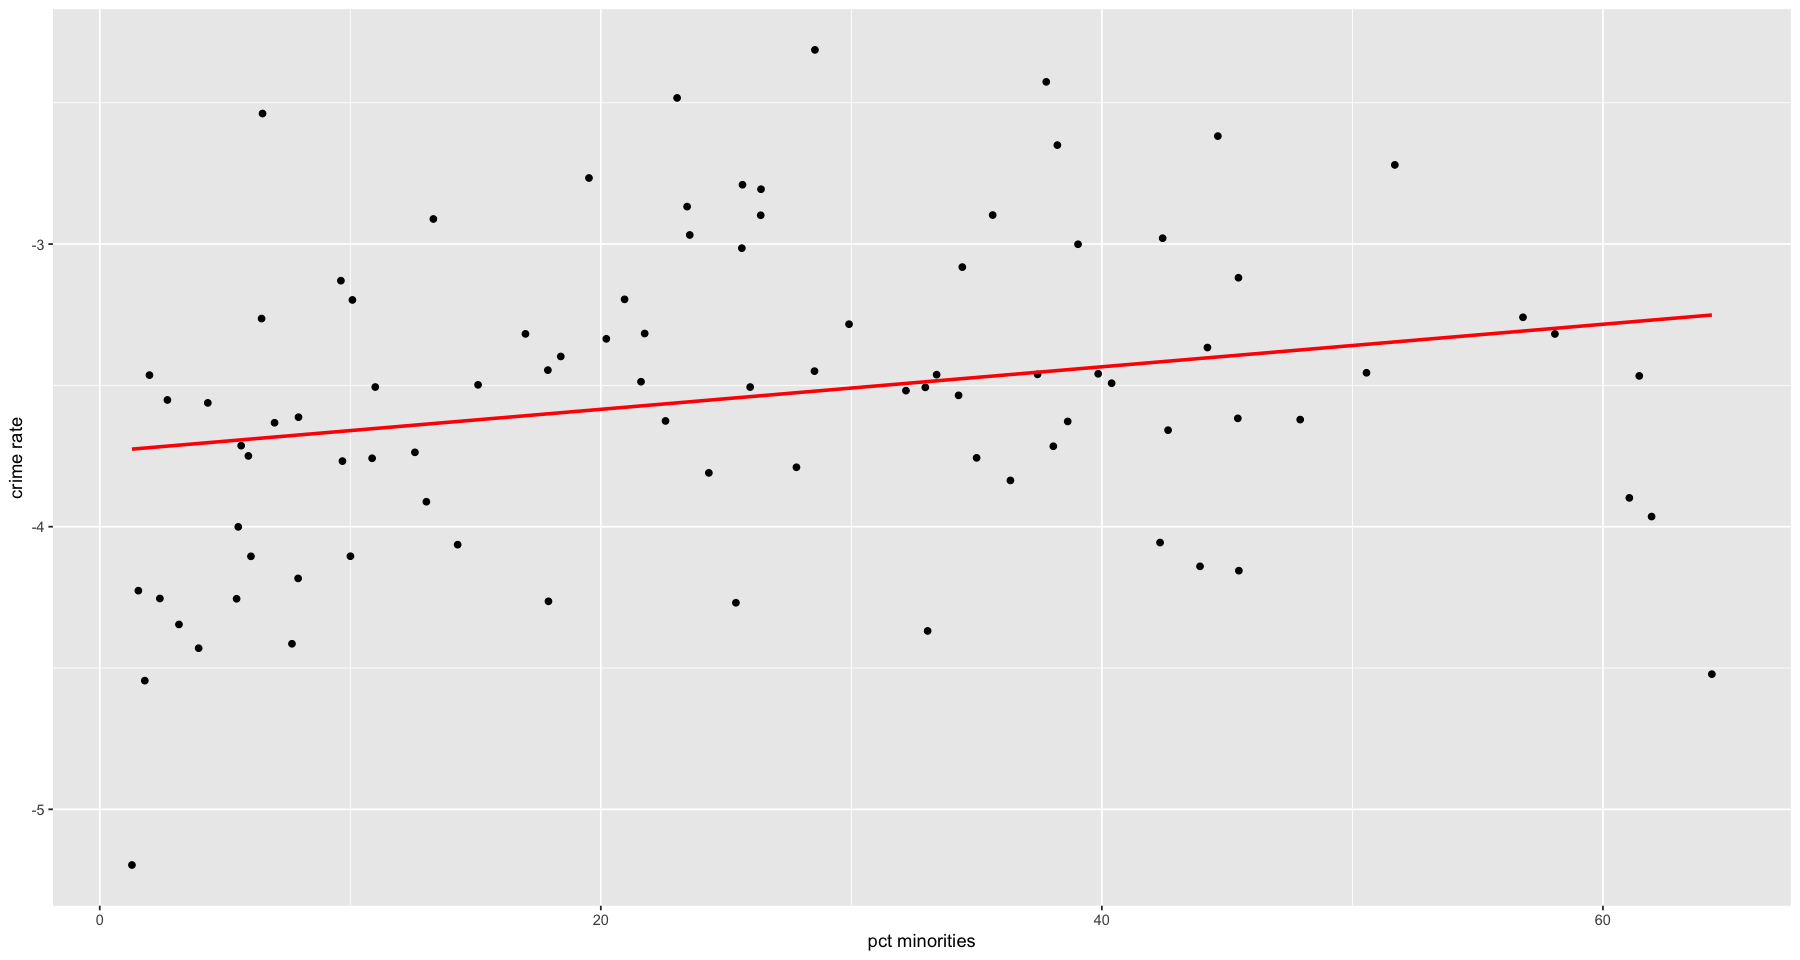

In [245]:
qplot(data = crime, pctmin80, log(crmrte), xlab="pct minorities",  ylab="crime rate",) + 
      stat_smooth(method="lm", se=FALSE,col="red")

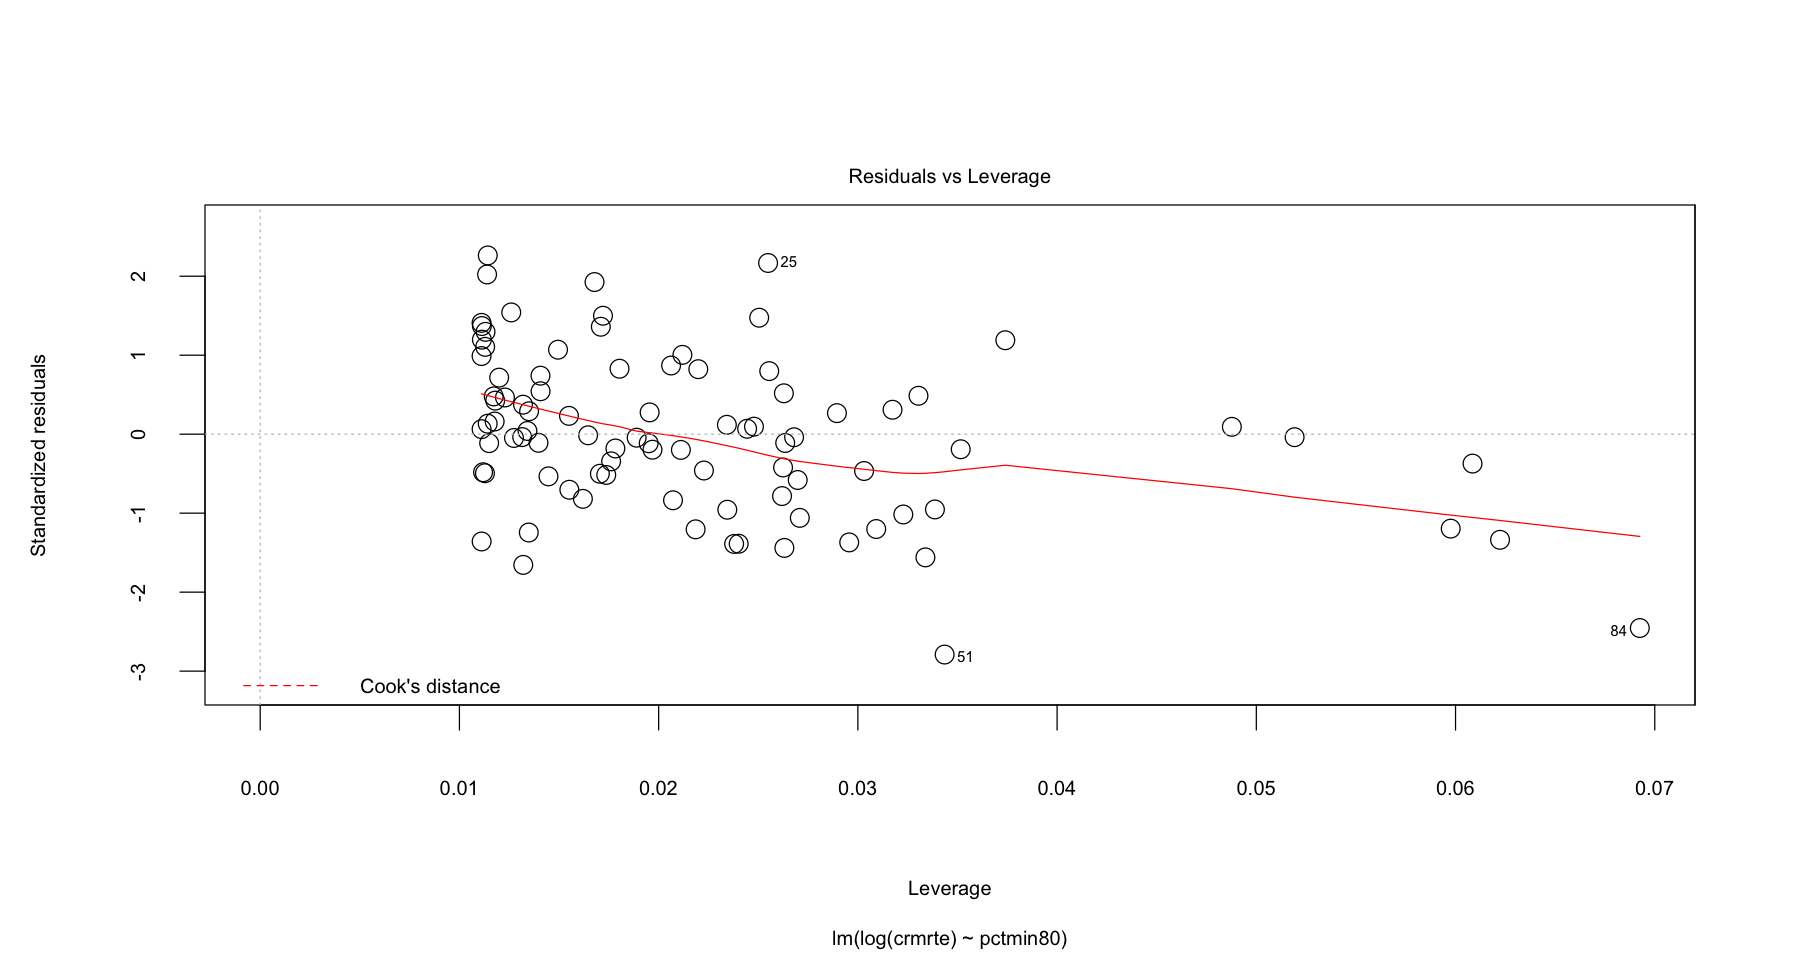

In [248]:
m5 = lm(log(crmrte) ~ pctmin80,data=crime)
plot(m5, which=5)

### Local wages

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  239.2   297.2   307.6   312.3   328.8   388.1 

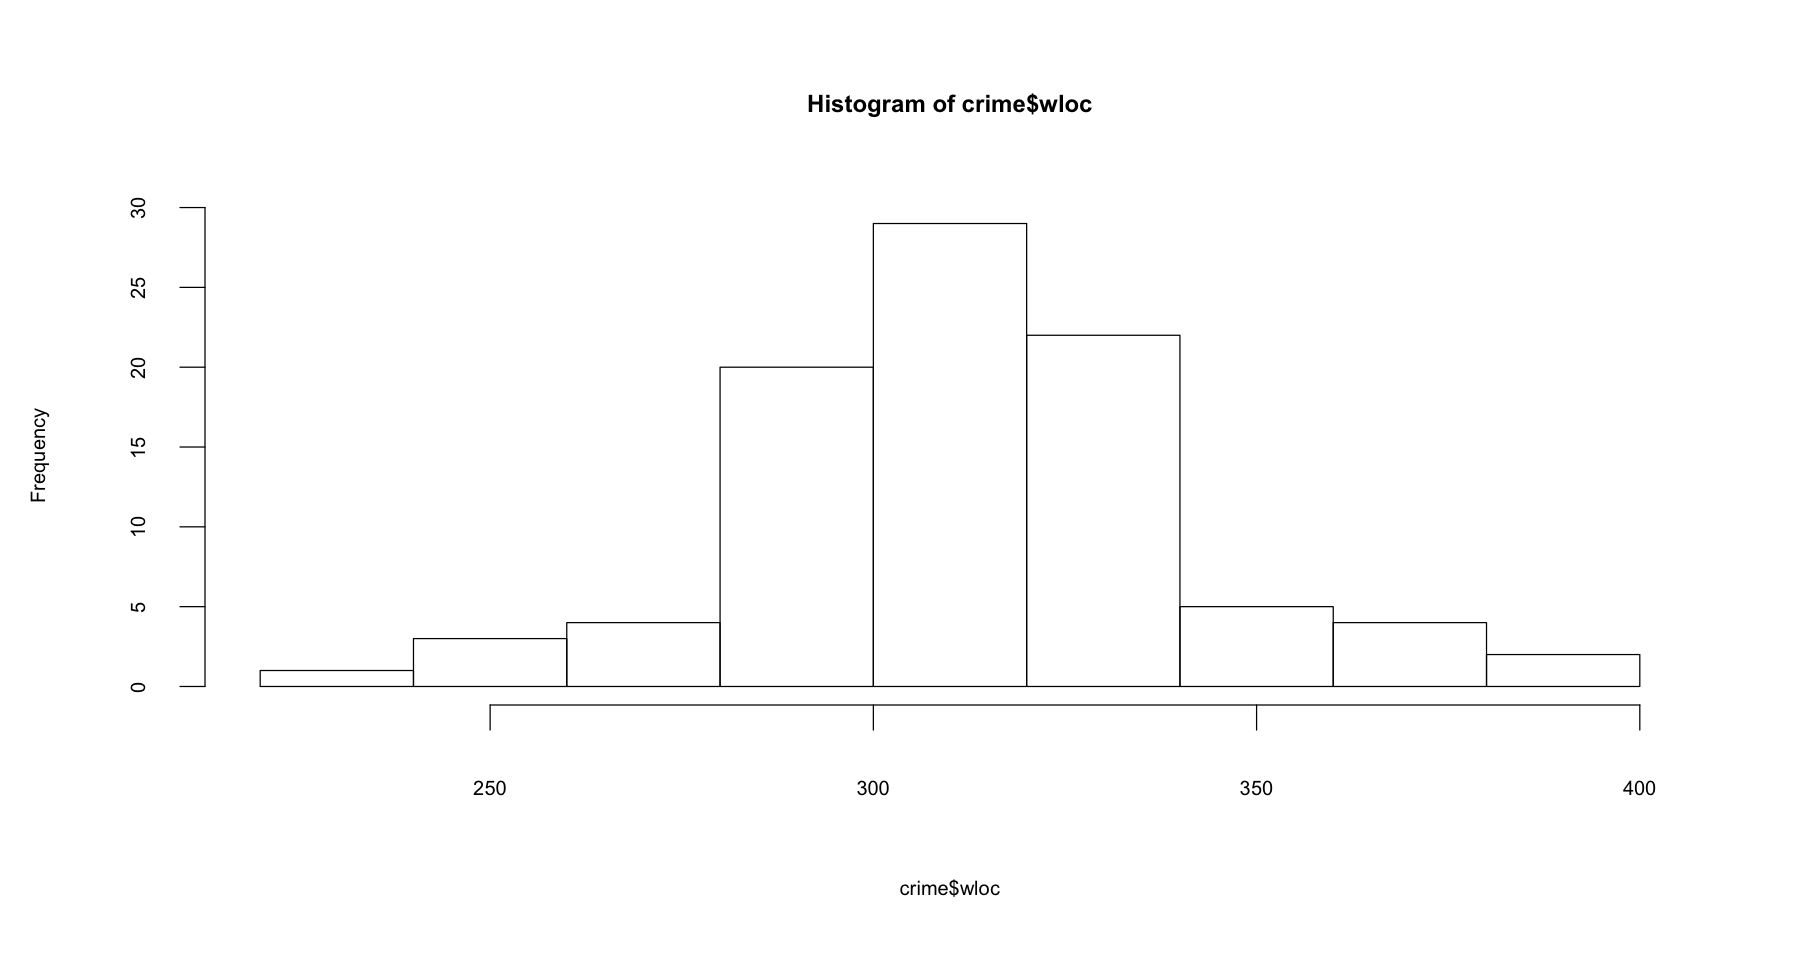

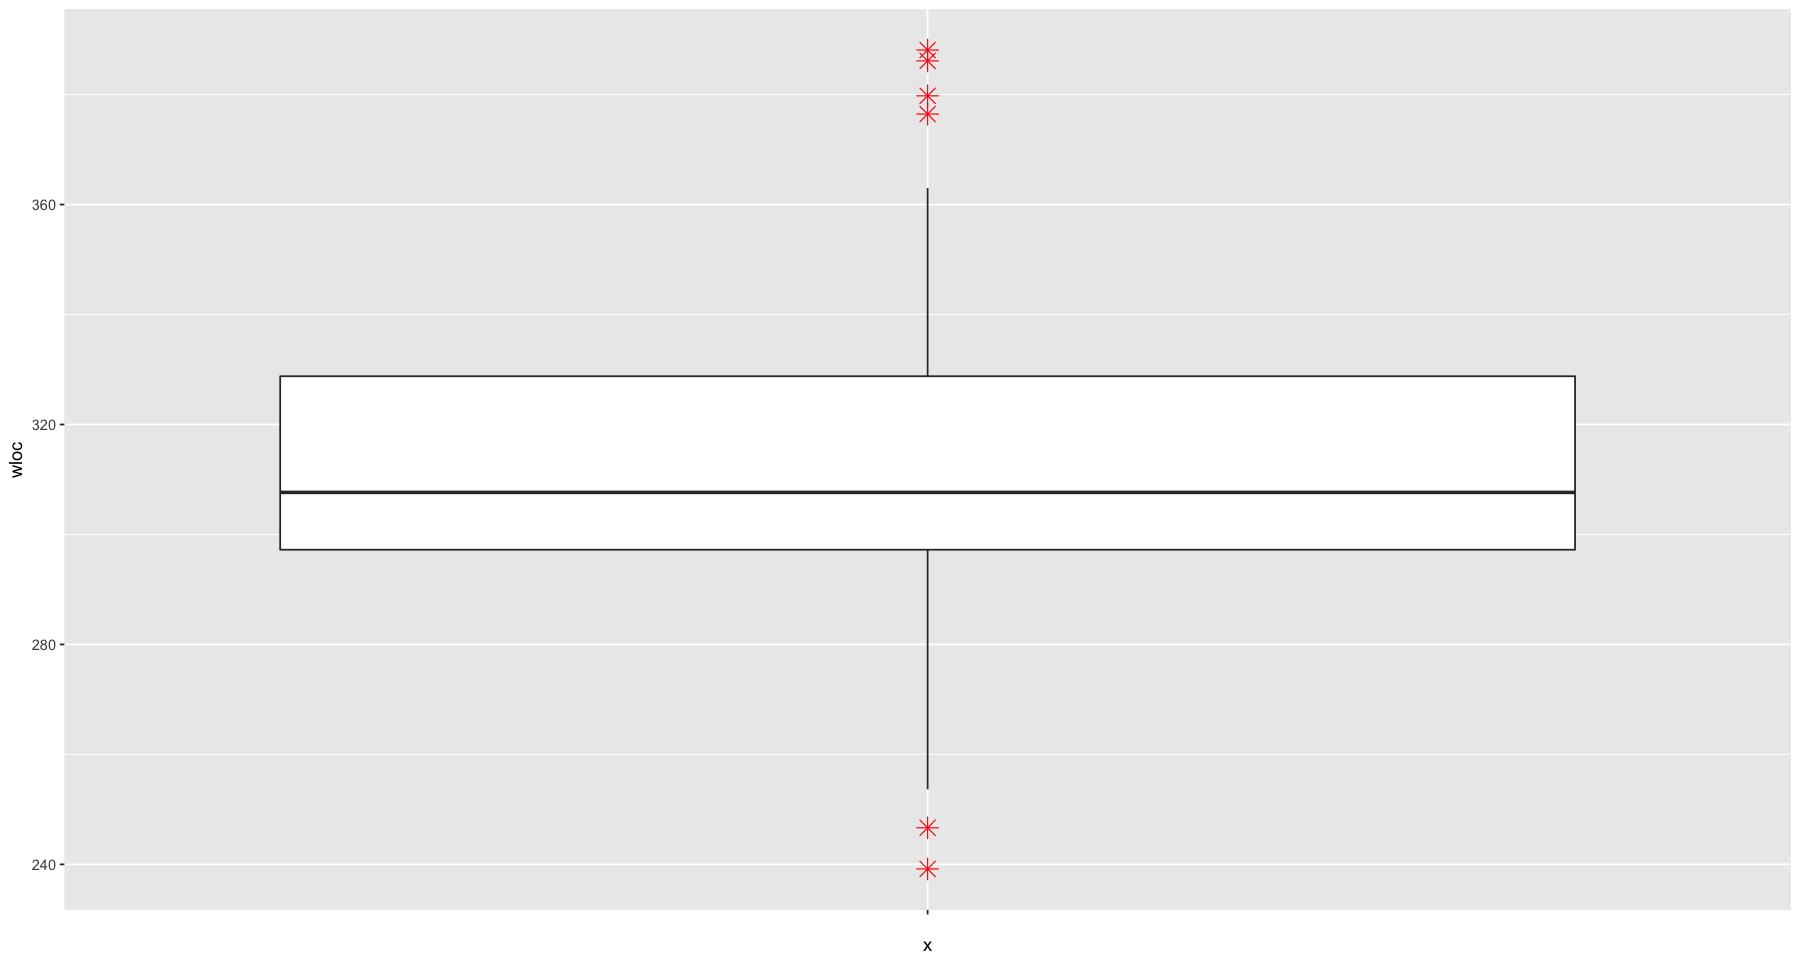

In [30]:
summary(crime$wloc)
hist(crime$wloc)
ggplot(crime, aes(x='', y=wloc)) + geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)

Warning message:
“Ignoring unknown parameters: NA”

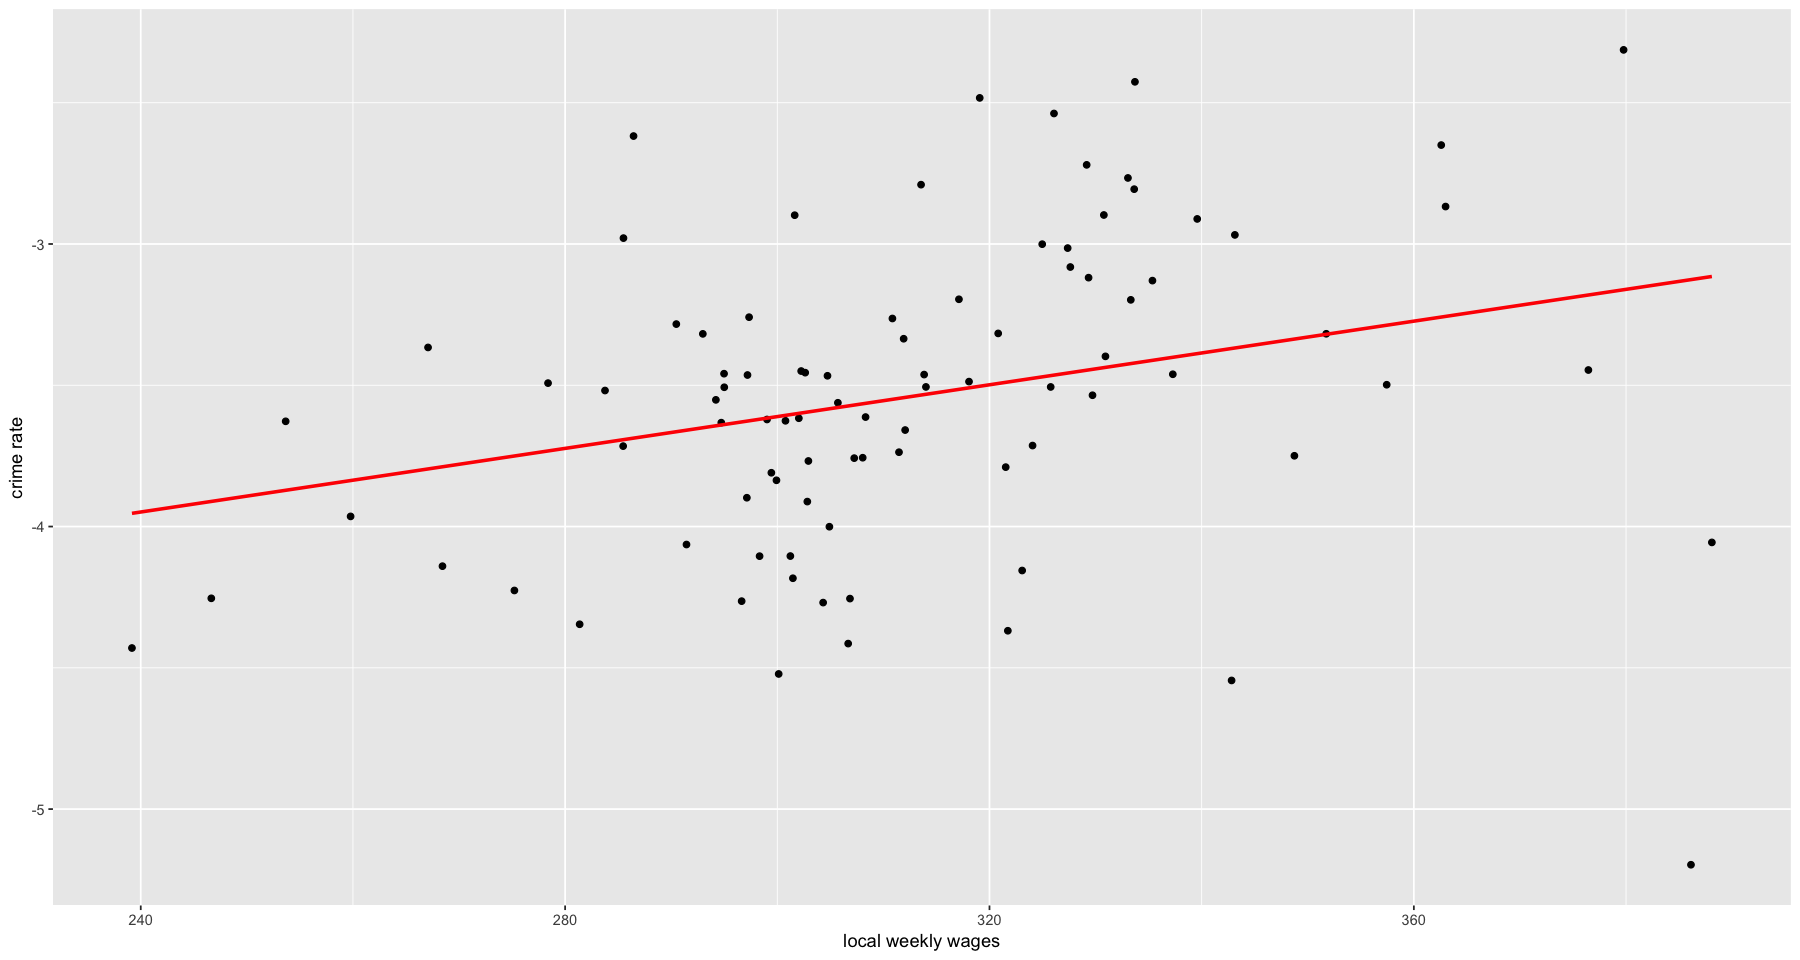

In [249]:
qplot(data = crime, wloc, log(crmrte), xlab="local weekly wages",  ylab="crime rate",) + 
      stat_smooth(method="lm", se=FALSE,col="red")

### First Model
Business assumption:  Increasing expenditures, investing in technology to modernize the police force in North Carolina would help to increase arrests and convictions. 
$$log(crmrte) = \beta_0 + \beta_1prbarr+ \beta_2prbconv + u$$

In [251]:
(m10 = lm(log(crmrte) ~ prbarr+prbconv , data = crime))
summary(m10)


Call:
lm(formula = log(crmrte) ~ prbarr + prbconv, data = crime)

Coefficients:
(Intercept)       prbarr      prbconv  
    -2.5491      -1.9899      -0.7354  



Call:
lm(formula = log(crmrte) ~ prbarr + prbconv, data = crime)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18491 -0.26008  0.01966  0.30262  0.82633 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.5491     0.1267 -20.122  < 2e-16 ***
prbarr       -1.9899     0.3180  -6.259 1.42e-08 ***
prbconv      -0.7354     0.1236  -5.950 5.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4123 on 87 degrees of freedom
Multiple R-squared:  0.4481,	Adjusted R-squared:  0.4354 
F-statistic: 35.32 on 2 and 87 DF,  p-value: 5.892e-12


This tells us that 44% of the variation of crime rate, is reduced by taking into account probability of arrest and probability of conviction.

The small p-value for both coefficients indicates that it is unlikely we will observe a relationship between the predictors (prbarr and prbconv) and response (crime rate.) variables due to chance. 

The coefficient Standard Error measures the average amount that the coefficient estimates vary from the actual average value of our response variable. We’d ideally want a lower number relative to its coefficients and this is what is shown.

Ordinary least squares regression relies on several assumptions, including that the residuals are hopefully normally distributed and homoscedastic and that the errors are independent.
Let's Investigate these assumptions visually by plotting our model. When assessing how well our model fits the data, we have to look for a symmetrical distribution across these points on the mean value zero (0).  We can see that the distribution of the residuals do appear to be  symmetrical (with the exception of just a few point that are possible the same outliers we detected before).  Most importantly we can not see a trend of lower residuals with lower fitted values or viceverse we would indicate that we are violating the assumptions of the linear model. 

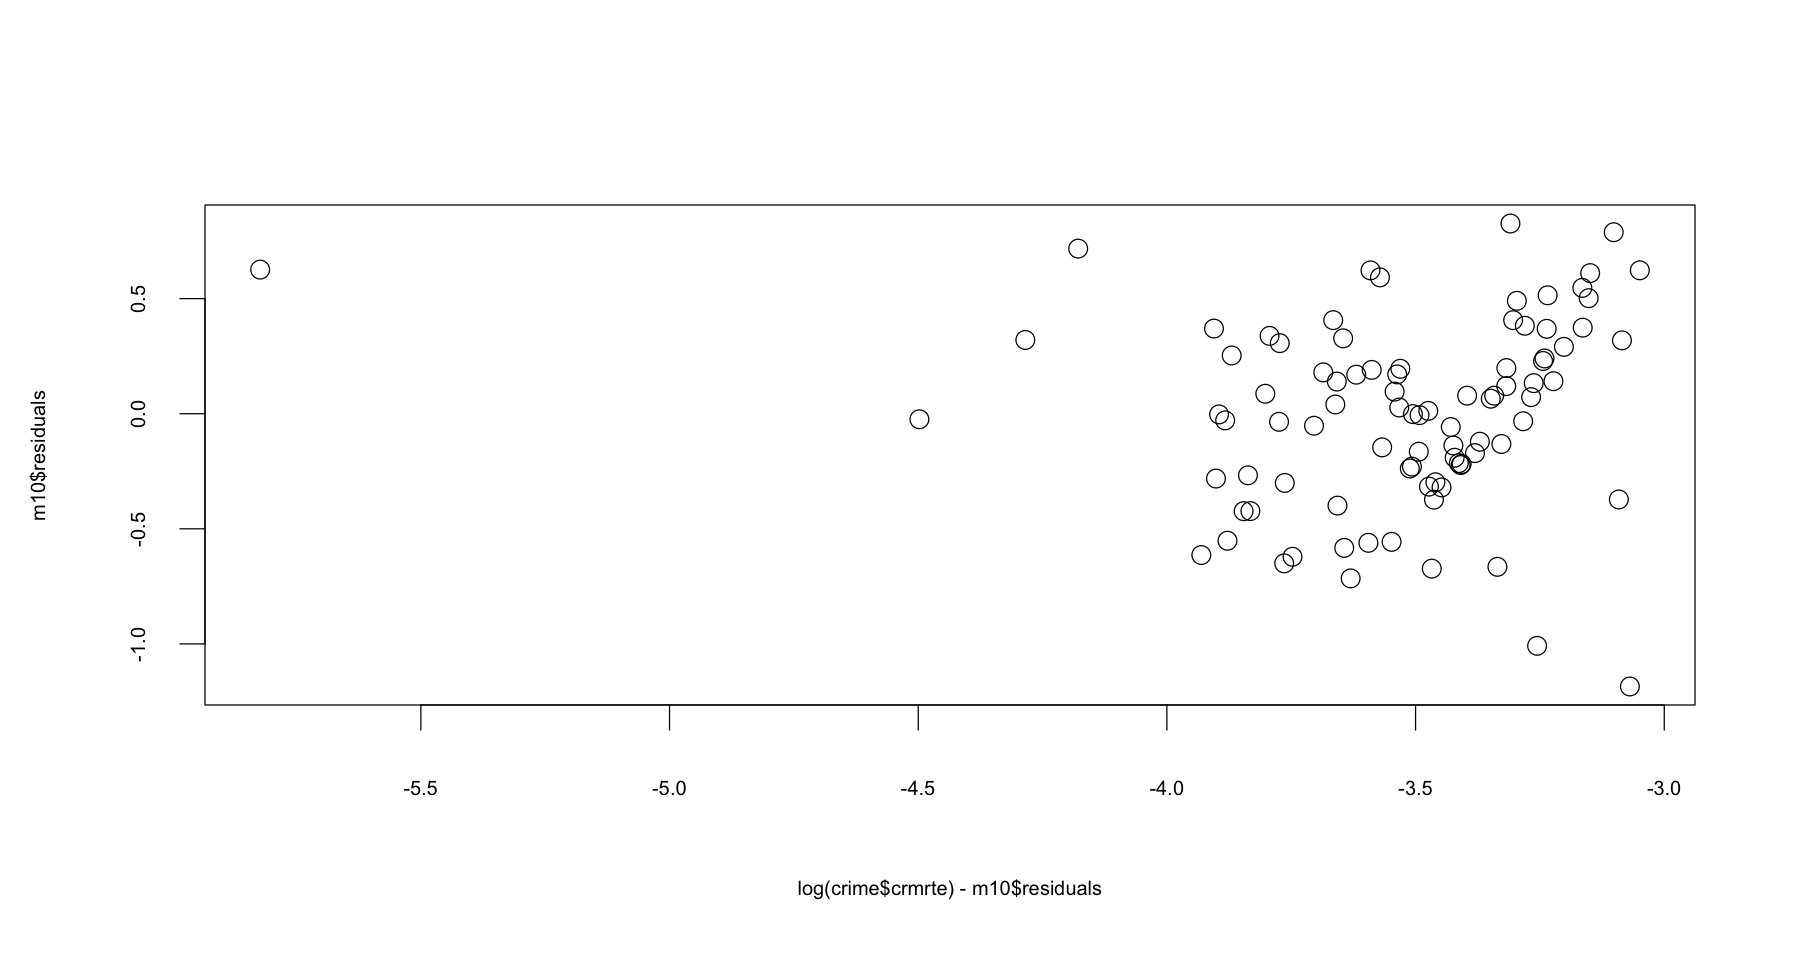

In [257]:
plot(log(crime$crmrte)-m10$residuals, m10$residuals)

In [262]:
# Just curious how the coefficients would change if we eliminate the outliers 
# detected in univariate analysis.
crime2<-crime[crime$county!=115 & crime$county!=173,]
nrow(crime2)

(m102 = lm(log(crmrte) ~ prbarr+prbconv , data = crime2))
summary(m102)

[1] 88


Call:
lm(formula = log(crmrte) ~ prbarr + prbconv, data = crime2)

Coefficients:
(Intercept)       prbarr      prbconv  
    -2.3414      -2.5086      -0.8515  



Call:
lm(formula = log(crmrte) ~ prbarr + prbconv, data = crime2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27376 -0.23661  0.04426  0.26513  0.80796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.3414     0.1643  -14.25  < 2e-16 ***
prbarr       -2.5086     0.4274   -5.87 8.19e-08 ***
prbconv      -0.8515     0.1328   -6.41 7.80e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4048 on 85 degrees of freedom
Multiple R-squared:  0.4064,	Adjusted R-squared:  0.3924 
F-statistic: 29.09 on 2 and 85 DF,  p-value: 2.37e-10


### Second Model


Call:
lm(formula = log(crmrte) ~ density + prbarr + prbconv + prbpris + 
    avgsen, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv      prbpris       avgsen  
   -3.12865      0.15521     -1.48418     -0.58459      0.09344      0.00887  



Call:
lm(formula = log(crmrte) ~ density + prbarr + prbconv + prbpris + 
    avgsen, data = crime)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8990 -0.2199 -0.0149  0.2335  0.8172 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.12865    0.25121 -12.454  < 2e-16 ***
density      0.15521    0.02719   5.708 1.68e-07 ***
prbarr      -1.48418    0.29605  -5.013 2.93e-06 ***
prbconv     -0.58459    0.11145  -5.246 1.15e-06 ***
prbpris      0.09344    0.46743   0.200    0.842    
avgsen       0.00887    0.01388   0.639    0.524    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3504 on 84 degrees of freedom
Multiple R-squared:  0.6151,	Adjusted R-squared:  0.5922 
F-statistic: 26.85 on 5 and 84 DF,  p-value: 4.052e-16


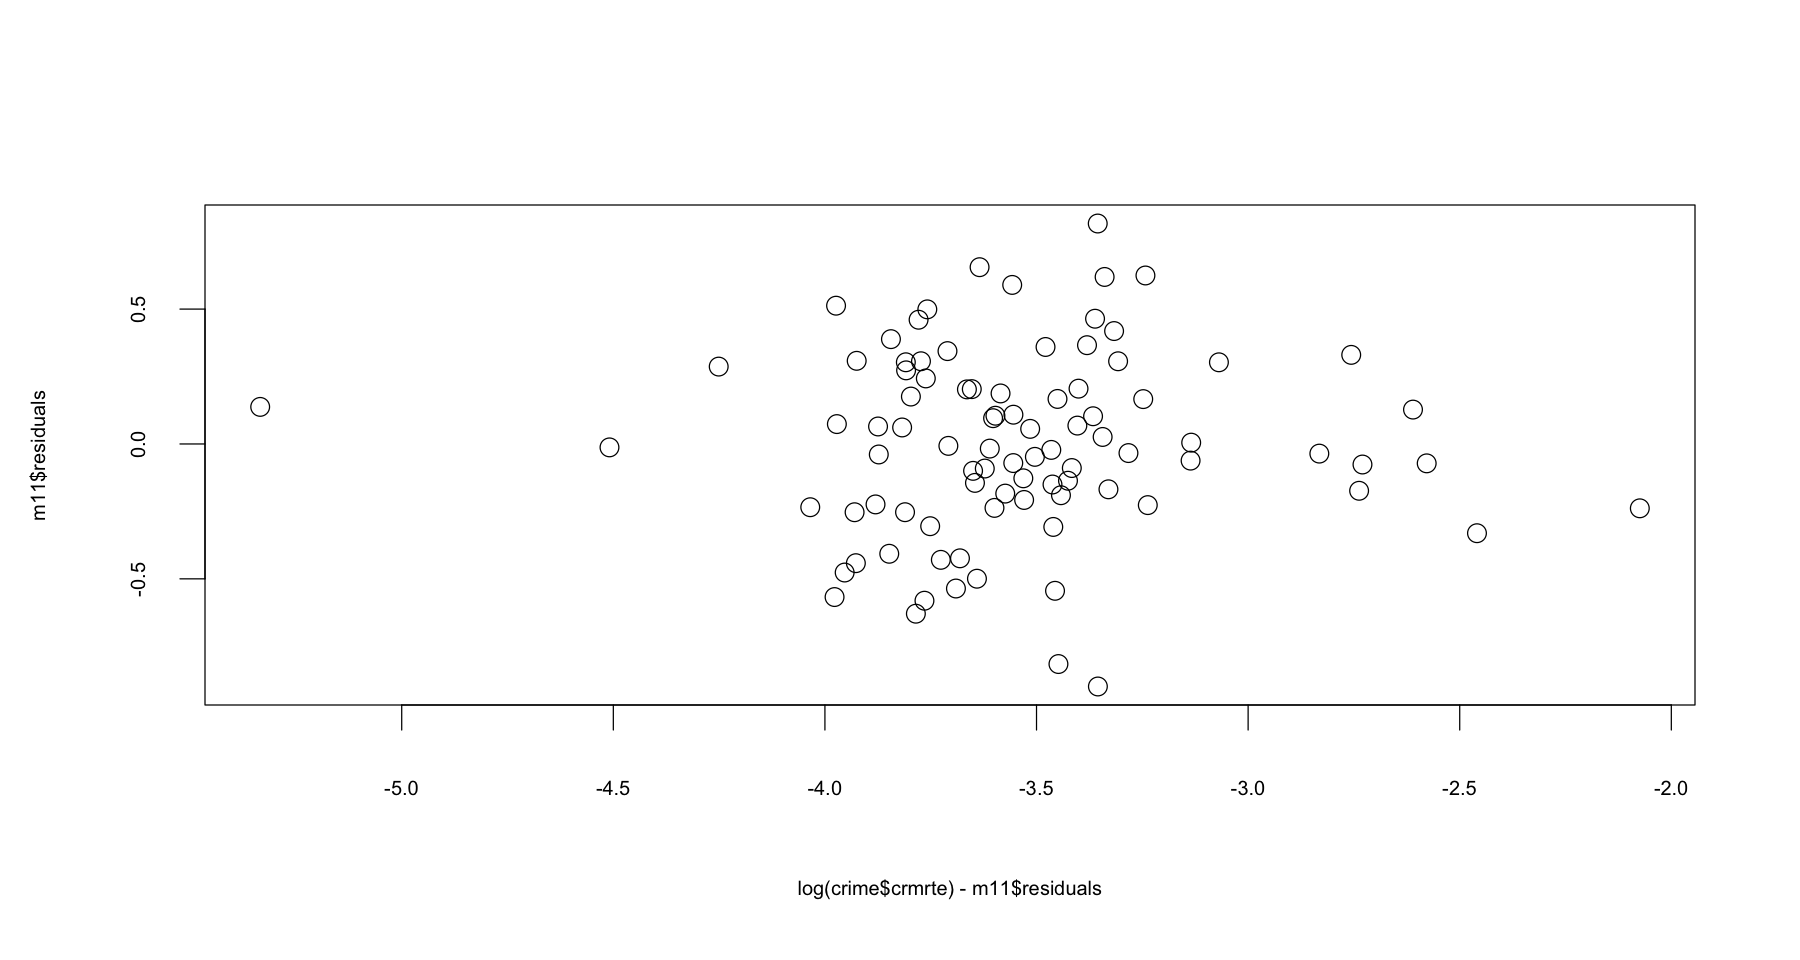

In [275]:
(m11 = lm(log(crmrte) ~ density + prbarr + prbconv + prbpris + avgsen,data = crime))
summary(m11)

plot(log(crime$crmrte)-m11$residuals, m11$residuals)


Prob of prison does not add anything to the model and standard error and pvalue show it should not be included (same with avgsen).

Just as we had expected when we explored density, it has to be included in the model and while the campaign can not increase or decrease this variable it can use it to determine where to deploy more budget.


Call:
lm(formula = log(crmrte) ~ density + prbarr + prbconv, data = crime)

Coefficients:
(Intercept)      density       prbarr      prbconv  
    -3.0335       0.1590      -1.4340      -0.5685  



Call:
lm(formula = log(crmrte) ~ density + prbarr + prbconv, data = crime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90866 -0.20251 -0.02526  0.24458  0.85433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.03352    0.13332 -22.754  < 2e-16 ***
density      0.15903    0.02625   6.058 3.54e-08 ***
prbarr      -1.43397    0.28303  -5.066 2.29e-06 ***
prbconv     -0.56849    0.10765  -5.281 9.55e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3472 on 86 degrees of freedom
Multiple R-squared:  0.6132,	Adjusted R-squared:  0.5997 
F-statistic: 45.44 on 3 and 86 DF,  p-value: < 2.2e-16


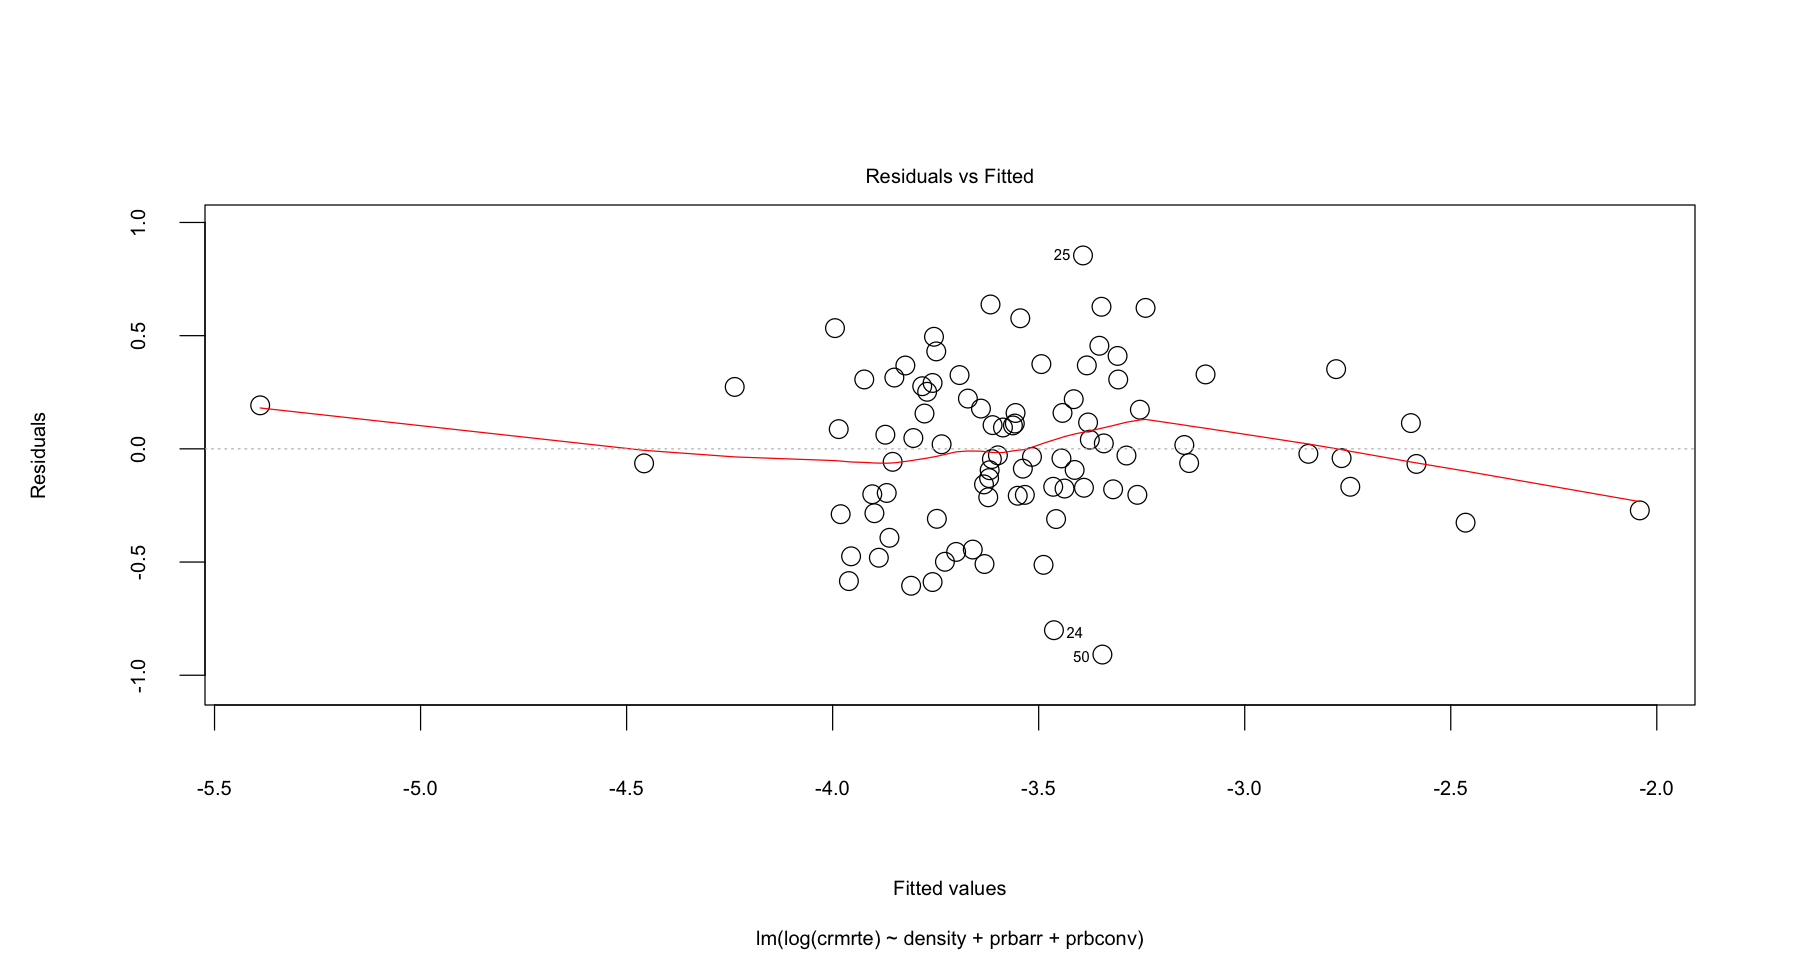

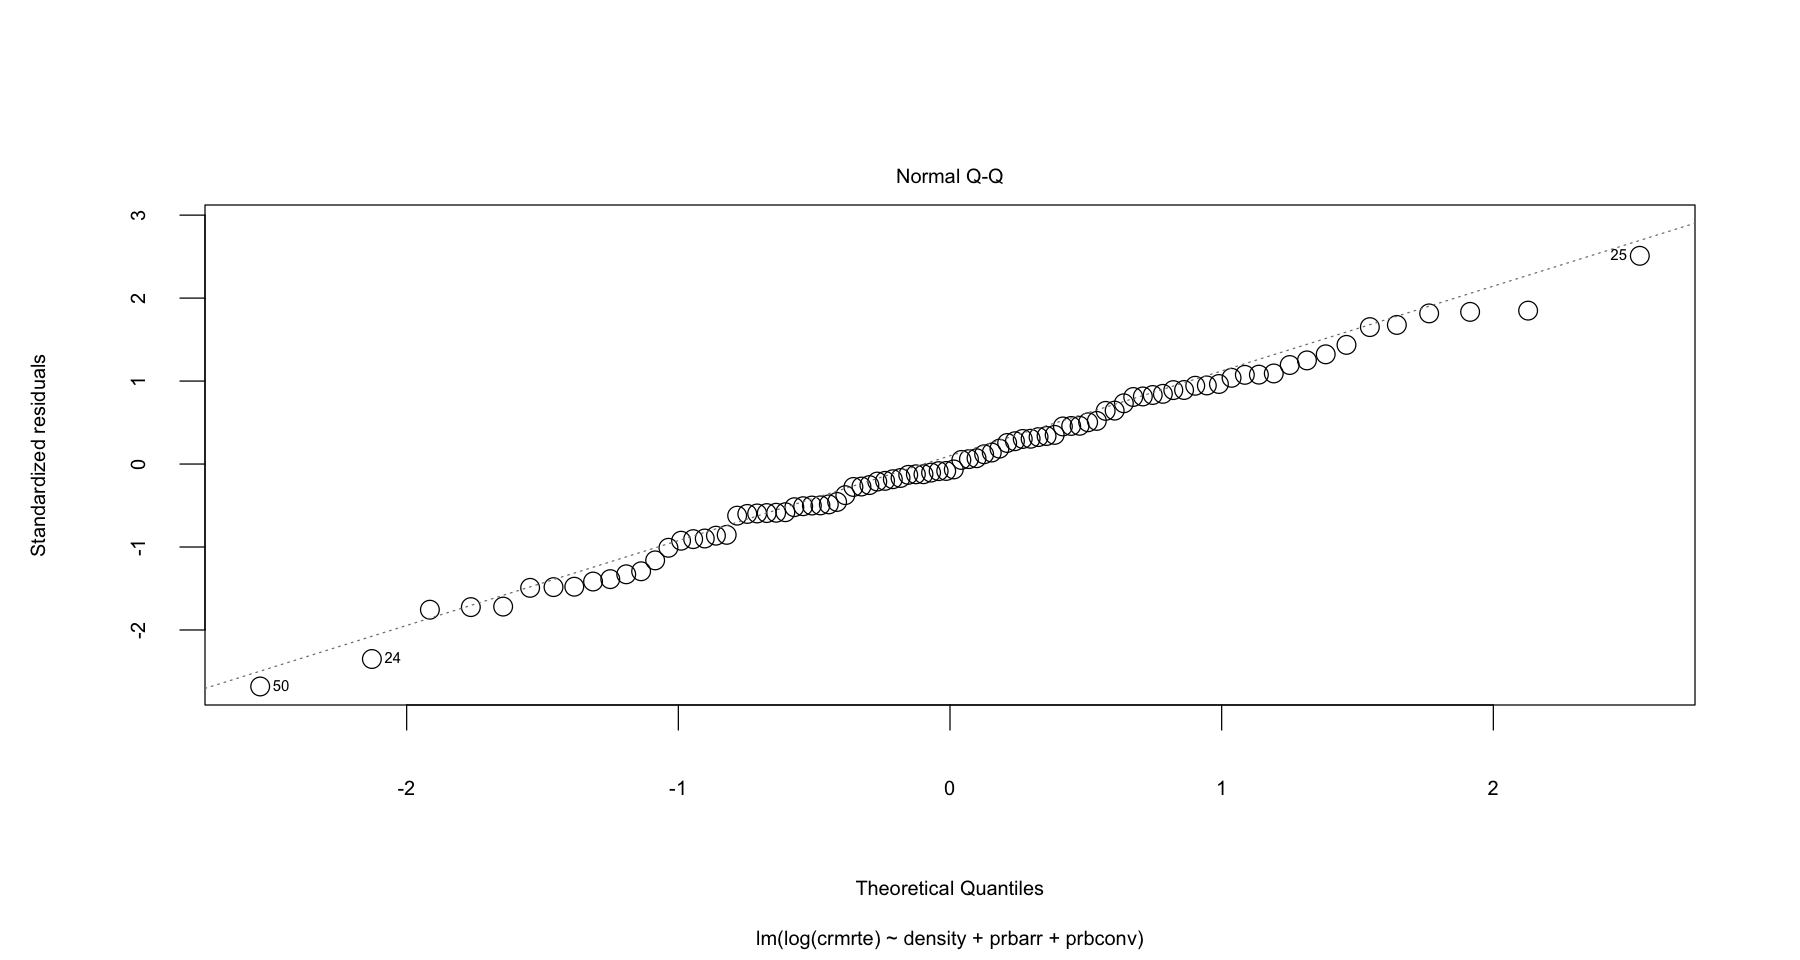

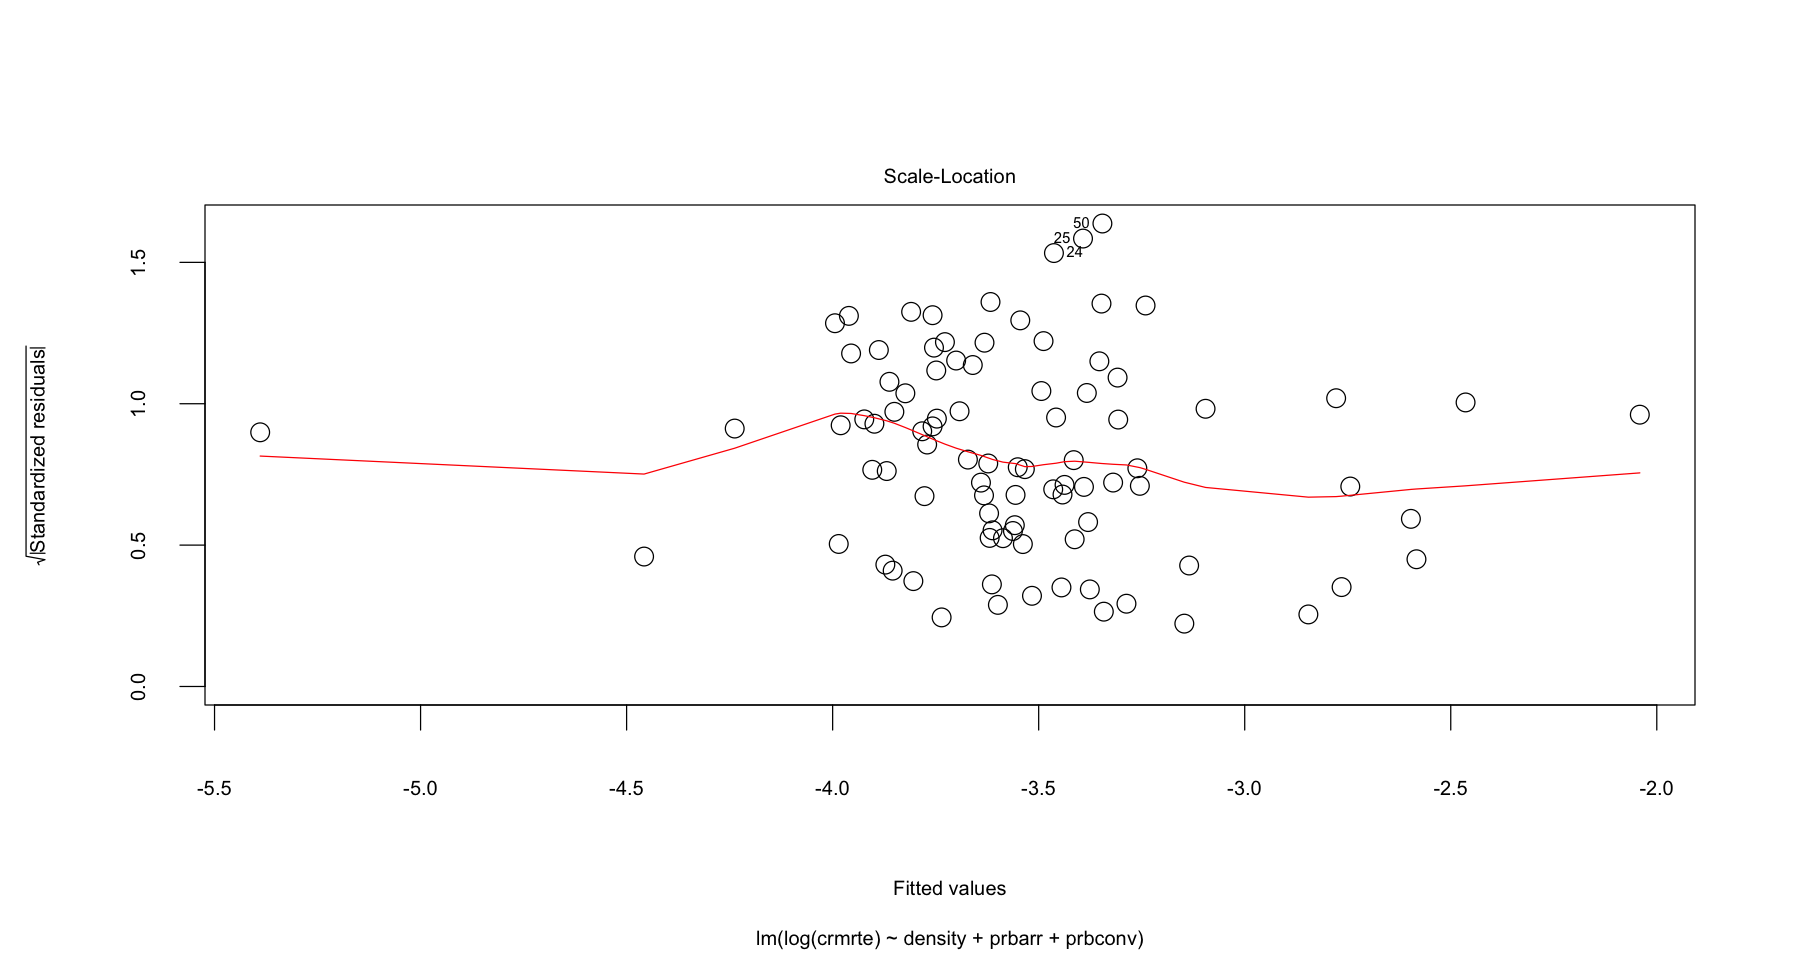

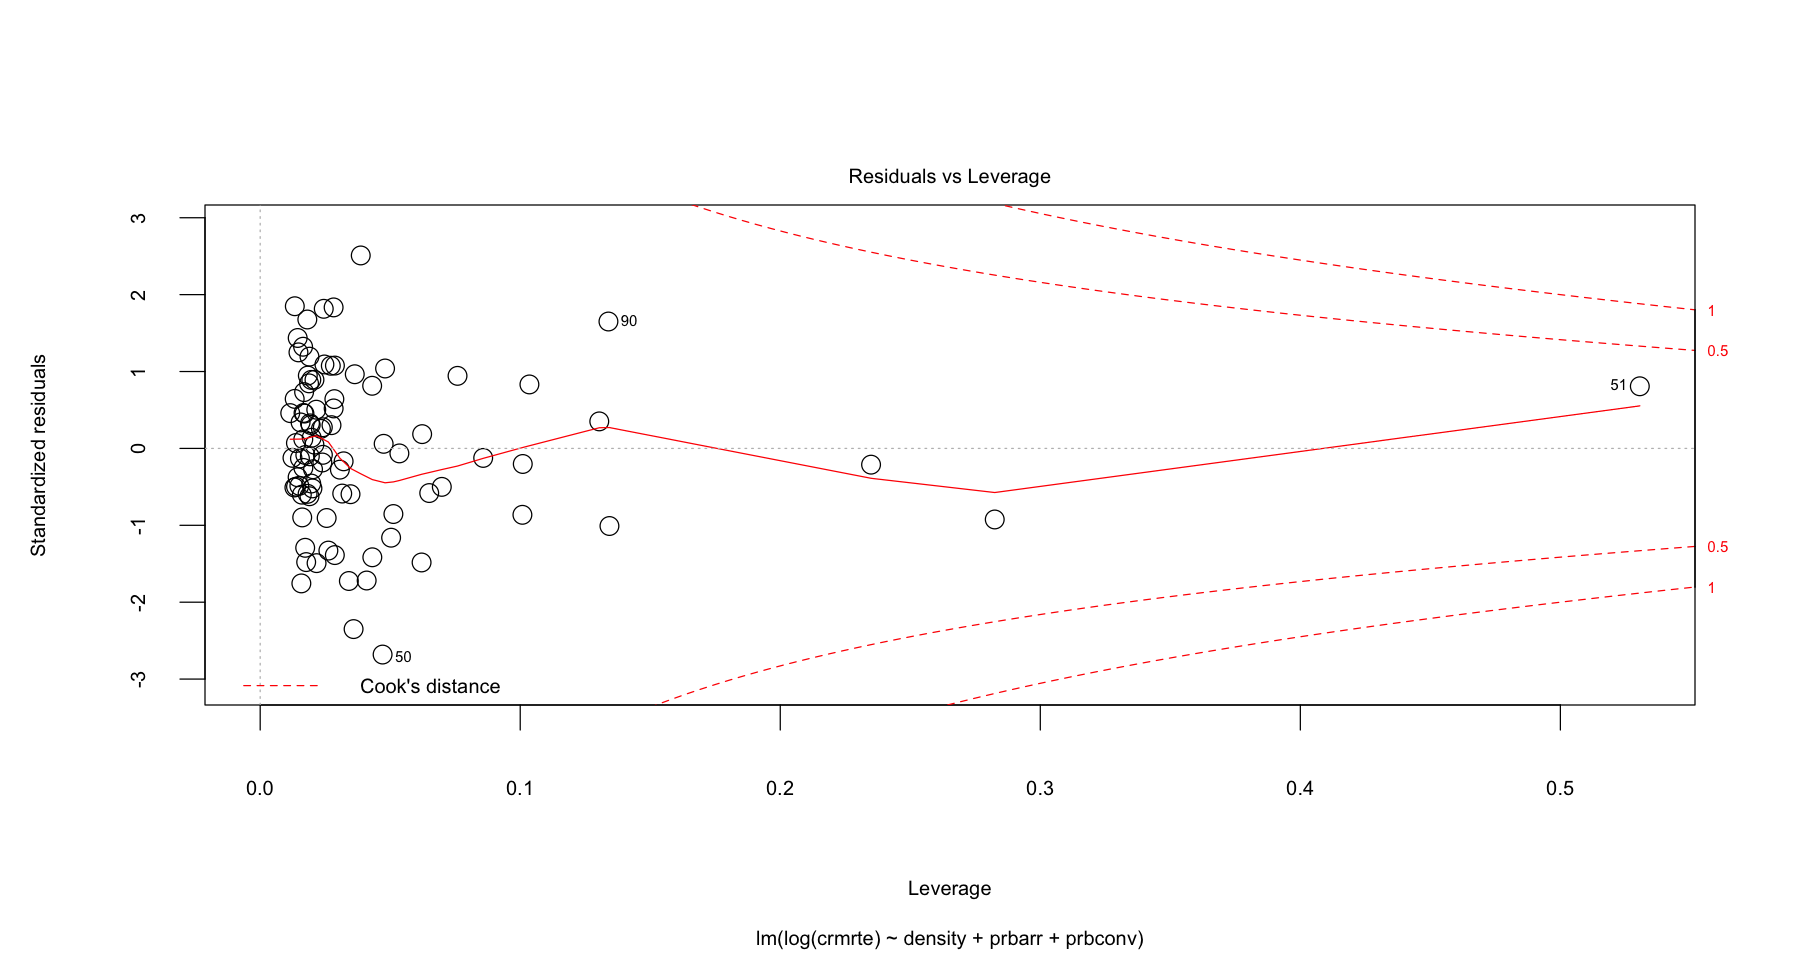

In [276]:
(m12 = lm(log(crmrte) ~ density + prbarr + prbconv,data = crime))
summary(m12)

plot(m12)


In [273]:
### Third Model

m100= lm(log(crmrte) ~ density + prbarr + prbconv + polpc + pctmin80 +,data = crime)
summary(m100)


Call:
lm(formula = log(crmrte) ~ density + prbarr + prbconv + polpc + 
    pctmin80, data = crime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79076 -0.13336  0.03101  0.16029  0.60258 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.262197   0.108523 -30.060  < 2e-16 ***
density       0.116169   0.021894   5.306 8.96e-07 ***
prbarr       -2.270614   0.260528  -8.715 2.22e-13 ***
prbconv      -0.757607   0.087270  -8.681 2.60e-13 ***
polpc       193.373385  35.996353   5.372 6.83e-07 ***
pctmin80      0.012100   0.001697   7.129 3.25e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2634 on 84 degrees of freedom
Multiple R-squared:  0.7826,	Adjusted R-squared:  0.7696 
F-statistic: 60.47 on 5 and 84 DF,  p-value: < 2.2e-16


In [ ]:
### Ommitted Bias Analysis



$$log(crime rate)= \beta_0 + \beta_1 x_1 + error $$
$$crime rate = \e^{\beta_0 + \beta_1 x_1 + error}$$